# Resultados Preliminares
### Carlos Kester nº USP 14740284
### Matias Oliveira Schwarz nº USP 4763711
### Tiago Francalassi Sarcinelli nº USP 14609679
### Igor Quereli nº USP 10819332

# Importação das bibliotecas e dos dados tratados

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn as skl
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score, normalized_mutual_info_score, r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestNeighbors
import time
import gdown
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# Funções auxiliares

In [5]:
def download_file(file_id, filename):
    '''Função para baixar os arquivos do Google Drive'''
    # IDs dos arquivos no Google Drive
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Baixando {filename}...")
    gdown.download(url, filename, quiet=False)
    print(f"{filename} carregado com sucesso!")

# Análise exploratória

Os arquivos estão dispostos por ano. É preciso organizá-los em um único DataFrame para facilitar nossas análises futuras.

Esta seção dedicas-se à concatenação e organização desses dados.

## Organizando os dados (preditores)

Arquivos para serem baixados no ambiente de trabalho do notebook. Os IDs são endereçados do link dos arquivos no drive compartilhado.

Começaremos pelos arquivos SMPS de sete anos (de 2017 a 2023) da estação SGP.

In [7]:
files_smps = {
    'SGP_smps_hour_2017.csv': '1qFDeNJkf_LxxyXEcnJ7sDKij2uVHmohE',
    'SGP_smps_hour_2018.csv': '1s9QWUN6pQ9b5obWpZzE9Lwym4bOvhRbX',
    'SGP_smps_hour_2019.csv': '18fZ0xWDDaSW_gHCiaLKOXWf2H9HQKF5b',
    'SGP_smps_hour_2020.csv': '1klwFnBgiMvq7L6lP4lXkaRQ0frCS3Izq',
    'SGP_smps_hour_2021.csv': '18aNg0qxPD31qk9gbquqHLQwzR2l-J3iV',
    'SGP_smps_hour_2022.csv': '1sHJNgDJShruQgSOKK4hGiuVaHrcKUO0O',
    'SGP_smps_hour_2023.csv': '1H3P_-gizUC33fqDmH29uhq6IM9sUI1-_'
}

In [8]:
for filename, file_id in files_smps.items():
    download_file(file_id, filename)

Baixando SGP_smps_hour_2017.csv...


Downloading...
From: https://drive.google.com/uc?id=1qFDeNJkf_LxxyXEcnJ7sDKij2uVHmohE
To: /workspaces/T-cnicas-de-Machine-Learning-para-Estudo-de-Espalhamento-de-Radia-o-por-Aeross-is/SGP_smps_hour_2017.csv
100%|██████████| 7.67M/7.67M [00:00<00:00, 49.5MB/s]


SGP_smps_hour_2017.csv carregado com sucesso!
Baixando SGP_smps_hour_2018.csv...


Downloading...
From: https://drive.google.com/uc?id=1s9QWUN6pQ9b5obWpZzE9Lwym4bOvhRbX
To: /workspaces/T-cnicas-de-Machine-Learning-para-Estudo-de-Espalhamento-de-Radia-o-por-Aeross-is/SGP_smps_hour_2018.csv
100%|██████████| 7.66M/7.66M [00:00<00:00, 42.8MB/s]


SGP_smps_hour_2018.csv carregado com sucesso!
Baixando SGP_smps_hour_2019.csv...


Downloading...
From: https://drive.google.com/uc?id=18fZ0xWDDaSW_gHCiaLKOXWf2H9HQKF5b
To: /workspaces/T-cnicas-de-Machine-Learning-para-Estudo-de-Espalhamento-de-Radia-o-por-Aeross-is/SGP_smps_hour_2019.csv
100%|██████████| 7.51M/7.51M [00:00<00:00, 35.6MB/s]


SGP_smps_hour_2019.csv carregado com sucesso!
Baixando SGP_smps_hour_2020.csv...


Downloading...
From: https://drive.google.com/uc?id=1klwFnBgiMvq7L6lP4lXkaRQ0frCS3Izq
To: /workspaces/T-cnicas-de-Machine-Learning-para-Estudo-de-Espalhamento-de-Radia-o-por-Aeross-is/SGP_smps_hour_2020.csv
100%|██████████| 7.24M/7.24M [00:00<00:00, 43.3MB/s]


SGP_smps_hour_2020.csv carregado com sucesso!
Baixando SGP_smps_hour_2021.csv...


Downloading...
From: https://drive.google.com/uc?id=18aNg0qxPD31qk9gbquqHLQwzR2l-J3iV
To: /workspaces/T-cnicas-de-Machine-Learning-para-Estudo-de-Espalhamento-de-Radia-o-por-Aeross-is/SGP_smps_hour_2021.csv
100%|██████████| 7.24M/7.24M [00:00<00:00, 33.0MB/s]


SGP_smps_hour_2021.csv carregado com sucesso!
Baixando SGP_smps_hour_2022.csv...


Downloading...
From: https://drive.google.com/uc?id=1sHJNgDJShruQgSOKK4hGiuVaHrcKUO0O
To: /workspaces/T-cnicas-de-Machine-Learning-para-Estudo-de-Espalhamento-de-Radia-o-por-Aeross-is/SGP_smps_hour_2022.csv
100%|██████████| 4.86M/4.86M [00:00<00:00, 53.2MB/s]


SGP_smps_hour_2022.csv carregado com sucesso!
Baixando SGP_smps_hour_2023.csv...


Downloading...
From: https://drive.google.com/uc?id=1H3P_-gizUC33fqDmH29uhq6IM9sUI1-_
To: /workspaces/T-cnicas-de-Machine-Learning-para-Estudo-de-Espalhamento-de-Radia-o-por-Aeross-is/SGP_smps_hour_2023.csv
100%|██████████| 7.25M/7.25M [00:00<00:00, 54.5MB/s]

SGP_smps_hour_2023.csv carregado com sucesso!


In [ ]:
# Leitura dos dados baixados no ambiente de trabalho

SGP_smps_hour_2017 = pd.read_csv('SGP_smps_hour_2017.csv')
SGP_smps_hour_2018 = pd.read_csv('SGP_smps_hour_2018.csv')
SGP_smps_hour_2019 = pd.read_csv('SGP_smps_hour_2019.csv')
SGP_smps_hour_2020 = pd.read_csv('SGP_smps_hour_2020.csv')
SGP_smps_hour_2021 = pd.read_csv('SGP_smps_hour_2021.csv')
SGP_smps_hour_2022 = pd.read_csv('SGP_smps_hour_2022.csv')
SGP_smps_hour_2023 = pd.read_csv('SGP_smps_hour_2023.csv')

In [ ]:
# Um check rápido dos dados em um dos anos

SGP_smps_hour_2017.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 122 columns):
 #    Column         Non-Null Count  Dtype  
---   ------         --------------  -----  
 0    Start_date     8760 non-null   object 
 1    N_CN_SMPS_STP  8760 non-null   object 
 2    P_SMPS         8760 non-null   object 
 3    T_SMPS         8760 non-null   object 
 4    RH_SMPS        8760 non-null   object 
 5    N_CN_CPC_STP   8760 non-null   object 
 6    Qc_CPC_SMPS    8579 non-null   float64
 7    Qc_ACSM_SMPS   6240 non-null   float64
 8    Qc_Neph_SMPS   3227 non-null   float64
 9    D_9_14         0 non-null      float64
 10   D_9_47         0 non-null      float64
 11   D_9_82         0 non-null      float64
 12   D_10_2         0 non-null      float64
 13   D_10_6         0 non-null      float64
 14   D_10_9         0 non-null      float64
 15   D_11_3         8694 non-null   float64
 16   D_11_8         8694 non-null   float64
 17   D_12_2         8694 non-null   

In [ ]:
SGP_smps_hour_2017.isnull().sum() # Checando NaNs

Start_date          0
N_CN_SMPS_STP       0
P_SMPS              0
T_SMPS              0
RH_SMPS             0
                 ... 
D_445_1            66
D_461_4            66
D_478_3          8760
D_495_8          8760
D_514            8760
Length: 122, dtype: int64

In [ ]:
# Juntando todos os anos dos arquivos SMPS num único DataFrame

SGP_smps_hour_all = pd.concat([SGP_smps_hour_2017, SGP_smps_hour_2018, SGP_smps_hour_2019, SGP_smps_hour_2020, SGP_smps_hour_2021, SGP_smps_hour_2022, SGP_smps_hour_2023])

In [ ]:
# Salvando

#SGP_smps_hour_all.to_csv('/content/drive/MyDrive/Machine Learning/Projeto/SMPS/SMPS_new/SGP_smps_hour_all.csv')

Agora com o ACSM...

In [ ]:
files_acsm = {
    'SGP_acsm_2017.csv': '1OGcdpvY40SzR5FIGkn_a-33h0KcCIDXP',
    'SGP_acsm_2018.csv': '1iGRu9uy_Zs9p_po7lg-CPUhuePSjv6ft',
    'SGP_acsm_2019.csv': '1iYBF3fc1TKaduyZBsYQ3AUXBOFwSLc8l',
    'SGP_acsm_2020.csv': '1UR4Rt4XZK7a9okVd2CdrbdsQZTK0uL9V',
    'SGP_acsm_2021.csv': '1_koilLsgnmyRHKX3APhLcI0-_U3xw7sF',
    'SGP_acsm_2022.csv': '1SqlJuJBd3W_Wf9drB7A5JdmxcNOd50l7',
    'SGP_acsm_2023.csv': '1AhCu2qQ7hW_iKq9lhQC-RqJJUp5ODJwA'
}

In [ ]:
for filename, file_id in files_acsm.items():
    download_file(file_id, filename)

Baixando SGP_acsm_2017.csv...


Downloading...
From: https://drive.google.com/uc?id=1OGcdpvY40SzR5FIGkn_a-33h0KcCIDXP
To: /content/SGP_acsm_2017.csv
100%|██████████| 947k/947k [00:00<00:00, 8.25MB/s]


SGP_acsm_2017.csv carregado com sucesso!
Baixando SGP_acsm_2018.csv...


Downloading...
From: https://drive.google.com/uc?id=1iGRu9uy_Zs9p_po7lg-CPUhuePSjv6ft
To: /content/SGP_acsm_2018.csv
100%|██████████| 836k/836k [00:00<00:00, 4.20MB/s]


SGP_acsm_2018.csv carregado com sucesso!
Baixando SGP_acsm_2019.csv...


Downloading...
From: https://drive.google.com/uc?id=1iYBF3fc1TKaduyZBsYQ3AUXBOFwSLc8l
To: /content/SGP_acsm_2019.csv
100%|██████████| 1.11M/1.11M [00:00<00:00, 9.67MB/s]


SGP_acsm_2019.csv carregado com sucesso!
Baixando SGP_acsm_2020.csv...


Downloading...
From: https://drive.google.com/uc?id=1UR4Rt4XZK7a9okVd2CdrbdsQZTK0uL9V
To: /content/SGP_acsm_2020.csv
100%|██████████| 582k/582k [00:00<00:00, 5.95MB/s]


SGP_acsm_2020.csv carregado com sucesso!
Baixando SGP_acsm_2021.csv...


Downloading...
From: https://drive.google.com/uc?id=1_koilLsgnmyRHKX3APhLcI0-_U3xw7sF
To: /content/SGP_acsm_2021.csv
100%|██████████| 546k/546k [00:00<00:00, 6.28MB/s]


SGP_acsm_2021.csv carregado com sucesso!
Baixando SGP_acsm_2022.csv...


Downloading...
From: https://drive.google.com/uc?id=1SqlJuJBd3W_Wf9drB7A5JdmxcNOd50l7
To: /content/SGP_acsm_2022.csv
100%|██████████| 1.13M/1.13M [00:00<00:00, 9.71MB/s]


SGP_acsm_2022.csv carregado com sucesso!
Baixando SGP_acsm_2023.csv...


Downloading...
From: https://drive.google.com/uc?id=1AhCu2qQ7hW_iKq9lhQC-RqJJUp5ODJwA
To: /content/SGP_acsm_2023.csv
100%|██████████| 344k/344k [00:00<00:00, 5.00MB/s]

SGP_acsm_2023.csv carregado com sucesso!


In [ ]:
SGP_acsm_2017 = pd.read_csv('SGP_acsm_2017.csv')
SGP_acsm_2018 = pd.read_csv('SGP_acsm_2018.csv')
SGP_acsm_2019 = pd.read_csv('SGP_acsm_2019.csv')
SGP_acsm_2020 = pd.read_csv('SGP_acsm_2020.csv')
SGP_acsm_2021 = pd.read_csv('SGP_acsm_2021.csv')
SGP_acsm_2022 = pd.read_csv('SGP_acsm_2022.csv')
SGP_acsm_2023 = pd.read_csv('SGP_acsm_2023.csv')

In [ ]:
SGP_acsm_2017.info(verbose=True, show_counts=True) #Olhando os tipos de dados de um exemplo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7336 entries, 0 to 7335
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Start_date          7336 non-null   object
 1   Mass_organics_STP   7336 non-null   object
 2   Mass_sulfate_STP    7336 non-null   object
 3   Mass_ammonium_STP   7336 non-null   object
 4   Mass_nitrate_STP    7336 non-null   object
 5   Mass_chloride_STP   7336 non-null   object
 6   Mass_ACSM_STP       7336 non-null   object
 7   Mass_SMPS_STP       7336 non-null   object
 8   Mass_BC_PSAP_STP    7336 non-null   object
 9   Mass_ACSM_PSAP_STP  7336 non-null   object
 10  Qc_ACSM_SMPS        7336 non-null   object
 11  P_SMPS              7336 non-null   object
 12  T_SMPS              7336 non-null   object
 13  RH_SMPS             7336 non-null   object
dtypes: object(14)
memory usage: 802.5+ KB


In [ ]:
SGP_acsm_all = pd.concat([SGP_acsm_2017, SGP_acsm_2018, SGP_acsm_2019, SGP_acsm_2020, SGP_acsm_2021, SGP_acsm_2022, SGP_acsm_2023])

In [ ]:
#SGP_acsm_all.to_csv('/content/drive/MyDrive/Machine Learning/Projeto/SMPS/SMPS_new/SGP_acsm_all.csv')

In [ ]:
#Comparando comprimentos de smps com acsm
len(SGP_smps_hour_all), len(SGP_acsm_all)

(57816, 42554)

Os dois DataFrames não possuem o mesmo tamanho.

Vamos checar antes em quais anos os tamanhos são diferentes, isso nos dará mais pistas sobre a estrutura dos dados.

De todo modo, o que pretendemos no final é unir esses dois conjuntos de dados utilizando a coluna Start_date como gancho (isso garantirá que uniremos informações referentes ao mesmo período de tempo); neste processo, linhas excedentes (cujo Start_date não possui um correspondente em ambos os conjuntos de dados) serão perdidas -- tem ainda a chance do DataFrame final ser ainda menor do que o menor dos dois.

In [ ]:
print('='*20)
print(' Tamanho dos dados')
print('-'*20)
print(f"{'Ano':<6} {'smps':<6} {'acsm'}")
print('-'*20)
print(f'2017: {(len(SGP_smps_hour_2017), len(SGP_acsm_2017))}')
print(f'2018: {(len(SGP_smps_hour_2018), len(SGP_acsm_2018))}')
print(f'2019: {(len(SGP_smps_hour_2019), len(SGP_acsm_2019))}')
print(f'2020: {(len(SGP_smps_hour_2020), len(SGP_acsm_2020))}')
print(f'2021: {(len(SGP_smps_hour_2021), len(SGP_acsm_2021))}')
print(f'2022: {(len(SGP_smps_hour_2022), len(SGP_acsm_2022))}')
print(f'2023: {(len(SGP_smps_hour_2023), len(SGP_acsm_2023))}')
print('='*20)

 Tamanho dos dados
--------------------
Ano    smps   acsm
--------------------
2017: (8760, 7336)
2018: (8760, 6480)
2019: (8760, 8573)
2020: (8784, 4512)
2021: (8760, 4229)
2022: (5616, 8760)
2023: (8376, 2664)


De fato os conjuntos são bem díspares na maioria dos anos, sendo o SMPS, de forma geral, o conjunto mais completo.

Utilizaremos a função `merge` do pandas para combinar os dois conjuntos de dados. Nesse processo, como discutido acima, apenas as linhas com o mesmo Start_date (a chave mais coerente de se utilizar) serão combinadas, excluindo as demais. Essa é também a forma mais direta de proceder neste caso (excluindo linhas com preditores faltantes, já que temos muitos dados).

Se o conjunto final de dados ficar muito pobre e nenhuma outra abordagem que adotarmos resolver isso, podemos voltar ao ponto do merge para compensar.

In [ ]:
# Um check rápido nas colunas dos dois conjuntos para ver se há colunas repetidas

SGP_acsm_all.columns, len(SGP_acsm_all.columns)

(Index(['Start_date', 'Mass_organics_STP', 'Mass_sulfate_STP',
        'Mass_ammonium_STP', 'Mass_nitrate_STP', 'Mass_chloride_STP',
        'Mass_ACSM_STP', 'Mass_SMPS_STP', 'Mass_BC_PSAP_STP',
        'Mass_ACSM_PSAP_STP', 'Qc_ACSM_SMPS', 'P_SMPS', 'T_SMPS', 'RH_SMPS'],
       dtype='object'),
 14)

In [ ]:
SGP_smps_hour_all.columns

Index(['Start_date', 'N_CN_SMPS_STP', 'P_SMPS', 'T_SMPS', 'RH_SMPS',
       'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS', 'Qc_Neph_SMPS', 'D_9_14',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=122)

Tem colunas repetidas em ambos os conjuntos (as que se referem a parâmetros de controle -- temperatura, pressão, umidade). Selecionaremos as colunas que não são repetidas antes de combinar os dois DataFrames

In [ ]:
# Filtrando as colunas não repetidas

cols_to_use = SGP_acsm_all.columns.difference(SGP_smps_hour_all.columns).tolist() + ['Start_date'] # O 'Start_date' é somado aqui para ser preservado no merge
cols_to_use
len(cols_to_use)

10

In [ ]:
# Combinando os dados utilizando o 'Start_date' como gancho

SGP_smps_acsm_all = pd.merge(SGP_smps_hour_all, SGP_acsm_all[cols_to_use], on='Start_date', how='inner')
SGP_smps_acsm_all.head()

Start_date N_CN_SMPS_STP   P_SMPS  T_SMPS RH_SMPS N_CN_CPC_STP  \
0  2017-01-01 00:00:00       6285.85   959.00   22.27   10.47      9940.76   
1  2017-01-01 01:00:00       5264.90   959.00   22.45   10.38      8280.43   
2  2017-01-01 02:00:00       4892.83   959.00   22.37   10.35      7331.79   
3  2017-01-01 03:00:00       5422.00   959.58   22.49   10.37      7314.29   
4  2017-01-01 04:00:00       5254.25   960.25   22.32   10.39      6787.99   

   Qc_CPC_SMPS  Qc_ACSM_SMPS  Qc_Neph_SMPS  D_9_14  ...  D_514  \
0          0.0           0.0           NaN     NaN  ...    NaN   
1          0.0           1.0           NaN     NaN  ...    NaN   
2          0.0           1.0           NaN     NaN  ...    NaN   
3          0.0           1.0           NaN     NaN  ...    NaN   
4          0.0           1.0           NaN     NaN  ...    NaN   

   Mass_ACSM_PSAP_STP  Mass_ACSM_STP  Mass_BC_PSAP_STP  Mass_SMPS_STP  \
0              1.3500         1.3500               NaN         0.5927   
1              1.1308         1.1308               NaN         0.6172   
2              1.0729         1.0729               NaN         0.7254   
3              0.8432         0.8432               NaN         0.9846   
4              1.4513         1.4513               NaN         1.0277   

   Mass_ammonium_STP  Mass_chloride_STP  Mass_nitrate_STP  Mass_organics_STP  \
0             0.1763            -0.0019            0.0812             0.9792   
1             0.1991             0.0050            0.0872             0.6306   
2             0.1951             0.0069            0.0848             0.5220   
3             0.1751            -0.0098            0.1898             0.4009   
4             0.1735            -0.0039            0.2553             0.8554   

   Mass_sulfate_STP  
0            0.1152  
1            0.2089  
2            0.2641  
3            0.0872  
4            0.1710  

[5 rows x 131 columns]

É interessante tratar a coluna `'Start_date`' como referência para qualquer medição. Para facilitar nossas análises, atribuiremos a indexação a ela.

In [ ]:
# Para transformar a coluna de data em índice

SGP_smps_acsm_all['Start_date'] = pd.to_datetime(SGP_smps_acsm_all['Start_date'])
SGP_smps_acsm_all.set_index('Start_date', inplace=True)
SGP_smps_acsm_all.head()

N_CN_SMPS_STP   P_SMPS  T_SMPS RH_SMPS N_CN_CPC_STP  \
Start_date                                                                
2017-01-01 00:00:00       6285.85   959.00   22.27   10.47      9940.76   
2017-01-01 01:00:00       5264.90   959.00   22.45   10.38      8280.43   
2017-01-01 02:00:00       4892.83   959.00   22.37   10.35      7331.79   
2017-01-01 03:00:00       5422.00   959.58   22.49   10.37      7314.29   
2017-01-01 04:00:00       5254.25   960.25   22.32   10.39      6787.99   

                     Qc_CPC_SMPS  Qc_ACSM_SMPS  Qc_Neph_SMPS  D_9_14  D_9_47  \
Start_date                                                                     
2017-01-01 00:00:00          0.0           0.0           NaN     NaN     NaN   
2017-01-01 01:00:00          0.0           1.0           NaN     NaN     NaN   
2017-01-01 02:00:00          0.0           1.0           NaN     NaN     NaN   
2017-01-01 03:00:00          0.0           1.0           NaN     NaN     NaN   
2017-01-01 04:00:00          0.0           1.0           NaN     NaN     NaN   

                     ...  D_514  Mass_ACSM_PSAP_STP  Mass_ACSM_STP  \
Start_date           ...                                             
2017-01-01 00:00:00  ...    NaN              1.3500         1.3500   
2017-01-01 01:00:00  ...    NaN              1.1308         1.1308   
2017-01-01 02:00:00  ...    NaN              1.0729         1.0729   
2017-01-01 03:00:00  ...    NaN              0.8432         0.8432   
2017-01-01 04:00:00  ...    NaN              1.4513         1.4513   

                     Mass_BC_PSAP_STP  Mass_SMPS_STP  Mass_ammonium_STP  \
Start_date                                                                
2017-01-01 00:00:00               NaN         0.5927             0.1763   
2017-01-01 01:00:00               NaN         0.6172             0.1991   
2017-01-01 02:00:00               NaN         0.7254             0.1951   
2017-01-01 03:00:00               NaN         0.9846             0.1751   
2017-01-01 04:00:00               NaN         1.0277             0.1735   

                     Mass_chloride_STP  Mass_nitrate_STP  Mass_organics_STP  \
Start_date                                                                    
2017-01-01 00:00:00            -0.0019            0.0812             0.9792   
2017-01-01 01:00:00             0.0050            0.0872             0.6306   
2017-01-01 02:00:00             0.0069            0.0848             0.5220   
2017-01-01 03:00:00            -0.0098            0.1898             0.4009   
2017-01-01 04:00:00            -0.0039            0.2553             0.8554   

                     Mass_sulfate_STP  
Start_date                             
2017-01-01 00:00:00            0.1152  
2017-01-01 01:00:00            0.2089  
2017-01-01 02:00:00            0.2641  
2017-01-01 03:00:00            0.0872  
2017-01-01 04:00:00            0.1710  

[5 rows x 130 columns]

In [ ]:
SGP_smps_hour_all.shape[0], SGP_acsm_all.shape[0], SGP_smps_acsm_all.shape[0]

(57816, 42554, 39026)

Aqui podemos conferir a redução dos dados. Reduziu para pouco mais de 39k entradas.

In [ ]:
# Checando os tipos de dados

SGP_smps_acsm_all.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39026 entries, 2017-01-01 00:00:00 to 2023-04-21 23:00:00
Data columns (total 130 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    N_CN_SMPS_STP       39026 non-null  object 
 1    P_SMPS              39026 non-null  object 
 2    T_SMPS              39026 non-null  object 
 3    RH_SMPS             39026 non-null  object 
 4    N_CN_CPC_STP        39026 non-null  object 
 5    Qc_CPC_SMPS         35844 non-null  float64
 6    Qc_ACSM_SMPS        29430 non-null  float64
 7    Qc_Neph_SMPS        17753 non-null  float64
 8    D_9_14              0 non-null      float64
 9    D_9_47              0 non-null      float64
 10   D_9_82              0 non-null      float64
 11   D_10_2              0 non-null      float64
 12   D_10_6              9173 non-null   float64
 13   D_10_9              14318 non-null  float64
 14   D_11_3              36286 non-null  float64
 15  

Note que embora não possuamos variáveis categóricas, algumas colunas organizadas com `object`, mas no display acima vemos que são preenchidas por `floats`. Isso é problemático porque se tentamos realizar certas operações com essas variáveis, os resultados podem não sair como esperamos, por exemplo:

In [ ]:
SGP_smps_acsm_all['N_CN_SMPS_STP'][0], SGP_smps_acsm_all['N_CN_SMPS_STP'][0]*2

(' 6285.85', ' 6285.85 6285.85')

In [ ]:
SGP_smps_acsm_all['D_18_8'][0], SGP_smps_acsm_all['D_18_8'][0]*2

(np.float64(16047.68), np.float64(32095.36))

Note que a operação de multiplicação de um elemento da coluna `'N_CN_SMPS_STP'` (categorizada como `object`) resulta na replicação do elemento (o mesmo que aconteciria com uma variável do tipo `str`). Já com um elemento da coluna `'D_18_8'` resultado no esperaríamos... uma multiplicação de números!

Para facilitar nosso trabalho no futuro, transformaremos essas colunas para `float64`.

In [ ]:
# Colunas do tipo object mas que são preenchidas por floats (e NaNs)

float_columns = ['N_CN_SMPS_STP', 'P_SMPS', 'T_SMPS', 'RH_SMPS', 'N_CN_CPC_STP',
                'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP', 'Mass_BC_PSAP_STP',
                'Mass_SMPS_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
                'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP']

# Converter para float, forçando erros para NaN
for col in float_columns:
    SGP_smps_acsm_all[col] = pd.to_numeric(SGP_smps_acsm_all[col], errors='coerce')

In [ ]:
SGP_smps_acsm_all.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39026 entries, 2017-01-01 00:00:00 to 2023-04-21 23:00:00
Data columns (total 130 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    N_CN_SMPS_STP       36286 non-null  float64
 1    P_SMPS              36286 non-null  float64
 2    T_SMPS              36286 non-null  float64
 3    RH_SMPS             36286 non-null  float64
 4    N_CN_CPC_STP        36538 non-null  float64
 5    Qc_CPC_SMPS         35844 non-null  float64
 6    Qc_ACSM_SMPS        29430 non-null  float64
 7    Qc_Neph_SMPS        17753 non-null  float64
 8    D_9_14              0 non-null      float64
 9    D_9_47              0 non-null      float64
 10   D_9_82              0 non-null      float64
 11   D_10_2              0 non-null      float64
 12   D_10_6              9173 non-null   float64
 13   D_10_9              14318 non-null  float64
 14   D_11_3              36286 non-null  float64
 15  

In [ ]:
SGP_smps_acsm_all['N_CN_SMPS_STP'][0], SGP_smps_acsm_all['N_CN_SMPS_STP'][0]*2

(np.float64(6285.85), np.float64(12571.7))

Agora sim! Tudo se comportando como esperávamos.

In [ ]:
# Salvando os dadosc

#SGP_smps_acsm_all.to_csv('/content/drive/MyDrive/Machine Learning/Projeto/SGP_smps_acsm_all(raw).csv')

Ao final de cada seção de organização e preparação de dados, os salvaremos e iniciaremos a seguinte lendo-os a partir dos arquivos salvos. Isso será feito para poupar otimizar os trabalhos futuros, eliminando a necessidade de executar novamente todas as células, uma vez que a preparação tenha sido feita.

Link de acesso aos dados dos preditores concatenados e sem cortes: https://drive.google.com/file/d/1X6m5NaGs8FBzgcoMimZdL8JowQveSpty/view?usp=drive_link

## Limpeza dos dados

Com os dados previamente organizados em um único arquivo, iniciaremos a partir da leitura dele. O acesso ao arquivo do drive está liberado para quem tiver o link.

In [ ]:
dados = SGP_smps_acsm_all
dados.head()

N_CN_SMPS_STP  P_SMPS  T_SMPS  RH_SMPS  N_CN_CPC_STP  \
Start_date                                                                  
2017-01-01 00:00:00        6285.85  959.00   22.27    10.47       9940.76   
2017-01-01 01:00:00        5264.90  959.00   22.45    10.38       8280.43   
2017-01-01 02:00:00        4892.83  959.00   22.37    10.35       7331.79   
2017-01-01 03:00:00        5422.00  959.58   22.49    10.37       7314.29   
2017-01-01 04:00:00        5254.25  960.25   22.32    10.39       6787.99   

                     Qc_CPC_SMPS  Qc_ACSM_SMPS  Qc_Neph_SMPS  D_9_14  D_9_47  \
Start_date                                                                     
2017-01-01 00:00:00          0.0           0.0           NaN     NaN     NaN   
2017-01-01 01:00:00          0.0           1.0           NaN     NaN     NaN   
2017-01-01 02:00:00          0.0           1.0           NaN     NaN     NaN   
2017-01-01 03:00:00          0.0           1.0           NaN     NaN     NaN   
2017-01-01 04:00:00          0.0           1.0           NaN     NaN     NaN   

                     ...  D_514  Mass_ACSM_PSAP_STP  Mass_ACSM_STP  \
Start_date           ...                                             
2017-01-01 00:00:00  ...    NaN              1.3500         1.3500   
2017-01-01 01:00:00  ...    NaN              1.1308         1.1308   
2017-01-01 02:00:00  ...    NaN              1.0729         1.0729   
2017-01-01 03:00:00  ...    NaN              0.8432         0.8432   
2017-01-01 04:00:00  ...    NaN              1.4513         1.4513   

                     Mass_BC_PSAP_STP  Mass_SMPS_STP  Mass_ammonium_STP  \
Start_date                                                                
2017-01-01 00:00:00               NaN         0.5927             0.1763   
2017-01-01 01:00:00               NaN         0.6172             0.1991   
2017-01-01 02:00:00               NaN         0.7254             0.1951   
2017-01-01 03:00:00               NaN         0.9846             0.1751   
2017-01-01 04:00:00               NaN         1.0277             0.1735   

                     Mass_chloride_STP  Mass_nitrate_STP  Mass_organics_STP  \
Start_date                                                                    
2017-01-01 00:00:00            -0.0019            0.0812             0.9792   
2017-01-01 01:00:00             0.0050            0.0872             0.6306   
2017-01-01 02:00:00             0.0069            0.0848             0.5220   
2017-01-01 03:00:00            -0.0098            0.1898             0.4009   
2017-01-01 04:00:00            -0.0039            0.2553             0.8554   

                     Mass_sulfate_STP  
Start_date                             
2017-01-01 00:00:00            0.1152  
2017-01-01 01:00:00            0.2089  
2017-01-01 02:00:00            0.2641  
2017-01-01 03:00:00            0.0872  
2017-01-01 04:00:00            0.1710  

[5 rows x 130 columns]

In [ ]:
dados.isnull().sum()

N_CN_SMPS_STP        2740
P_SMPS               2740
T_SMPS               2740
RH_SMPS              2740
N_CN_CPC_STP         2488
                     ... 
Mass_ammonium_STP    9615
Mass_chloride_STP    9597
Mass_nitrate_STP     9612
Mass_organics_STP    9618
Mass_sulfate_STP     9616
Length: 130, dtype: int64

Tudo conforme antes!

### Removendo colunas de não interesse

Certas colunas já não são de nosso interesse. Além de não comporem exatamente nosso conjunto de preditores, elas são variáveis de controle muito bem... bem, controladas. Para desocupar um pouco a memória, descartaremos essas colunas (pressão e temperatura, basicamente; manteremos a umidade pois pode ser um indicativo de outliers ou auxiliar para definir a qualidade de uma medição).

In [ ]:
dados.columns # só um check rápido nas colunas

Index(['N_CN_SMPS_STP', 'P_SMPS', 'T_SMPS', 'RH_SMPS', 'N_CN_CPC_STP',
       'Qc_CPC_SMPS', 'Qc_ACSM_SMPS', 'Qc_Neph_SMPS', 'D_9_14', 'D_9_47',
       ...
       'D_514', 'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP', 'Mass_BC_PSAP_STP',
       'Mass_SMPS_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
       'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP'],
      dtype='object', length=130)

In [ ]:
dados = dados.drop(columns=['P_SMPS', 'T_SMPS']) # dropando colunas de pressão, temperatura
dados.head()

N_CN_SMPS_STP  RH_SMPS  N_CN_CPC_STP  Qc_CPC_SMPS  \
Start_date                                                               
2017-01-01 00:00:00        6285.85    10.47       9940.76          0.0   
2017-01-01 01:00:00        5264.90    10.38       8280.43          0.0   
2017-01-01 02:00:00        4892.83    10.35       7331.79          0.0   
2017-01-01 03:00:00        5422.00    10.37       7314.29          0.0   
2017-01-01 04:00:00        5254.25    10.39       6787.99          0.0   

                     Qc_ACSM_SMPS  Qc_Neph_SMPS  D_9_14  D_9_47  D_9_82  \
Start_date                                                                
2017-01-01 00:00:00           0.0           NaN     NaN     NaN     NaN   
2017-01-01 01:00:00           1.0           NaN     NaN     NaN     NaN   
2017-01-01 02:00:00           1.0           NaN     NaN     NaN     NaN   
2017-01-01 03:00:00           1.0           NaN     NaN     NaN     NaN   
2017-01-01 04:00:00           1.0           NaN     NaN     NaN     NaN   

                     D_10_2  ...  D_514  Mass_ACSM_PSAP_STP  Mass_ACSM_STP  \
Start_date                   ...                                             
2017-01-01 00:00:00     NaN  ...    NaN              1.3500         1.3500   
2017-01-01 01:00:00     NaN  ...    NaN              1.1308         1.1308   
2017-01-01 02:00:00     NaN  ...    NaN              1.0729         1.0729   
2017-01-01 03:00:00     NaN  ...    NaN              0.8432         0.8432   
2017-01-01 04:00:00     NaN  ...    NaN              1.4513         1.4513   

                     Mass_BC_PSAP_STP  Mass_SMPS_STP  Mass_ammonium_STP  \
Start_date                                                                
2017-01-01 00:00:00               NaN         0.5927             0.1763   
2017-01-01 01:00:00               NaN         0.6172             0.1991   
2017-01-01 02:00:00               NaN         0.7254             0.1951   
2017-01-01 03:00:00               NaN         0.9846             0.1751   
2017-01-01 04:00:00               NaN         1.0277             0.1735   

                     Mass_chloride_STP  Mass_nitrate_STP  Mass_organics_STP  \
Start_date                                                                    
2017-01-01 00:00:00            -0.0019            0.0812             0.9792   
2017-01-01 01:00:00             0.0050            0.0872             0.6306   
2017-01-01 02:00:00             0.0069            0.0848             0.5220   
2017-01-01 03:00:00            -0.0098            0.1898             0.4009   
2017-01-01 04:00:00            -0.0039            0.2553             0.8554   

                     Mass_sulfate_STP  
Start_date                             
2017-01-01 00:00:00            0.1152  
2017-01-01 01:00:00            0.2089  
2017-01-01 02:00:00            0.2641  
2017-01-01 03:00:00            0.0872  
2017-01-01 04:00:00            0.1710  

[5 rows x 128 columns]

### Removendo linhas cujas variáveis preditoras estão com dados faltantes

Como tempos muitos dados faltantes nas próprias variáveis preditoras e uma vez que dispomos de um volume muito grande de dados, uma primeira alternativa para lidar com esses dados (faltantes) é simplesmente descartando-os. Façamos isso.

In [ ]:
## Só checando antes o número de casos completos (linha inteira com dados, mesmo fora das colunas de interesse)

linhas_completas = dados.dropna()

print('='*50)
print(f"Número de linhas com todas as variáveis: {len(linhas_completas)}")
print(f"Parcela de linhas com todas as variáveis: {len(linhas_completas) / len(dados) * 100:.2f}%")
print('='*50)

Número de linhas com todas as variáveis: 0
Parcela de linhas com todas as variáveis: 0.00%


todas linhas possuem algum dado faltante

In [ ]:
# Dropando as linhas com NaNs das últimas colunas (variáveis preditoras referentes à composição química)

dados_semi_limpo = dados.dropna(subset=dados.columns[-9:])

### Tirando umidade
Dados com umidade muito alta podem carregar um viés. Isso porque as moléculas de água "incham" os aerossois, afetando o coeficiente de espalhamento.

Por precaução, removeremos as linhas com umidade superior a 40%.

In [ ]:
# Checando primeiro quantos dados possuem umidade superior a 40%

len(dados_semi_limpo[dados_semi_limpo['RH_SMPS']>=40])

24

Não são muitos; a perda de dados não será grande.

In [ ]:
# Removendo as linhas com umidade >= 40%

dados_semi_limpo = dados_semi_limpo[dados_semi_limpo['RH_SMPS']<40]

Isso é também tudo que nos interessa a respeito da umidade. Ela é um parâmetro de controle muito bem controlado e não queremos utilizá-la como preditor. É uma boa prática removermos agora essa coluna.

In [ ]:
# Removendo a coluna de umidade

dados_semi_limpo = dados_semi_limpo.drop(columns=['RH_SMPS'])

In [ ]:
dados_semi_limpo.columns

Index(['N_CN_SMPS_STP', 'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS',
       'Qc_Neph_SMPS', 'D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6',
       ...
       'D_514', 'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP', 'Mass_BC_PSAP_STP',
       'Mass_SMPS_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
       'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP'],
      dtype='object', length=127)

In [ ]:
# Dropando as linhas com NaNs das últimas colunas (variáveis preditoras referentes à composição química)

dados_semi_limpo = dados_semi_limpo.dropna(subset=dados.columns[-9:])

In [ ]:
dados_semi_limpo.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8193 entries, 2017-01-03 15:00:00 to 2023-04-21 21:00:00
Data columns (total 127 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    N_CN_SMPS_STP       8193 non-null   float64
 1    N_CN_CPC_STP        8183 non-null   float64
 2    Qc_CPC_SMPS         8184 non-null   float64
 3    Qc_ACSM_SMPS        8193 non-null   float64
 4    Qc_Neph_SMPS        7770 non-null   float64
 5    D_9_14              0 non-null      float64
 6    D_9_47              0 non-null      float64
 7    D_9_82              0 non-null      float64
 8    D_10_2              0 non-null      float64
 9    D_10_6              3698 non-null   float64
 10   D_10_9              5445 non-null   float64
 11   D_11_3              8193 non-null   float64
 12   D_11_8              8193 non-null   float64
 13   D_12_2              8193 non-null   float64
 14   D_12_6              8193 non-null   float64
 15   

### Tratando com o quality check

Podemos utilizar os quality check como critério para a filtragem dos dados. O dataset possui três:

Um dado é considerado bom (ruim) pelo quality check quando é igual a 0 (1). Utilizaremos como critério para exclusão a soma dos três parâmetros que for maior ou igual a dois.

In [ ]:
# Adicionando uma nova coluna com a soma dos três quality check

dados_semi_limpo['soma_Qc'] = dados_semi_limpo['Qc_CPC_SMPS'] + dados_semi_limpo['Qc_ACSM_SMPS'] + dados_semi_limpo['Qc_Neph_SMPS']

In [ ]:
# Conferindo a ocorrência de cada soma

dados_semi_limpo['soma_Qc'].value_counts()

soma_Qc
0.0    4646
1.0    2394
2.0     656
3.0      65
Name: count, dtype: int64

É um número considerável, mas o montante final após o corte ainda será seguro -- esperamos que seja, ao menos.

In [ ]:
dados_semi_limpo = dados_semi_limpo[dados_semi_limpo['soma_Qc']<2]

Checando uma vez mais a dimensão dos cortes...

In [ ]:
print("="*100)
print(f"Entradas com os dados crus: {dados.shape[0]}")
print(f"Entradas após a remoção de linhas com dados faltantes nas composições químicas: {dados_semi_limpo.shape[0]}")
print(f"Entradas perdidas: {dados.shape[0] - dados_semi_limpo.shape[0]} ({(dados.shape[0] - dados_semi_limpo.shape[0])/dados.shape[0]*100:.2f} %)")
print("="*100)

Entradas com os dados crus: 39026
Entradas após a remoção de linhas com dados faltantes nas composições químicas: 7040
Entradas perdidas: 31986 (81.96 %)


Foi um corte consideravelmente brusco nos dados (82%), mas o tamanho deles torna os 18% restantes uma quantidade ainda satisfatória (7k) com a garantia de que são limpos em uma boa aproximação. Podemos fazer os testes com este conjunto e analisar os resultados.

## Cálculo de parâmetros

O diâmetro das partículas será uma outra variável preditora. Entretando, ele está dividido em muitos bins (113 colunas no total). Para otimizar o trabalho e uma vez que os bins seguem uma distribuição lognormal, trocaremos essas colunas todas pelo diâmetro geométrico médio.

In [ ]:
dados_semi_limpo.columns[5:-10] # só checando o range de colunas de diâmetro

Index(['D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6', 'D_10_9', 'D_11_3',
       'D_11_8', 'D_12_2', 'D_12_6',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=113)

In [ ]:
# para facilitar a vida e não chamar esse nome enorme toda vez que for necessário
dados_old = dados.copy()
dados = dados_semi_limpo.copy()
dados.head(20)

N_CN_SMPS_STP  N_CN_CPC_STP  Qc_CPC_SMPS  Qc_ACSM_SMPS  \
Start_date                                                                    
2017-01-03 15:00:00         926.14       1208.14          0.0           0.0   
2017-01-03 16:00:00        1210.43       1558.35          0.0           0.0   
2017-01-03 17:00:00        1453.54       1839.43          0.0           0.0   
2017-01-03 18:00:00        1818.92       2313.23          0.0           0.0   
2017-01-03 19:00:00        2062.81       2604.68          0.0           0.0   
2017-01-03 20:00:00        2184.66       2780.48          0.0           0.0   
2017-01-03 21:00:00        2212.34       2966.24          0.0           0.0   
2017-01-03 22:00:00        1825.58       2461.62          0.0           0.0   
2017-01-03 23:00:00        1648.94       2827.08          0.0           0.0   
2017-01-04 00:00:00        1739.46       3219.10          0.0           0.0   
2017-01-04 01:00:00        2038.88       3711.08          0.0           0.0   
2017-01-04 02:00:00        1810.63       3377.51          0.0           0.0   
2017-01-04 03:00:00        2405.45       4505.43          0.0           0.0   
2017-01-04 04:00:00        2465.29       4280.30          0.0           0.0   
2017-01-04 05:00:00        2262.65       4812.56          1.0           0.0   
2017-01-04 06:00:00        2965.16       6004.09          1.0           0.0   
2017-01-04 07:00:00        1855.46       3554.15          0.0           0.0   
2017-01-04 08:00:00        1387.90       2921.39          1.0           0.0   
2017-01-04 09:00:00        1523.34       3056.73          1.0           0.0   
2017-01-04 10:00:00        1880.16       3371.57          0.0           0.0   

                     Qc_Neph_SMPS  D_9_14  D_9_47  D_9_82  D_10_2  D_10_6  \
Start_date                                                                  
2017-01-03 15:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 16:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 17:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 18:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 19:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 20:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 21:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 22:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 23:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 00:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 01:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 02:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 03:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 04:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 05:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 06:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 07:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 08:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 09:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-04 10:00:00           0.0     NaN     NaN     NaN     NaN     NaN   

                     ...  Mass_ACSM_PSAP_STP  Mass_ACSM_STP  Mass_BC_PSAP_STP  \
Start_date           ...                                                        
2017-01-03 15:00:00  ...              5.0451         4.9781            0.0670   
2017-01-03 16:00:00  ...              5.3641         5.2933            0.0709   
2017-01-03 17:00:00  ...              5.4724         5.4008            0.0716   
2017-01-03 18:00:00  ...              4.3680         4.2983            0.0697   
2017-01-03 19:00:00  ...              4.3164         4.2466            0.0698   
2017-01-03 20:00:00 

In [ ]:
# Extraindo os diâmetros dos canais a partir do cabeçalho

init    = 5
final   = -10
columns = dados.columns[init:final]

diameters = []
for col in columns:
    if col.startswith('D_'):
        try:
            parts = col[2:].split('_')
            if len(parts) == 2:
                diameter = float(parts[0] + '.' + parts[1])
            elif len(parts) == 1: # Handle cases like 'D_514'
                 diameter = float(parts[0])
            else:
                continue # Skip if the format is unexpected
            diameters.append(diameter)
        except ValueError:
            pass # Skip if conversion to float fails

diameters = np.array(diameters)
print(len(diameters))
print(diameters)

113
[  9.14   9.47   9.82  10.2   10.6   10.9   11.3   11.8   12.2   12.6
  13.1   13.6   14.1   14.6   15.1   15.7   16.3   16.8   17.5   18.1
  18.8   19.5   20.2   20.9   21.7   22.5   23.3   24.1   25.    25.9
  26.9   27.9   28.9   30.    31.1   32.2   33.4   34.6   35.9   37.2
  38.5   40.    41.4   42.9   44.5   46.1   47.8   49.6   51.4   53.3
  55.2   57.3   59.4   61.5   63.8   66.1   68.5   71.    73.7   76.4
  79.1   82.    85.1   88.2   91.4   94.7   98.2  101.8  105.5  109.4
 113.4  117.6  121.9  126.3  131.   135.8  140.7  145.9  151.2  156.8
 162.5  168.5  174.7  181.1  187.7  194.6  201.7  209.1  216.7  224.7
 232.9  241.4  250.3  259.5  269.   278.8  289.   299.6  310.6  322.
 333.8  346.   358.7  371.8  385.4  399.5  414.2  429.4  445.1  461.4
 478.3  495.8  514.  ]


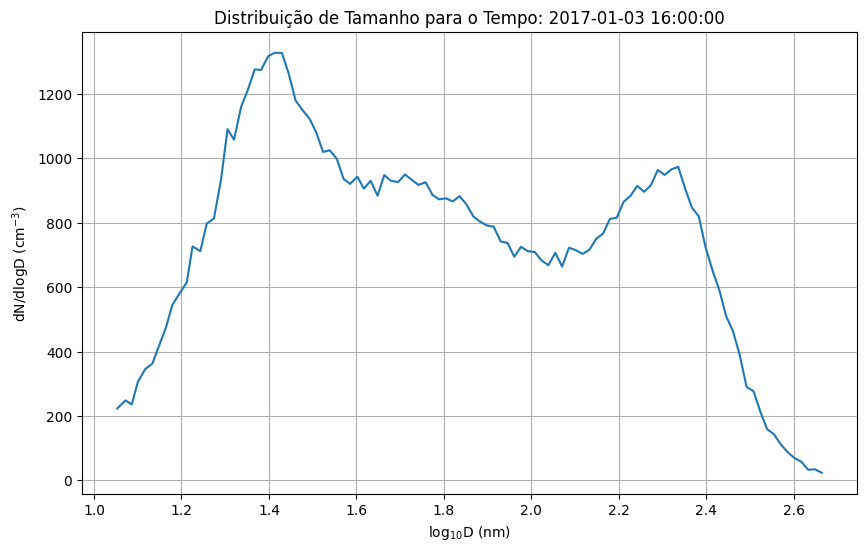

In [ ]:
# Exemplo de distribuição de tamanho, com eixo x em escala log
def plot_distribution(linha):
    data_slice          = dados.iloc[linha, init:final]
    # Get the columns that were successfully converted to diameters
    diameter_columns    = [col for col in columns if col.startswith('D_')]
    filtered_data_slice = data_slice[diameter_columns]
    valid_indices       = filtered_data_slice.notna()

    plt.figure(figsize=(10, 6))
    plt.plot(np.log10(np.array(diameters)[valid_indices]), filtered_data_slice[valid_indices])
    plt.xlabel('log$_{10}$D (nm)')
    plt.ylabel('dN/dlogD (cm$^{-3}$)')
    plt.title(f'Distribuição de Tamanho para o Tempo: {dados_semi_limpo.index[linha]}')
    plt.grid(True)
    plt.show()

linha = 1 # a linha que será plotada
plot_distribution(linha)

In [ ]:
# Verifica se há dados faltantes
dados_semi_limpo.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7040 entries, 2017-01-03 15:00:00 to 2023-04-21 21:00:00
Data columns (total 128 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    N_CN_SMPS_STP       7040 non-null   float64
 1    N_CN_CPC_STP        7040 non-null   float64
 2    Qc_CPC_SMPS         7040 non-null   float64
 3    Qc_ACSM_SMPS        7040 non-null   float64
 4    Qc_Neph_SMPS        7040 non-null   float64
 5    D_9_14              0 non-null      float64
 6    D_9_47              0 non-null      float64
 7    D_9_82              0 non-null      float64
 8    D_10_2              0 non-null      float64
 9    D_10_6              3237 non-null   float64
 10   D_10_9              4731 non-null   float64
 11   D_11_3              7040 non-null   float64
 12   D_11_8              7040 non-null   float64
 13   D_12_2              7040 non-null   float64
 14   D_12_6              7040 non-null   float64
 15   

In [ ]:
dlogD = []
dlogD = [np.log10(diameters[0]/9)]
for i in range(1, len(diameters)):
    dlogD.append(np.log10(diameters[i]/diameters[i-1]))
dlogD = np.array(dlogD)
print(len(dlogD))

113


In [ ]:
dados.iloc[:, init:final].columns

Index(['D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6', 'D_10_9', 'D_11_3',
       'D_11_8', 'D_12_2', 'D_12_6',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=113)

In [ ]:
# (cálculo apenas para conferência, equivale aproximadamente à coluna N_CN_SMPS_STP)
parametros                  = pd.DataFrame()
parametros['N_CN_SMPS_STP'] = dados['N_CN_SMPS_STP']

# Concentração total = soma(dN_i*dlogD_i)
total_conc                = (dados.iloc[:, init:final] * dlogD).sum(axis=1)
parametros['total_conc']  = total_conc

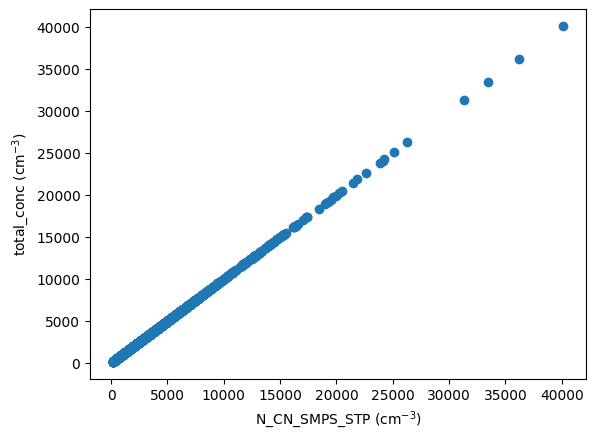

In [ ]:
plt.scatter(parametros['N_CN_SMPS_STP'], parametros['total_conc'])
plt.xlabel('N_CN_SMPS_STP (cm$^{-3}$)')
plt.ylabel('total_conc (cm$^{-3}$)')
plt.show()

In [ ]:
# Diâmetro geométrico médio de cada distribuição de tamanho
# Equivale à média geométrica ponderada pelas concentrações
diam_geom_medio               = (dados.iloc[:, init:final] * dlogD * np.log10(diameters)).sum(axis=1)
diam_geom_medio               = 10**(diam_geom_medio/parametros['N_CN_SMPS_STP'].astype(float)) # acrescentei o astype(float) para lidar con str's e NaN's
parametros['diam_geom_medio'] = diam_geom_medio
display(parametros)

N_CN_SMPS_STP   total_conc  diam_geom_medio
Start_date                                                      
2017-01-03 15:00:00         926.14   926.291126        68.850205
2017-01-03 16:00:00        1210.43  1210.419155        60.148987
2017-01-03 17:00:00        1453.54  1453.832969        55.133531
2017-01-03 18:00:00        1818.92  1819.771529        49.703442
2017-01-03 19:00:00        2062.81  2063.131372        45.432405
...                            ...          ...              ...
2023-04-21 17:00:00        2387.56  2386.235931        37.824548
2023-04-21 18:00:00        4060.52  4059.387048        28.642972
2023-04-21 19:00:00        3605.75  3602.422073        27.028160
2023-04-21 20:00:00        4357.27  4358.902332        23.732887
2023-04-21 21:00:00        5666.31  5669.342883        22.713466

[7040 rows x 3 columns]

In [ ]:
# Concentração de partículas com diâmetro <50nm, <100nm e >50nm, >100nm

# Seleciona as colunas cujo diâmetro é menor ou igual a 50nm
diameter_mask             = np.array(diameters) <= 50
sel_columns               = dados.columns[init:final][diameter_mask]
parametros['conc D<50']   = (dados[sel_columns] * dlogD[diameter_mask]).sum(axis=1)

# Seleciona as colunas cujo diâmetro é maior ou igual a 100nm
diameter_mask_p100        = np.array(diameters) >= 100
sel_columns_p100          = dados.columns[init:final][diameter_mask_p100]
parametros['conc D>100']  = (dados[sel_columns_p100] * dlogD[diameter_mask_p100]).sum(axis=1)

parametros.drop('total_conc', axis=1, inplace=True)
parametros.head()

N_CN_SMPS_STP  diam_geom_medio    conc D<50  conc D>100
Start_date                                                                  
2017-01-03 15:00:00         926.14        68.850205   350.450953  351.245586
2017-01-03 16:00:00        1210.43        60.148987   570.999318  393.123466
2017-01-03 17:00:00        1453.54        55.133531   788.130891  424.054258
2017-01-03 18:00:00        1818.92        49.703442  1120.621235  422.987506
2017-01-03 19:00:00        2062.81        45.432405  1372.343703  382.339718

In [ ]:
# Volume (um3/cm3) e Área Superficial (um2/cm3)
# Assume que as partículas são esféricas
parametros['area']  = 1E-06*np.pi*(dados.iloc[:, init:final] * dlogD * (diameters**2)).sum(axis=1)
parametros['vol']   = 1E-09*(np.pi/6)*(dados.iloc[:, init:final] * dlogD * (diameters**3)).sum(axis=1)

parametros.head()

N_CN_SMPS_STP  diam_geom_medio    conc D<50  conc D>100  \
Start_date                                                                     
2017-01-03 15:00:00         926.14        68.850205   350.450953  351.245586   
2017-01-03 16:00:00        1210.43        60.148987   570.999318  393.123466   
2017-01-03 17:00:00        1453.54        55.133531   788.130891  424.054258   
2017-01-03 18:00:00        1818.92        49.703442  1120.621235  422.987506   
2017-01-03 19:00:00        2062.81        45.432405  1372.343703  382.339718   

                          area       vol  
Start_date                                
2017-01-03 15:00:00  49.322915  1.804501  
2017-01-03 16:00:00  56.184538  2.062855  
2017-01-03 17:00:00  57.515800  2.024108  
2017-01-03 18:00:00  58.123241  1.977726  
2017-01-03 19:00:00  54.902840  1.828336

In [ ]:
# Impõe NaN nas linhas em que 'N_CN_SMPS_STP'==NaN
nan_mask                                      = parametros['N_CN_SMPS_STP'].isnull()
columns_to_replace                            = ['diam_geom_medio', 'conc D<50', 'conc D>100', 'area', 'vol']
parametros.loc[nan_mask, columns_to_replace]  = np.nan

## Plots

In [ ]:
parametros.index = pd.to_datetime(parametros.index)

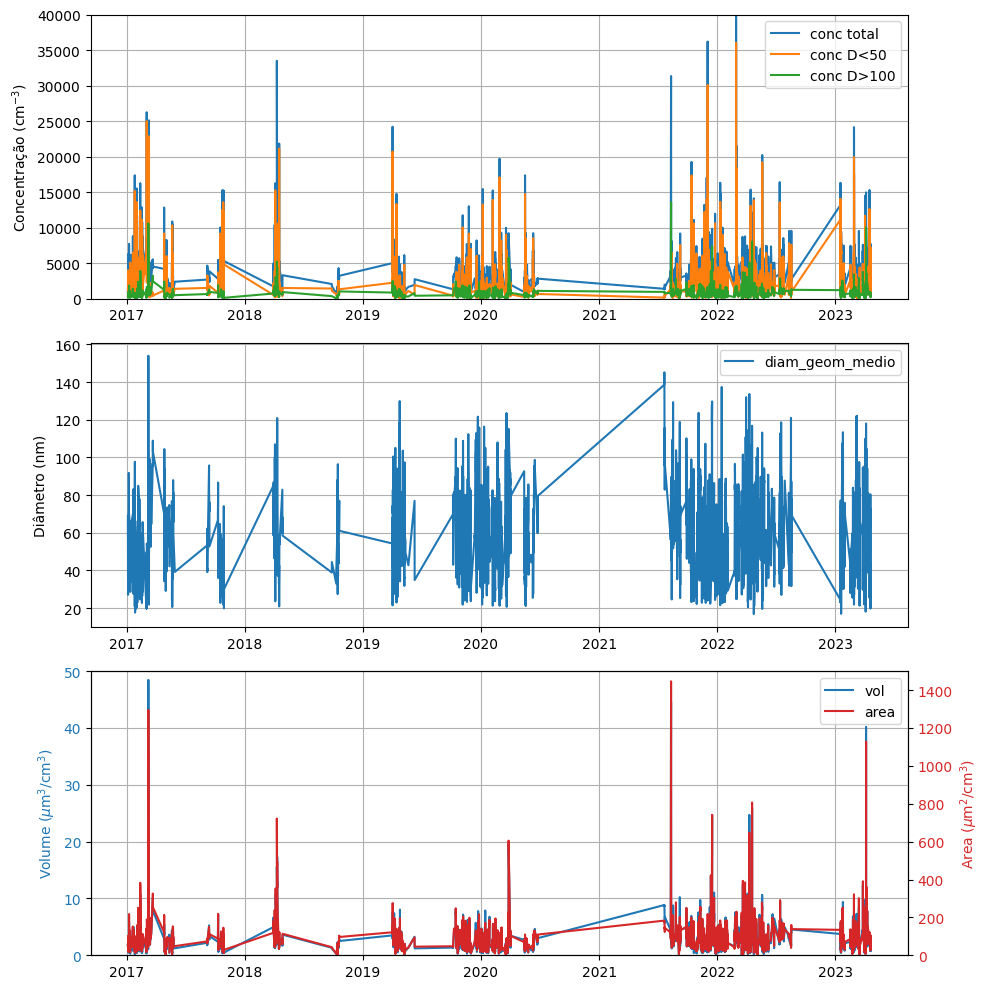

********************
Tempo de execução: 0.68 segundos
********************


In [ ]:
# Séries temporais
t0 = time.time()
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10, 10)) # Adjusted figsize for better readability

ax[0].plot(parametros.index, parametros['N_CN_SMPS_STP'], label='conc total')
ax[0].plot(parametros.index, parametros['conc D<50'], label='conc D<50')
ax[0].plot(parametros.index, parametros['conc D>100'], label='conc D>100')
ax[0].set_ylabel('Concentração (cm$^{-3}$)')
ax[0].legend()
ax[0].grid(True)
ax[0].set_ylim(0, 40000)

ax[1].plot(parametros.index, parametros['diam_geom_medio'], label='diam_geom_medio')
ax[1].set_ylabel('Diâmetro (nm)')
ax[1].legend()
ax[1].grid(True)

# Plotting vol on the primary y-axis of the third subplot
ax[2].plot(parametros.index, parametros['vol'], label='vol', color='tab:blue')
ax[2].set_ylabel(r'Volume ($\mu$m$^3$/cm$^3$)', color='tab:blue')
ax[2].tick_params(axis='y', labelcolor='tab:blue')
ax[2].grid(True)
ax[2].set_ylim(0, 50)

# Creating a secondary y-axis for the third subplot
ax3 = ax[2].twinx()
ax3.plot(parametros.index, parametros['area'], label='area', color='tab:red')
ax3.set_ylabel(r'Area ($\mu$m$^2$/cm$^3$)', color='tab:red')
ax3.tick_params(axis='y', labelcolor='tab:red')
ax3.set_ylim(0, 1500)

# Combine legends from both axes
lines, labels   = ax[2].get_legend_handles_labels()
lines2, labels2 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2, labels + labels2)

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()
tf = time.time()
print('*'*20)
print(f"Tempo de execução: {tf-t0:.2f} segundos")
print('*'*20)

In [ ]:
# Find rows where N_CN_SMPS_STP > 50000
high_concentration_rows = dados[dados['N_CN_SMPS_STP'] > 50000]
print(f'Dados com alta concentração: {len(high_concentration_rows)}')
# Iterate through the high concentration rows and plot the size distribution
if len(high_concentration_rows) != 0:
  for index, row in high_concentration_rows.iterrows():
      data_slice = row.iloc[init:final]
      # Get the columns that were successfully converted to diameters
      diameter_columns = [col for col in dados.columns[init:final] if col.startswith('D_')]

      # Filter the data slice and diameters based on these columns
      filtered_data_slice = data_slice[diameter_columns]
      filtered_diameters  = [float(col[2:].replace('_', '.')) for col in diameter_columns]

      valid_indices       = filtered_data_slice.notna()

      plt.figure(figsize=(5,3))
      plt.plot(np.log10(np.array(filtered_diameters)[valid_indices]), filtered_data_slice[valid_indices])
      plt.xlabel('log$_{10}$D (nm)')
      plt.ylabel('dN/dlogD (cm$^{-3}$)')
      plt.title(f'{index} - conc total: {row["N_CN_SMPS_STP"]:.0f}')
      plt.grid(True)
      plt.show()
else:
  print('Não há dados com alta concentração. Nada para mostrar aqui...')

Dados com alta concentração: 0
Não há dados com alta concentração. Nada para mostrar aqui...


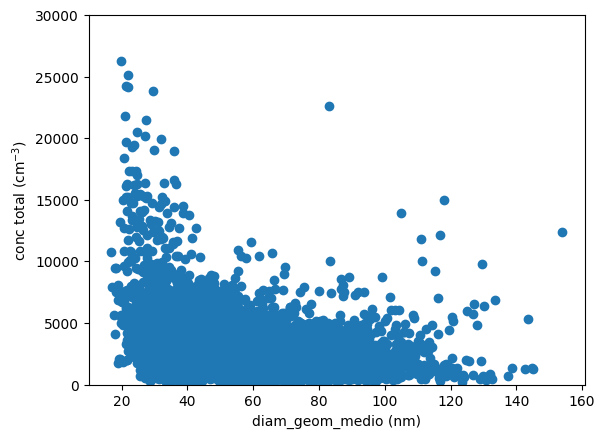

In [ ]:
plt.scatter(parametros['diam_geom_medio'], parametros['N_CN_SMPS_STP'])
plt.ylabel('conc total (cm$^{-3}$)')
plt.xlabel('diam_geom_medio (nm)')
plt.ylim(0, 30000)
plt.show()

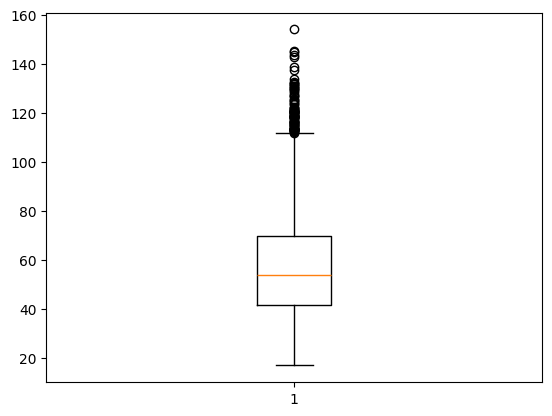

In [ ]:
plt.boxplot(parametros['diam_geom_medio']);

In [ ]:
parametros['diam_geom_medio'].sort_values(ascending=False).head(10)

Start_date
2017-03-07 22:00:00    153.947564
2021-07-21 21:00:00    145.133940
2021-07-21 19:00:00    144.680160
2017-03-07 21:00:00    143.528864
2021-07-21 20:00:00    142.611973
2021-07-21 18:00:00    138.575793
2022-01-15 08:00:00    137.367504
2022-04-10 20:00:00    133.646338
2022-01-15 07:00:00    132.547688
2022-03-31 19:00:00    131.947322
Name: diam_geom_medio, dtype: float64

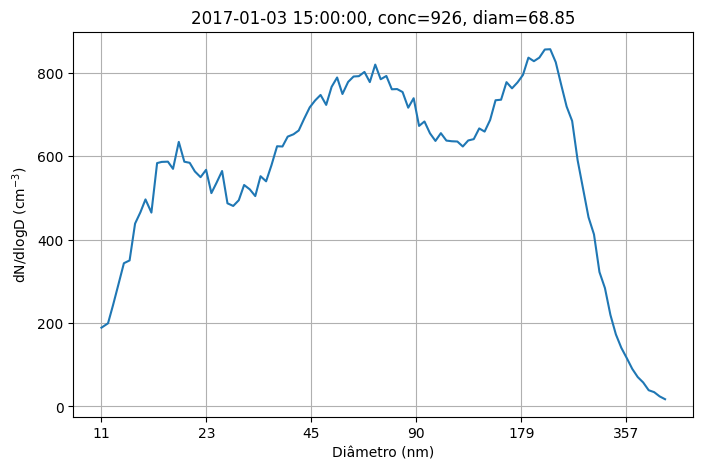

In [ ]:
# Exemplo de distribuição de tamanho, com eixo x em escala log
def plot_distribution(linha):
    data_slice = dados.iloc[linha, init:final]
    # Get the columns that were successfully converted to diameters
    diameter_columns    = [col for col in dados.columns[init:final] if col.startswith('D_')]
    filtered_data_slice = data_slice[diameter_columns]
    valid_indices       = filtered_data_slice.notna()

    # Get the corresponding parameters
    n_cn_smps_stp   = parametros.iloc[linha]['N_CN_SMPS_STP']
    diam_geom_medio = parametros.iloc[linha]['diam_geom_medio']

    plt.figure(figsize=(8, 5))
    plt.plot(np.log10(np.array(diameters)[valid_indices]), filtered_data_slice[valid_indices])
    plt.xlabel('Diâmetro (nm)') # Change x-label to indicate actual diameter
    plt.ylabel('dN/dlogD (cm$^{-3}$)')
    plt.title(f'{dados.index[linha]}, conc={n_cn_smps_stp:.0f}, diam={diam_geom_medio:.2f}')
    plt.grid(True)

    # Set custom x-ticks and labels
    log_diameters_valid = np.log10(np.array(diameters)[valid_indices])
    tick_log_locations  = np.arange(log_diameters_valid.min(), log_diameters_valid.max(), 0.3)
    tick_locations      = 10**tick_log_locations
    tick_labels         = [f'{d:.0f}' for d in tick_locations] # Format labels as integers
    plt.xticks(tick_log_locations, tick_labels)

    plt.show()

linha = 0
plot_distribution(linha)

In [ ]:
dados.columns, parametros.columns

(Index(['N_CN_SMPS_STP', 'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS',
        'Qc_Neph_SMPS', 'D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6',
        ...
        'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP', 'Mass_BC_PSAP_STP',
        'Mass_SMPS_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
        'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP', 'soma_Qc'],
       dtype='object', length=128),
 Index(['N_CN_SMPS_STP', 'diam_geom_medio', 'conc D<50', 'conc D>100', 'area',
        'vol'],
       dtype='object'))

In [ ]:
dados_trat = pd.concat([dados, parametros.drop(columns=['N_CN_SMPS_STP'])], axis=1)
dados_trat.head()

N_CN_SMPS_STP  N_CN_CPC_STP  Qc_CPC_SMPS  Qc_ACSM_SMPS  \
Start_date                                                                    
2017-01-03 15:00:00         926.14       1208.14          0.0           0.0   
2017-01-03 16:00:00        1210.43       1558.35          0.0           0.0   
2017-01-03 17:00:00        1453.54       1839.43          0.0           0.0   
2017-01-03 18:00:00        1818.92       2313.23          0.0           0.0   
2017-01-03 19:00:00        2062.81       2604.68          0.0           0.0   

                     Qc_Neph_SMPS  D_9_14  D_9_47  D_9_82  D_10_2  D_10_6  \
Start_date                                                                  
2017-01-03 15:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 16:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 17:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 18:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 19:00:00           0.0     NaN     NaN     NaN     NaN     NaN   

                     ...  Mass_chloride_STP  Mass_nitrate_STP  \
Start_date           ...                                        
2017-01-03 15:00:00  ...             0.0126            1.2227   
2017-01-03 16:00:00  ...             0.0191            1.1410   
2017-01-03 17:00:00  ...             0.0023            1.0257   
2017-01-03 18:00:00  ...             0.0063            0.8801   
2017-01-03 19:00:00  ...             0.0116            0.7989   

                     Mass_organics_STP  Mass_sulfate_STP  soma_Qc  \
Start_date                                                          
2017-01-03 15:00:00             1.9492            1.0954      0.0   
2017-01-03 16:00:00             2.2364            1.3200      0.0   
2017-01-03 17:00:00             2.3834            1.0674      0.0   
2017-01-03 18:00:00             1.9003            1.0288      0.0   
2017-01-03 19:00:00             1.9514            1.0285      0.0   

                     diam_geom_medio    conc D<50  conc D>100       area  \
Start_date                                                                 
2017-01-03 15:00:00        68.850205   350.450953  351.245586  49.322915   
2017-01-03 16:00:00        60.148987   570.999318  393.123466  56.184538   
2017-01-03 17:00:00        55.133531   788.130891  424.054258  57.515800   
2017-01-03 18:00:00        49.703442  1120.621235  422.987506  58.123241   
2017-01-03 19:00:00        45.432405  1372.343703  382.339718  54.902840   

                          vol  
Start_date                     
2017-01-03 15:00:00  1.804501  
2017-01-03 16:00:00  2.062855  
2017-01-03 17:00:00  2.024108  
2017-01-03 18:00:00  1.977726  
2017-01-03 19:00:00  1.828336  

[5 rows x 133 columns]

In [ ]:
#dados_trat.to_csv('/content/drive/MyDrive/Machine Learning/Projeto/SGP_smps_acsm_hour_all_trat_v3_Qt_leq_1.csv')

## Continuando...

A parte com os dados previamente tratados foi feita na seção anterior e salvo em um arquivo de acesso livre. Podemos continuar as análises a partir deste ponto. Na célula abaixo importo esse arquivo para o ambiente de trabalho do notebook.

In [ ]:
'''files = {
    'SGP_smps_acsm_hour_all_treated.csv': '1A---qGBPSOkDYFeyM5BElReabJ2Y8E4k'
}


# Carregar todos os arquivos para a área de trabalho do colab
for filename, file_id in files.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Baixando {filename}...")
    gdown.download(url, filename, quiet=False)
    print(f"{filename} carregado com sucesso!")'''


dados_old2 = dados.copy()
dados = dados_trat.copy()
dados.head()

N_CN_SMPS_STP  N_CN_CPC_STP  Qc_CPC_SMPS  Qc_ACSM_SMPS  \
Start_date                                                                    
2017-01-03 15:00:00         926.14       1208.14          0.0           0.0   
2017-01-03 16:00:00        1210.43       1558.35          0.0           0.0   
2017-01-03 17:00:00        1453.54       1839.43          0.0           0.0   
2017-01-03 18:00:00        1818.92       2313.23          0.0           0.0   
2017-01-03 19:00:00        2062.81       2604.68          0.0           0.0   

                     Qc_Neph_SMPS  D_9_14  D_9_47  D_9_82  D_10_2  D_10_6  \
Start_date                                                                  
2017-01-03 15:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 16:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 17:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 18:00:00           0.0     NaN     NaN     NaN     NaN     NaN   
2017-01-03 19:00:00           0.0     NaN     NaN     NaN     NaN     NaN   

                     ...  Mass_chloride_STP  Mass_nitrate_STP  \
Start_date           ...                                        
2017-01-03 15:00:00  ...             0.0126            1.2227   
2017-01-03 16:00:00  ...             0.0191            1.1410   
2017-01-03 17:00:00  ...             0.0023            1.0257   
2017-01-03 18:00:00  ...             0.0063            0.8801   
2017-01-03 19:00:00  ...             0.0116            0.7989   

                     Mass_organics_STP  Mass_sulfate_STP  soma_Qc  \
Start_date                                                          
2017-01-03 15:00:00             1.9492            1.0954      0.0   
2017-01-03 16:00:00             2.2364            1.3200      0.0   
2017-01-03 17:00:00             2.3834            1.0674      0.0   
2017-01-03 18:00:00             1.9003            1.0288      0.0   
2017-01-03 19:00:00             1.9514            1.0285      0.0   

                     diam_geom_medio    conc D<50  conc D>100       area  \
Start_date                                                                 
2017-01-03 15:00:00        68.850205   350.450953  351.245586  49.322915   
2017-01-03 16:00:00        60.148987   570.999318  393.123466  56.184538   
2017-01-03 17:00:00        55.133531   788.130891  424.054258  57.515800   
2017-01-03 18:00:00        49.703442  1120.621235  422.987506  58.123241   
2017-01-03 19:00:00        45.432405  1372.343703  382.339718  54.902840   

                          vol  
Start_date                     
2017-01-03 15:00:00  1.804501  
2017-01-03 16:00:00  2.062855  
2017-01-03 17:00:00  2.024108  
2017-01-03 18:00:00  1.977726  
2017-01-03 19:00:00  1.828336  

[5 rows x 133 columns]

In [ ]:
final = -15
dados.columns[init:final]

Index(['D_9_14', 'D_9_47', 'D_9_82', 'D_10_2', 'D_10_6', 'D_10_9', 'D_11_3',
       'D_11_8', 'D_12_2', 'D_12_6',
       ...
       'D_371_8', 'D_385_4', 'D_399_5', 'D_414_2', 'D_429_4', 'D_445_1',
       'D_461_4', 'D_478_3', 'D_495_8', 'D_514'],
      dtype='object', length=113)

In [ ]:
# Dropando as colunas individuais de cada diâmetros

dados       = dados.drop(columns=dados.columns[init:final])
dados_trat  = dados_trat.drop(columns=dados_trat.columns[init:final])
dados.columns # só checando

Index(['N_CN_SMPS_STP', 'N_CN_CPC_STP', 'Qc_CPC_SMPS', 'Qc_ACSM_SMPS',
       'Qc_Neph_SMPS', 'Mass_ACSM_PSAP_STP', 'Mass_ACSM_STP',
       'Mass_BC_PSAP_STP', 'Mass_SMPS_STP', 'Mass_ammonium_STP',
       'Mass_chloride_STP', 'Mass_nitrate_STP', 'Mass_organics_STP',
       'Mass_sulfate_STP', 'soma_Qc', 'diam_geom_medio', 'conc D<50',
       'conc D>100', 'area', 'vol'],
      dtype='object')

In [ ]:
dados.head()

N_CN_SMPS_STP  N_CN_CPC_STP  Qc_CPC_SMPS  Qc_ACSM_SMPS  \
Start_date                                                                    
2017-01-03 15:00:00         926.14       1208.14          0.0           0.0   
2017-01-03 16:00:00        1210.43       1558.35          0.0           0.0   
2017-01-03 17:00:00        1453.54       1839.43          0.0           0.0   
2017-01-03 18:00:00        1818.92       2313.23          0.0           0.0   
2017-01-03 19:00:00        2062.81       2604.68          0.0           0.0   

                     Qc_Neph_SMPS  Mass_ACSM_PSAP_STP  Mass_ACSM_STP  \
Start_date                                                             
2017-01-03 15:00:00           0.0              5.0451         4.9781   
2017-01-03 16:00:00           0.0              5.3641         5.2933   
2017-01-03 17:00:00           0.0              5.4724         5.4008   
2017-01-03 18:00:00           0.0              4.3680         4.2983   
2017-01-03 19:00:00           0.0              4.3164         4.2466   

                     Mass_BC_PSAP_STP  Mass_SMPS_STP  Mass_ammonium_STP  \
Start_date                                                                
2017-01-03 15:00:00            0.0670         2.7641             0.6983   
2017-01-03 16:00:00            0.0709         3.1234             0.5768   
2017-01-03 17:00:00            0.0716         3.0425             0.9220   
2017-01-03 18:00:00            0.0697         2.9643             0.4827   
2017-01-03 19:00:00            0.0698         2.7191             0.4563   

                     Mass_chloride_STP  Mass_nitrate_STP  Mass_organics_STP  \
Start_date                                                                    
2017-01-03 15:00:00             0.0126            1.2227             1.9492   
2017-01-03 16:00:00             0.0191            1.1410             2.2364   
2017-01-03 17:00:00             0.0023            1.0257             2.3834   
2017-01-03 18:00:00             0.0063            0.8801             1.9003   
2017-01-03 19:00:00             0.0116            0.7989             1.9514   

                     Mass_sulfate_STP  soma_Qc  diam_geom_medio    conc D<50  \
Start_date                                                                     
2017-01-03 15:00:00            1.0954      0.0        68.850205   350.450953   
2017-01-03 16:00:00            1.3200      0.0        60.148987   570.999318   
2017-01-03 17:00:00            1.0674      0.0        55.133531   788.130891   
2017-01-03 18:00:00            1.0288      0.0        49.703442  1120.621235   
2017-01-03 19:00:00            1.0285      0.0        45.432405  1372.343703   

                     conc D>100       area       vol  
Start_date                                            
2017-01-03 15:00:00  351.245586  49.322915  1.804501  
2017-01-03 16:00:00  393.123466  56.184538  2.062855  
2017-01-03 17:00:00  424.054258  57.515800  2.024108  
2017-01-03 18:00:00  422.987506  58.123241  1.977726  
2017-01-03 19:00:00  382.339718  54.902840  1.828336

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7040 entries, 2017-01-03 15:00:00 to 2023-04-21 21:00:00
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   N_CN_SMPS_STP       7040 non-null   float64
 1   N_CN_CPC_STP        7040 non-null   float64
 2   Qc_CPC_SMPS         7040 non-null   float64
 3   Qc_ACSM_SMPS        7040 non-null   float64
 4   Qc_Neph_SMPS        7040 non-null   float64
 5   Mass_ACSM_PSAP_STP  7040 non-null   float64
 6   Mass_ACSM_STP       7040 non-null   float64
 7   Mass_BC_PSAP_STP    7040 non-null   float64
 8   Mass_SMPS_STP       7040 non-null   float64
 9   Mass_ammonium_STP   7040 non-null   float64
 10  Mass_chloride_STP   7040 non-null   float64
 11  Mass_nitrate_STP    7040 non-null   float64
 12  Mass_organics_STP   7040 non-null   float64
 13  Mass_sulfate_STP    7040 non-null   float64
 14  soma_Qc             7040 non-null   float64
 15  diam_geom_medio    

Temos ainda um conjunto de dados com 7040 entradas e sem NaNs.

In [ ]:
## Só checando antes o número de casos completos (linha inteira com dados, mesmo fora das colunas de interesse)

linhas_completas = dados.dropna()

print(f"Número de linhas com todas as variáveis: {len(linhas_completas)}")
print(f"Número linhas com dados faltantes: {len(dados) - len(linhas_completas)}")
print(f"Parcela de linhas com todas as variáveis: {len(linhas_completas) / len(dados) * 100:.2f}%")

Número de linhas com todas as variáveis: 7040
Número linhas com dados faltantes: 0
Parcela de linhas com todas as variáveis: 100.00%


Tudo completo!

old: *São 450 linhas com dados faltantes (< 459 porque tem linhas com mais de um NaN). Podemos decidir depois o que fazer, mas, novamente, são principalmente parâmetros referentes à qualidade de uma medição, são mais importantes para identificar outliers. De todo modo, se decidirmos dropar essas linhas, ainda teremos 7767 linhas, ainda bem significativo.*

In [ ]:
#dados.to_csv('/content/drive/MyDrive/Machine Learning/Projeto/SGP_smps_acsm_hour_all_treated_v2.csv')

Código para baixar esse arquivo: 1tgNLU_xRvWCa4PuCbhG4wZ3PKBy2iO6J

Se preferirem o link: https://drive.google.com/file/d/1tgNLU_xRvWCa4PuCbhG4wZ3PKBy2iO6J/view?usp=drive_link

## Verificação da distribuição dos dados por ano e mês

Aplicamos muitos cortes e com isso excluímos um volume grande de dados. É interessante checar como esses dados estão distribuídos ao longo dos anos e meses para nos certificarmos que não estamos tratando dados tendenciosos.

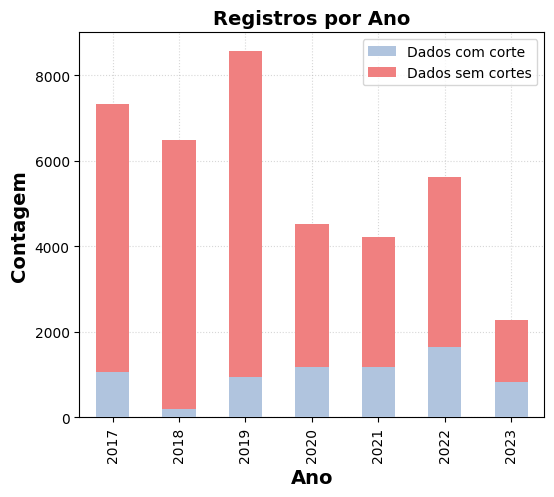

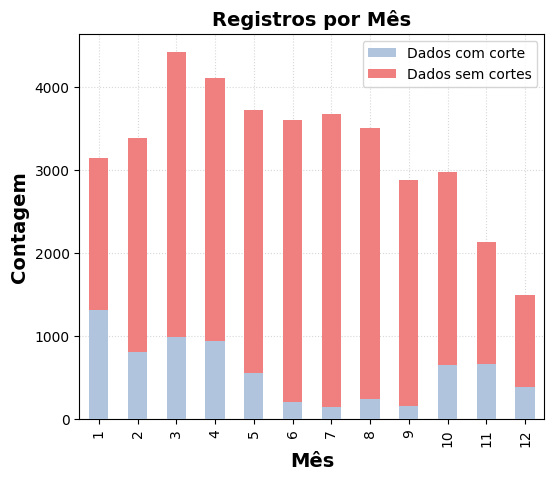

In [ ]:
datas       = pd.to_datetime(dados.index) # só para ter as datas com acesso mais fácil
datas_old   = pd.to_datetime(dados_old.index)

contagem_ano      = datas.year.value_counts().sort_index()
contagem_ano_old  = datas_old.year.value_counts().sort_index()

plt.figure(figsize=(6, 5))
contagem_ano.plot(kind='bar', color='lightsteelblue', label='Dados com corte', zorder=3)
contagem_ano_old.plot(kind='bar', color='lightcoral', label='Dados sem cortes', zorder=2)
plt.legend()
plt.xlabel('Ano', fontweight='bold', fontsize=14)
plt.ylabel('Contagem', fontweight='bold', fontsize=14)
plt.title('Registros por Ano', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.5, zorder=1, linestyle=':')
#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/comparison_w_wo_cut_year_-_qc_sum.png', dpi=150)
plt.show()

contagem_mes      = datas.month.value_counts().sort_index()
contagem_mes_old  = datas_old.month.value_counts().sort_index()

plt.figure(figsize=(6, 5))
contagem_mes.plot(kind='bar', color='lightsteelblue', label='Dados com corte', zorder=3)
contagem_mes_old.plot(kind='bar', color='lightcoral', label='Dados sem cortes', zorder=2)
plt.legend()
plt.xlabel('Mês', fontweight='bold', fontsize=14)
plt.ylabel('Contagem', fontweight='bold', fontsize=14)
plt.title('Registros por Mês', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.5, zorder=1, linestyle=':')
#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/comparison_w_wo_cut_month_-_qc_sum.png', dpi=150)
plt.show()


De fato, a penalização no ano de 2018 e nos meses de junho a outubro foi bem grande com esses cortes.

Na distribuição por ano, podemos ver que carecemos mais dos dados de 2018, mas talvez não chegue a ser um problema porque a distribuição para os demais anos é razoavelmente equivalente.

A distribuição dos meses que chama um pouco a atenção, uma vez que o período que compreende os meses de junho a setembro apresenta uma baixa.

Por ora, seguiremos assim, mas pode ser interessante retornar a este ponto mais tarde para buscar uma harmonização entre as distribuições de dados nos anos e meses.

# Parte final do condicionamento dos dados


Agora que já estudamos um pouco do comportamento dos preditores, vamos acrescentar o alvo ao nosso trabalho. A princípio, deseja-se, como proposto inicialmente, estudar a grandeza intrínseca "eficiência de espalhamento", que é obtida pela razão do espalhamento com a massa total da amostra. Deseja-se estudá-la em detrimento da grandeza extrínseca "espalhamento" porque acredita-se que esta pode apresentar resultados bons sem muito ganho de informação: com o crescimento da massa, esperamos mesmo que haja mais espalhamento. A ideia é estudar outros aspectos desse fenêmeno.

Vamos começar organizando novamente após a importação.

In [ ]:
files_neph = {
    'SGP_neph_hour_2017.csv': '1tmNTeNHgcXyIy_j8ruqNMrxJTRFahJrO',
    'SGP_neph_hour_2018.csv': '1H_oDs0-tUYY4Y-Q9ZW1bZliS2uW5IEQZ',
    'SGP_neph_hour_2019.csv': '1EYCCugHCN5urtmZqq2Ppzlr3VYgGTGqR',
    'SGP_neph_hour_2020.csv': '1OTHPj-8ZJ4dIcOnYMT655pLAiDpTSJrU',
    'SGP_neph_hour_2021.csv': '19QWf6Pg16glAPUpxZ8a5RKYYnZatNXmF',
    'SGP_neph_hour_2022.csv': '1UFsn2FLz_Rv3q1JqM4muNaV0dV9iihTm',
    'SGP_neph_hour_2023.csv': '1896cg345Ih4XzKriiGVITwoUnD4gXmmD'
}

In [ ]:
for filename, file_id in files_neph.items():
    url = f"https://drive.google.com/uc?id={file_id}"
    print(f"Baixando {filename}...")
    gdown.download(url, filename, quiet=False)
    print(f"{filename} carregado com sucesso!")

Baixando SGP_neph_hour_2017.csv...


Downloading...
From: https://drive.google.com/uc?id=1tmNTeNHgcXyIy_j8ruqNMrxJTRFahJrO
To: /content/SGP_neph_hour_2017.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 7.38MB/s]


SGP_neph_hour_2017.csv carregado com sucesso!
Baixando SGP_neph_hour_2018.csv...


Downloading...
From: https://drive.google.com/uc?id=1H_oDs0-tUYY4Y-Q9ZW1bZliS2uW5IEQZ
To: /content/SGP_neph_hour_2018.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 7.13MB/s]


SGP_neph_hour_2018.csv carregado com sucesso!
Baixando SGP_neph_hour_2019.csv...


Downloading...
From: https://drive.google.com/uc?id=1EYCCugHCN5urtmZqq2Ppzlr3VYgGTGqR
To: /content/SGP_neph_hour_2019.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 13.4MB/s]


SGP_neph_hour_2019.csv carregado com sucesso!
Baixando SGP_neph_hour_2020.csv...


Downloading...
From: https://drive.google.com/uc?id=1OTHPj-8ZJ4dIcOnYMT655pLAiDpTSJrU
To: /content/SGP_neph_hour_2020.csv
100%|██████████| 1.80M/1.80M [00:00<00:00, 12.3MB/s]


SGP_neph_hour_2020.csv carregado com sucesso!
Baixando SGP_neph_hour_2021.csv...


Downloading...
From: https://drive.google.com/uc?id=19QWf6Pg16glAPUpxZ8a5RKYYnZatNXmF
To: /content/SGP_neph_hour_2021.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 13.5MB/s]


SGP_neph_hour_2021.csv carregado com sucesso!
Baixando SGP_neph_hour_2022.csv...


Downloading...
From: https://drive.google.com/uc?id=1UFsn2FLz_Rv3q1JqM4muNaV0dV9iihTm
To: /content/SGP_neph_hour_2022.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 11.2MB/s]


SGP_neph_hour_2022.csv carregado com sucesso!
Baixando SGP_neph_hour_2023.csv...


Downloading...
From: https://drive.google.com/uc?id=1896cg345Ih4XzKriiGVITwoUnD4gXmmD
To: /content/SGP_neph_hour_2023.csv
100%|██████████| 1.79M/1.79M [00:00<00:00, 12.2MB/s]

SGP_neph_hour_2023.csv carregado com sucesso!


In [ ]:
# Aqui, importamos novamente
SGP_neph_hour_2017 = pd.read_csv('SGP_neph_hour_2017.csv')
SGP_neph_hour_2018 = pd.read_csv('SGP_neph_hour_2018.csv')
SGP_neph_hour_2019 = pd.read_csv('SGP_neph_hour_2019.csv')
SGP_neph_hour_2020 = pd.read_csv('SGP_neph_hour_2020.csv')
SGP_neph_hour_2021 = pd.read_csv('SGP_neph_hour_2021.csv')
SGP_neph_hour_2022 = pd.read_csv('SGP_neph_hour_2022.csv')
SGP_neph_hour_2023 = pd.read_csv('SGP_neph_hour_2023.csv')

In [ ]:
# Juntando em um só
SGP_neph_hour_all = pd.concat([SGP_neph_hour_2017, SGP_neph_hour_2018, SGP_neph_hour_2019, SGP_neph_hour_2020, SGP_neph_hour_2021, SGP_neph_hour_2022, SGP_neph_hour_2023])
SGP_neph_alvo     = SGP_neph_hour_all.loc[:,['Start_date','BsG1_STP']]

In [ ]:
# Para transformar a coluna de data em índice
SGP_neph_alvo['Start_date'] = pd.to_datetime(SGP_neph_alvo['Start_date'])
SGP_neph_alvo.set_index('Start_date', inplace=True)
SGP_neph_alvo.head()

BsG1_STP
Start_date                   
2017-01-01 00:00:00       NaN
2017-01-01 01:00:00       NaN
2017-01-01 02:00:00       NaN
2017-01-01 03:00:00       NaN
2017-01-01 04:00:00       NaN

In [ ]:
# Organizando o formato dos dados
SGP_neph_alvo['BsG1_STP'] = pd.to_numeric(SGP_neph_alvo['BsG1_STP'], errors='coerce')
SGP_neph_alvo.dropna(subset=['BsG1_STP'], inplace=True)

In [ ]:
# Organizando o formato dos dados
SGP_neph_alvo['Start_date']  = pd.to_datetime(SGP_neph_alvo.index)
dados['Start_date']          = pd.to_datetime(dados_trat.index)

In [ ]:
# Redefinindo índices
SGP_neph_alvo.index = SGP_neph_alvo['Start_date']
dados.index         = dados['Start_date']

In [ ]:
# Juntando neph_subset e dados e dropando o que não será utilizado
dados_neph_merged = pd.merge(dados_trat, SGP_neph_alvo, left_index=True, right_index=True, how='inner')
dados_neph_merged = dados_neph_merged.drop(columns=['Start_date', 'Start_date'])
# Removendo linhas com Mass_ACSM_PSAP_STP <= 0
dados_neph_merged = dados_neph_merged[dados_neph_merged['Mass_ACSM_PSAP_STP'] > 0]

In [ ]:
# Para visualizar
dados_neph_merged.describe()

N_CN_SMPS_STP  N_CN_CPC_STP  Qc_CPC_SMPS  Qc_ACSM_SMPS  Qc_Neph_SMPS  \
count    6351.000000   6351.000000  6351.000000   6351.000000   6351.000000   
mean     3221.563607   4078.408392     0.029287      0.221855      0.092111   
std      2466.712280   3584.380091     0.168622      0.415527      0.289206   
min       133.320000    145.340000     0.000000      0.000000      0.000000   
25%      1686.175000   2017.620000     0.000000      0.000000      0.000000   
50%      2773.410000   3331.870000     0.000000      0.000000      0.000000   
75%      4080.445000   4975.815000     0.000000      0.000000      0.000000   
max     40148.790000  57213.120000     1.000000      1.000000      1.000000   

       Mass_ACSM_PSAP_STP  Mass_ACSM_STP  Mass_BC_PSAP_STP  Mass_SMPS_STP  \
count         6351.000000    6351.000000       6351.000000    6351.000000   
mean             4.138751       4.018781          0.119969       3.480401   
std              3.476922       3.446385          0.109069       2.955722   
min              0.079000       0.021700         -0.003000       0.086900   
25%              2.008400       1.922350          0.050100       1.683550   
50%              3.282600       3.156600          0.090600       2.796100   
75%              5.279200       5.148650          0.162050       4.514500   
max             80.618100      80.138900          2.328700      61.882800   

       Mass_ammonium_STP  ...  Mass_nitrate_STP  Mass_organics_STP  \
count        6351.000000  ...       6351.000000        6351.000000   
mean            0.435445  ...          0.776374           2.201646   
std             0.413955  ...          1.006159           2.458762   
min            -0.349400  ...         -0.024700          -0.199100   
25%             0.178450  ...          0.165850           0.900800   
50%             0.328900  ...          0.373900           1.543700   
75%             0.570850  ...          0.973200           2.759250   
max             4.300300  ...          9.644900          68.365700   

       Mass_sulfate_STP      soma_Qc  diam_geom_medio     conc D<50  \
count       6351.000000  6351.000000      6351.000000   6351.000000   
mean           0.594844     0.343253        55.955828   1785.081587   
std            0.564755     0.474832        20.182649   2039.763297   
min           -0.089100     0.000000        16.868160     36.520644   
25%            0.246750     0.000000        41.132292    647.332713   
50%            0.427700     0.000000        52.977034   1240.194042   
75%            0.740350     1.000000        68.436013   2202.550404   
max            6.040300     1.000000       153.947564  36019.149791   

         conc D>100         area          vol     BsG1_STP  
count   6351.000000  6351.000000  6351.000000  6351.000000  
mean     635.606317    79.646935     2.429169    11.048858  
std      567.553775    62.194724     2.155111    11.612198  
min       17.341559     2.638695     0.061856    -0.560000  
25%      306.488114    43.282202     1.172524     4.590000  
50%      518.665850    67.718788     1.933472     8.170000  
75%      825.293686   102.717670     3.152844    13.595000  
max    13555.246333  1446.380868    48.460781   310.390000  

[8 rows x 21 columns]

Vamos agora criar uma coluna que guarda o valor da soma das três pontuações de *quality check* referentes às características utilizadas nos modelos implementados. Utilizaremos os valores nessa coluna para analisar potenciais *outliers*: se um dado estiver muito distante dos demais, ele nos gera desconfiança, e o investigamos utilizando como um dos critérios o *quality check* total. Manteremos apenas *outliers*, selecionados a partir dos dados que estão fora do quantil 0,005, com *quality check* total 0.

In [ ]:
# Cauda esquerda

lista = []
for i in dados_neph_merged.drop(columns = [ 'soma_Qc','N_CN_SMPS_STP','N_CN_SMPS_STP','conc D<50',
                                           'Qc_ACSM_SMPS','N_CN_CPC_STP','Qc_CPC_SMPS','Qc_Neph_SMPS','BsG1_STP','Mass_ACSM_STP','Mass_SMPS_STP']).columns:
  perc = 1
  j = 0.01
  print(i)
  while perc > 0.2:
    j -= 0.002 * perc
    print(j)
    if j < 0.001:
      j = 0.001
      break
    a = dados_neph_merged[dados_neph_merged[i] < dados_neph_merged[i].quantile(j)].loc[:,'soma_Qc'].value_counts()
    perc = a.get(0, 0) / a.sum() if a.sum() > 0 else 0 # Fix: Safely get count for key 0
  dados_neph_merged = dados_neph_merged[dados_neph_merged[i] > dados_neph_merged[i].quantile(j)]
  lista.append([i,j])

Mass_ACSM_PSAP_STP
0.008
Mass_BC_PSAP_STP
0.008
0.0069019607843137255
0.005765597147950089
0.004565597147950089
0.003279882862235803
0.0021370257193786607
0.0008513114336643748
Mass_ammonium_STP
0.008
0.007372549019607843
0.006691697955778056
0.006040535165080381
0.005425150549695766
0.004910864835410051
0.004459251932184245
0.00397649331149459
0.0035149548499561283
0.0029932157195213457
0.0024668999300476615
Mass_chloride_STP
0.008
0.006823529411764706
0.005680672268907563
0.0044806722689075635
0.0032392929585627356
0.0020011977204674974
0.0007704284896982666
Mass_nitrate_STP
0.008
Mass_organics_STP
0.008
Mass_sulfate_STP
0.008
0.0074
0.006791304347826087
0.006172256728778468
0.005505590062111801
0.004858531238582389
0.004191864571915722
0.003653403033454184
0.0031316639030194013
diam_geom_medio
0.008
0.00708
0.006216363636363637
0.005395850815850816
0.004631144933497876
0.004010455278325462
0.003370455278325462
0.002799026706896891
0.0021323600402302243
0.001560931468801653
0.0009609

In [ ]:
# Cauda direita

lista = []
for i in dados_neph_merged.drop(columns = [ 'soma_Qc','N_CN_SMPS_STP','N_CN_SMPS_STP','conc D<50',
                                           'Qc_ACSM_SMPS','N_CN_CPC_STP','Qc_CPC_SMPS','Qc_Neph_SMPS','BsG1_STP','Mass_ACSM_STP','Mass_SMPS_STP']).columns:
  perc = 1
  j = 0.98
  print(i)
  while perc > 0.2:
    j += 0.004 * perc
    print(j)
    if j > 0.999:
      j = 0.999
      break
    a = dados_neph_merged[dados_neph_merged[i] > dados_neph_merged[i].quantile(j)].loc[:,'soma_Qc'].value_counts()
    perc = a.get(0, 0) / a.sum() if a.sum() > 0 else 0 # Fix: Safely get count for key 0
  dados_neph_merged = dados_neph_merged[dados_neph_merged[i] < dados_neph_merged[i].quantile(j)]
  lista.append([i,j])

Mass_ACSM_PSAP_STP
0.984
Mass_BC_PSAP_STP
0.984
0.9866526315789473
0.9894374417055296
0.9922310924991804
0.9947528316296151
0.997204444532841
0.9990867974740174
Mass_ammonium_STP
0.984
0.9859368421052631
0.9877199746353836
0.9894733992929179
0.9912511770706957
0.9930204078399264
0.9948299316494502
0.9966363832623535
0.9988363832623535
1.0011220975480677
Mass_chloride_STP
0.984
0.9864421052631579
0.9888421052631579
0.9910845295055821
0.9931614525825052
0.9952102330703101
0.9972791985875514
0.999396845646375
Mass_nitrate_STP
0.984
0.9867368421052631
0.9895573549257759
0.9924605807322275
0.9953939140655609
0.9983939140655609
1.001593914065561
Mass_organics_STP
0.984
0.9854042553191489
0.9868461157842652
0.9882307311688806
0.989659302597452
0.9912986468597471
0.9930678776289779
0.995019097141173
0.9971524304745063
0.9990347834156827
Mass_sulfate_STP
0.984
0.985659574468085
0.9874214792299898
0.9892593170678277
0.9908843170678276
0.9925880207715313
0.994315293498804
0.9960799993811569
0.997

In [ ]:
# Criando o alvo propriamente dito (grandeza intrínseca)
dados_neph_merged['Scattering_Eff'] = dados_neph_merged['BsG1_STP'] / dados_neph_merged['Mass_ACSM_PSAP_STP']

In [ ]:
dados_neph_merged['Mass_ammonium_STP']  = dados_neph_merged['Mass_ammonium_STP'] / dados_neph_merged['Mass_ACSM_PSAP_STP']
dados_neph_merged['Mass_chloride_STP']  = dados_neph_merged['Mass_chloride_STP'] / dados_neph_merged['Mass_ACSM_PSAP_STP']
dados_neph_merged['Mass_nitrate_STP']   = dados_neph_merged['Mass_nitrate_STP'] / dados_neph_merged['Mass_ACSM_PSAP_STP']
dados_neph_merged['Mass_organics_STP']  = dados_neph_merged['Mass_organics_STP'] / dados_neph_merged['Mass_ACSM_PSAP_STP']
dados_neph_merged['Mass_sulfate_STP']   = dados_neph_merged['Mass_sulfate_STP'] / dados_neph_merged['Mass_ACSM_PSAP_STP']
dados_neph_merged['Mass_BC_PSAP_STP']   = dados_neph_merged['Mass_BC_PSAP_STP'] / dados_neph_merged['Mass_ACSM_PSAP_STP']
dados_neph_merged['conc D<50']          = dados_neph_merged['conc D<50'] / dados_neph_merged['N_CN_SMPS_STP']
dados_neph_merged['conc D>100']         = dados_neph_merged['conc D>100'] / dados_neph_merged['N_CN_SMPS_STP']

In [ ]:
# Dropando o que não será mais necessário
# 'Mass_SMPS_STP'
drop_indexes = ['N_CN_SMPS_STP','Qc_ACSM_SMPS','N_CN_CPC_STP','Qc_CPC_SMPS','Qc_Neph_SMPS','BsG1_STP','Mass_ACSM_PSAP_STP','Mass_ACSM_STP','Mass_SMPS_STP']
dados_finais = dados_neph_merged.drop(columns=drop_indexes)

In [ ]:
# Vamos dar uma olhada em como ficou a distribuição dos dados até o momento
dados_finais.describe()

Mass_BC_PSAP_STP  Mass_ammonium_STP  Mass_chloride_STP  \
count       5838.000000        5838.000000        5838.000000   
mean           0.037569           0.107579           0.001987   
std            0.036626           0.061816           0.005499   
min            0.000985          -0.220109          -0.032633   
25%            0.016132           0.062912          -0.000524   
50%            0.027088           0.107619           0.001893   
75%            0.045206           0.152529           0.004514   
max            0.429652           0.532745           0.034410   

       Mass_nitrate_STP  Mass_organics_STP  Mass_sulfate_STP      soma_Qc  \
count       5838.000000        5838.000000       5838.000000  5838.000000   
mean           0.178834           0.521971          0.152060     0.301987   
std            0.136712           0.174867          0.082247     0.459159   
min            0.008770           0.092134          0.004975     0.000000   
25%            0.055435           0.380444          0.092751     0.000000   
50%            0.140402           0.534397          0.136074     0.000000   
75%            0.281159           0.665460          0.195087     1.000000   
max            0.623152           0.957163          0.629101     1.000000   

       diam_geom_medio    conc D<50   conc D>100         area          vol  \
count      5838.000000  5838.000000  5838.000000  5838.000000  5838.000000   
mean         55.928756     0.497718     0.243186    77.872600     2.354830   
std          19.014343     0.189706     0.142769    41.549355     1.458737   
min          18.988360     0.078135     0.007710    16.462445     0.450857   
25%          41.896042     0.349661     0.126400    45.957486     1.270434   
50%          53.158535     0.490005     0.219460    69.550379     1.992705   
75%          68.200388     0.630431     0.340190   102.239515     3.131269   
max         130.684068     0.967829     0.742413   284.045444     9.725050   

       Scattering_Eff  
count     5838.000000  
mean         2.627186  
std          1.196827  
min         -0.371521  
25%          1.960550  
50%          2.451815  
75%          3.082248  
max         28.836425

In [ ]:
# Salvando para as próximas etapas do trabalho
#dados_finais.to_csv('/content/drive/MyDrive/Machine Learning/Projeto/SGP_dados_regressão_v3_qc_leq_1.csv')

O *describe* permite ver que de fato parece haver outliers, motivando o tratamento a seguir.

In [ ]:
# Criando uma cópia dos dados para tratar outliers
dados_finais        = dados_finais[dados_finais['Scattering_Eff'] >= 0]
dados_sem_outliers  = dados_finais.copy()

In [ ]:
# Pegando os outliers
a = dados_sem_outliers[dados_sem_outliers['Scattering_Eff'] > dados_sem_outliers['Scattering_Eff'].quantile(0.97)].loc[:,'soma_Qc'].value_counts()
a[0]/a.sum(),a
dados_sem_outliers = dados_sem_outliers[dados_sem_outliers['Scattering_Eff'] < dados_sem_outliers['Scattering_Eff'].quantile(0.97)]

In [ ]:
dados_sem_outliers = dados_sem_outliers[~dados_sem_outliers.index.isin(lista)].drop(columns = ['soma_Qc'])


In [ ]:
# Para ver como ficou a distribuição depois desse tratamento
dados_sem_outliers.describe()

Mass_BC_PSAP_STP  Mass_ammonium_STP  Mass_chloride_STP  \
count       5659.000000        5659.000000        5659.000000   
mean           0.037165           0.107764           0.002010   
std            0.035954           0.061179           0.005447   
min            0.000985          -0.220109          -0.030028   
25%            0.016108           0.063487          -0.000505   
50%            0.026869           0.107682           0.001900   
75%            0.044801           0.152475           0.004526   
max            0.321580           0.532745           0.034410   

       Mass_nitrate_STP  Mass_organics_STP  Mass_sulfate_STP  diam_geom_medio  \
count       5659.000000        5659.000000       5659.000000      5659.000000   
mean           0.179465           0.522490          0.151105        55.789980   
std            0.136673           0.173688          0.081497        18.752975   
min            0.008770           0.092134          0.004975        18.988360   
25%            0.056134           0.382181          0.092231        41.928135   
50%            0.141237           0.534981          0.135417        53.115010   
75%            0.282391           0.665079          0.194024        68.007119   
max            0.623152           0.941757          0.629101       130.684068   

         conc D<50   conc D>100         area          vol  Scattering_Eff  
count  5659.000000  5659.000000  5659.000000  5659.000000     5659.000000  
mean      0.497718     0.241814    77.304993     2.318137        2.510138  
std       0.188518     0.141558    40.567595     1.397366        0.795605  
min       0.084350     0.007710    16.462445     0.450857        0.117509  
25%       0.351302     0.126181    45.979204     1.268507        1.947145  
50%       0.489944     0.218563    69.213070     1.976909        2.421218  
75%       0.629595     0.338304   101.514092     3.074092        3.015973  
max       0.962079     0.742413   284.045444     9.693169        4.788225

# Estatística e Preparação


Já fizemos um primeiro tratamento dos dados, agora vamos olhar com um pouco mais de detalhes para o que temos para trabalhar. Em seguida, faremos a divisão entre treino e teste e o escalonamento.

In [ ]:
# Volume de dados
dados_sem_outliers.shape

(5659, 12)

Com os cortes de soma_qc >= 1 o conjunto final possui apenas 5659 dados. Talvez já seja muito baixo.

### Verificação da distribuição dos dados por ano e mês (sem outliers)

Aplicamos muitos cortes e com isso excluímos um volume grande de dados. É interessante checar como esses dados estão distribuídos ao longo dos anos e meses para nos certificarmos que não estamos tratando dados tendenciosos.

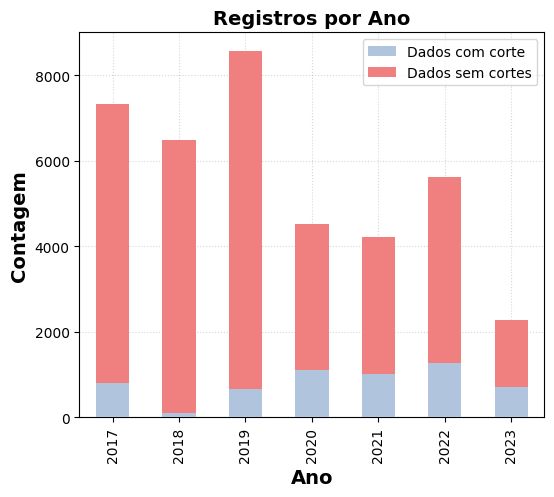

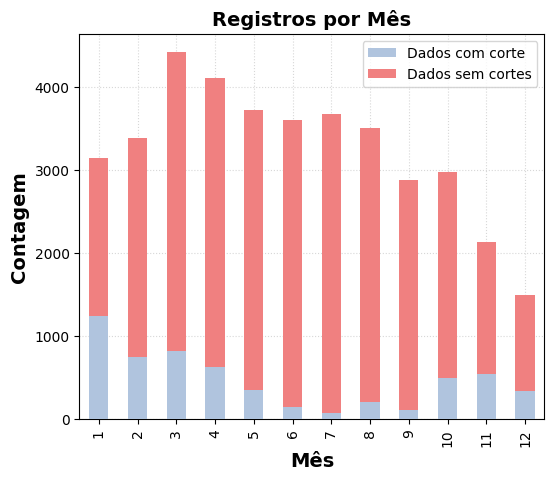

In [ ]:
datas       = pd.to_datetime(dados_sem_outliers.index) # só para ter as datas com acesso mais fácil
datas_old   = pd.to_datetime(dados_old.index)

contagem_ano      = datas.year.value_counts().sort_index()
contagem_ano_old  = datas_old.year.value_counts().sort_index()

plt.figure(figsize=(6, 5))
contagem_ano.plot(kind='bar', color='lightsteelblue', label='Dados com corte', zorder=3)
contagem_ano_old.plot(kind='bar', color='lightcoral', label='Dados sem cortes', zorder=2)
plt.legend()
plt.xlabel('Ano', fontweight='bold', fontsize=14)
plt.ylabel('Contagem', fontweight='bold', fontsize=14)
plt.title('Registros por Ano', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.5, zorder=1, linestyle=':')
#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/comparison_w_wo_cut_year_-_qc_sum_wo_outliers.png', dpi=150)
plt.show()

contagem_mes      = datas.month.value_counts().sort_index()
contagem_mes_old  = datas_old.month.value_counts().sort_index()

plt.figure(figsize=(6, 5))
contagem_mes.plot(kind='bar', color='lightsteelblue', label='Dados com corte', zorder=3)
contagem_mes_old.plot(kind='bar', color='lightcoral', label='Dados sem cortes', zorder=2)
plt.legend()
plt.xlabel('Mês', fontweight='bold', fontsize=14)
plt.ylabel('Contagem', fontweight='bold', fontsize=14)
plt.title('Registros por Mês', fontweight='bold', fontsize=14)
plt.grid(True, alpha=0.5, zorder=1, linestyle=':')
#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/comparison_w_wo_cut_month_-_qc_sum_wo_outliers.png', dpi=150)
plt.show()


De fato, a penalização no ano de 2018 e nos meses de junho a outubro foi bem grande com esses cortes.

Na distribuição por ano, podemos ver que carecemos mais dos dados de 2018, mas talvez não chegue a ser um problema porque a distribuição para os demais anos é razoavelmente equivalente.

A distribuição dos meses que chama um pouco a atenção, uma vez que o período que compreende os meses de junho a setembro apresenta uma baixa.

Por ora, seguiremos assim, mas pode ser interessante retornar a este ponto mais tarde para buscar uma harmonização entre as distribuições de dados nos anos e meses.

In [ ]:
# Verificando o tipo de informação em cada coluna
dados_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5659 entries, 2017-01-03 15:00:00 to 2023-04-21 21:00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mass_BC_PSAP_STP   5659 non-null   float64
 1   Mass_ammonium_STP  5659 non-null   float64
 2   Mass_chloride_STP  5659 non-null   float64
 3   Mass_nitrate_STP   5659 non-null   float64
 4   Mass_organics_STP  5659 non-null   float64
 5   Mass_sulfate_STP   5659 non-null   float64
 6   diam_geom_medio    5659 non-null   float64
 7   conc D<50          5659 non-null   float64
 8   conc D>100         5659 non-null   float64
 9   area               5659 non-null   float64
 10  vol                5659 non-null   float64
 11  Scattering_Eff     5659 non-null   float64
dtypes: float64(12)
memory usage: 574.7 KB


In [ ]:
# verificando se há valores faltantes (NaN)
dadosisna = dados_sem_outliers.isna().sum()
dadosisna

Mass_BC_PSAP_STP     0
Mass_ammonium_STP    0
Mass_chloride_STP    0
Mass_nitrate_STP     0
Mass_organics_STP    0
Mass_sulfate_STP     0
diam_geom_medio      0
conc D<50            0
conc D>100           0
area                 0
vol                  0
Scattering_Eff       0
dtype: int64

As saídas acima parecem coerentes com o tratamento prévio; os outliers que restaram são em soma_Qc, mas não implicam necessidade de exclusão desses dados, pois não há motivos claros para disconfiança em relação a eles, diferentemente dos dados já excluídos.

In [ ]:
# Estatística descritiva básica
dados_sem_outliers.describe()

Mass_BC_PSAP_STP  Mass_ammonium_STP  Mass_chloride_STP  \
count       5659.000000        5659.000000        5659.000000   
mean           0.037165           0.107764           0.002010   
std            0.035954           0.061179           0.005447   
min            0.000985          -0.220109          -0.030028   
25%            0.016108           0.063487          -0.000505   
50%            0.026869           0.107682           0.001900   
75%            0.044801           0.152475           0.004526   
max            0.321580           0.532745           0.034410   

       Mass_nitrate_STP  Mass_organics_STP  Mass_sulfate_STP  diam_geom_medio  \
count       5659.000000        5659.000000       5659.000000      5659.000000   
mean           0.179465           0.522490          0.151105        55.789980   
std            0.136673           0.173688          0.081497        18.752975   
min            0.008770           0.092134          0.004975        18.988360   
25%            0.056134           0.382181          0.092231        41.928135   
50%            0.141237           0.534981          0.135417        53.115010   
75%            0.282391           0.665079          0.194024        68.007119   
max            0.623152           0.941757          0.629101       130.684068   

         conc D<50   conc D>100         area          vol  Scattering_Eff  
count  5659.000000  5659.000000  5659.000000  5659.000000     5659.000000  
mean      0.497718     0.241814    77.304993     2.318137        2.510138  
std       0.188518     0.141558    40.567595     1.397366        0.795605  
min       0.084350     0.007710    16.462445     0.450857        0.117509  
25%       0.351302     0.126181    45.979204     1.268507        1.947145  
50%       0.489944     0.218563    69.213070     1.976909        2.421218  
75%       0.629595     0.338304   101.514092     3.074092        3.015973  
max       0.962079     0.742413   284.045444     9.693169        4.788225

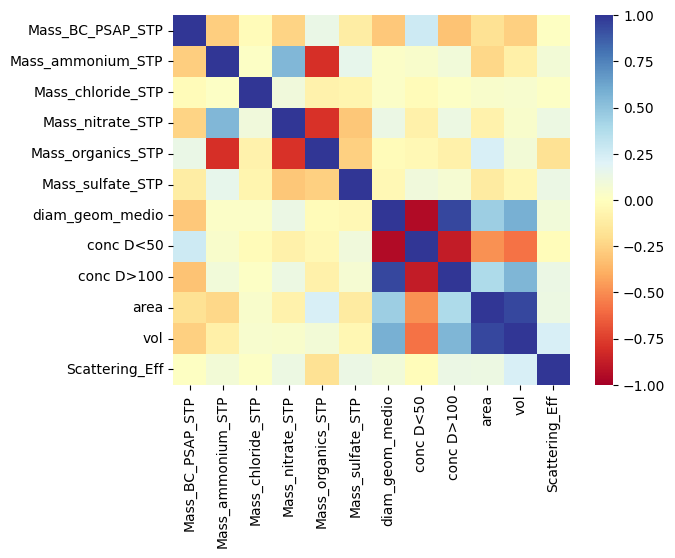

In [ ]:
# Vamos verificar se há correlação com uma matriz de correlação

matriz_corr = dados_sem_outliers.corr().round(2) #Criando a matriz
sns.heatmap(matriz_corr, cmap = 'RdYlBu', vmin=-1, vmax=1); #Fazendo o heatmap

Observam-se correlações entre os preditores. Esse fato será importante no desenvolvimento que segue, pois como tetativa de otimizar a regressão multilinear, por exemplo, serão utilizados apenas os preditores com maior correlação com o alvo dentre cada conjunto de preditores correlacionados.

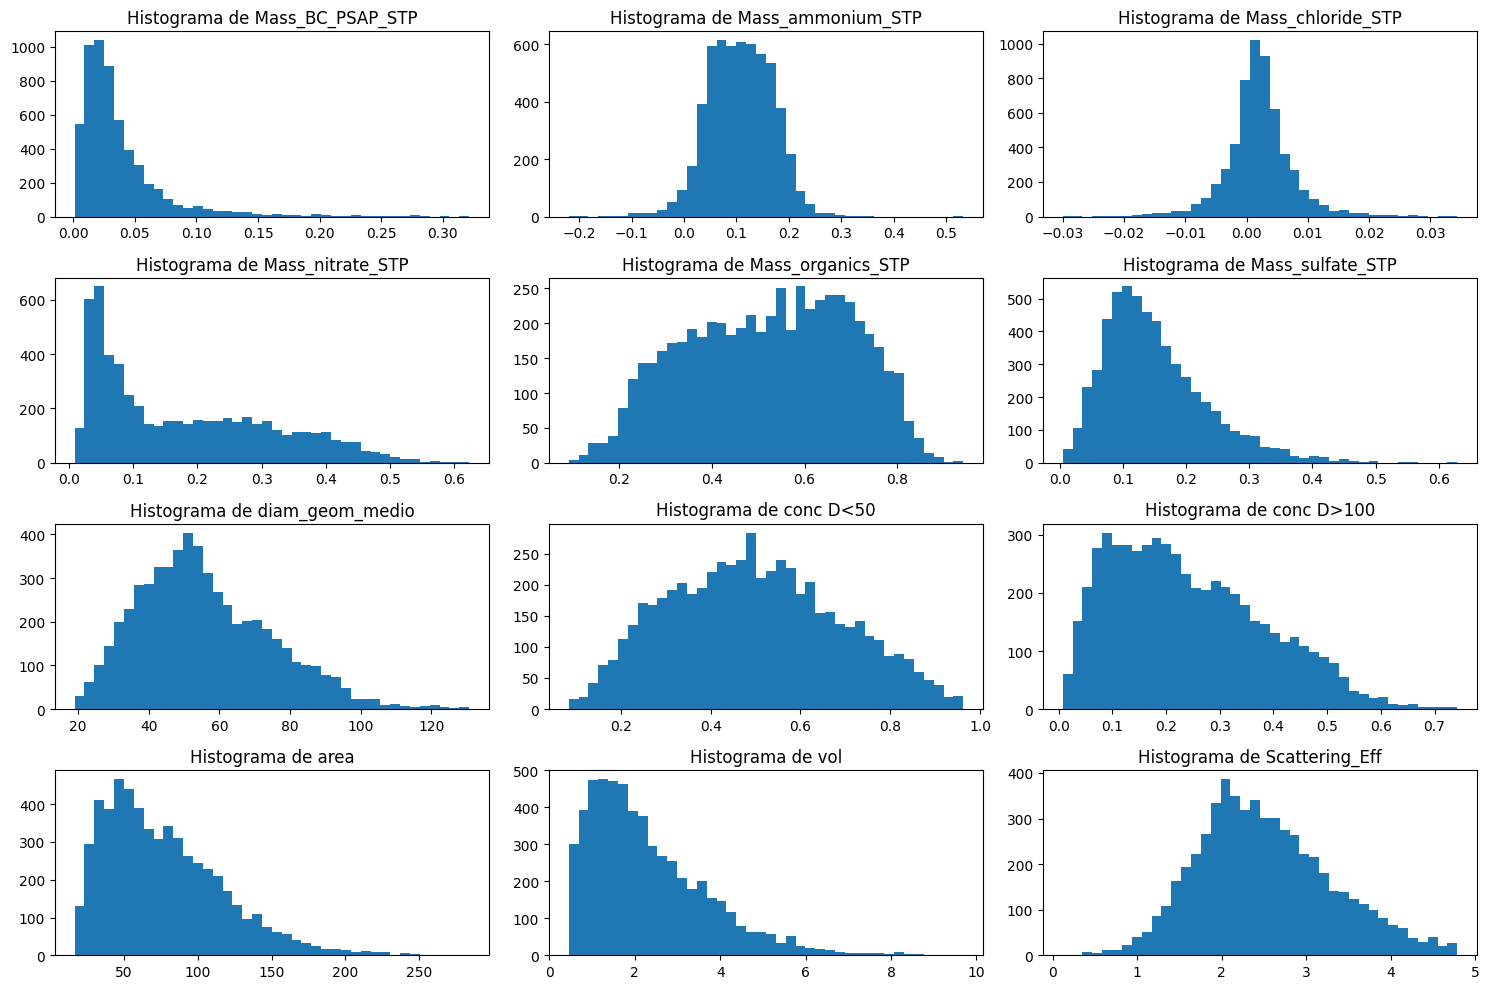

In [ ]:
# Vamos agora fazer os histogramas
# Calculando o número de linhhas necessário com base no número de colunas e colunas por linha
num_cols = len(dados_sem_outliers.columns)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 2.5)) # Ajustando tamanho da figura

# Criando histogramas em cada posição
clm = 0 # Para pegar as colunas
for i in range(num_rows): # Percorrendo linhas
  for j in range(3): # Percorrendo colunas
    if clm < num_cols: # Para controlar a parada
      colu_clm = dados_sem_outliers.columns[clm] # Pegando os dados da coluna
      axs[i, j].hist(dados_sem_outliers[f'{colu_clm}'], bins=40); # Fazendo o histograma na posição
      axs[i, j].set_title(f'Histograma de {colu_clm}') # Título
      clm += 1 # Próxima coluna
    else:
      axs[i, j].axis('off') # Para não fazer vazio quando acabar


plt.tight_layout() # Para melhorar a visualização
plt.show()

Os histogramas revelam que muitas variáveis não parecem apresentar uma distribuição Gaussiana, informação que será útil ao decidir o tipo de escalonamento a ser realizado.

Em seguida, vamos ver as relações dos preditores com o alvo e olhar com mais cuidado para sua distribuição.

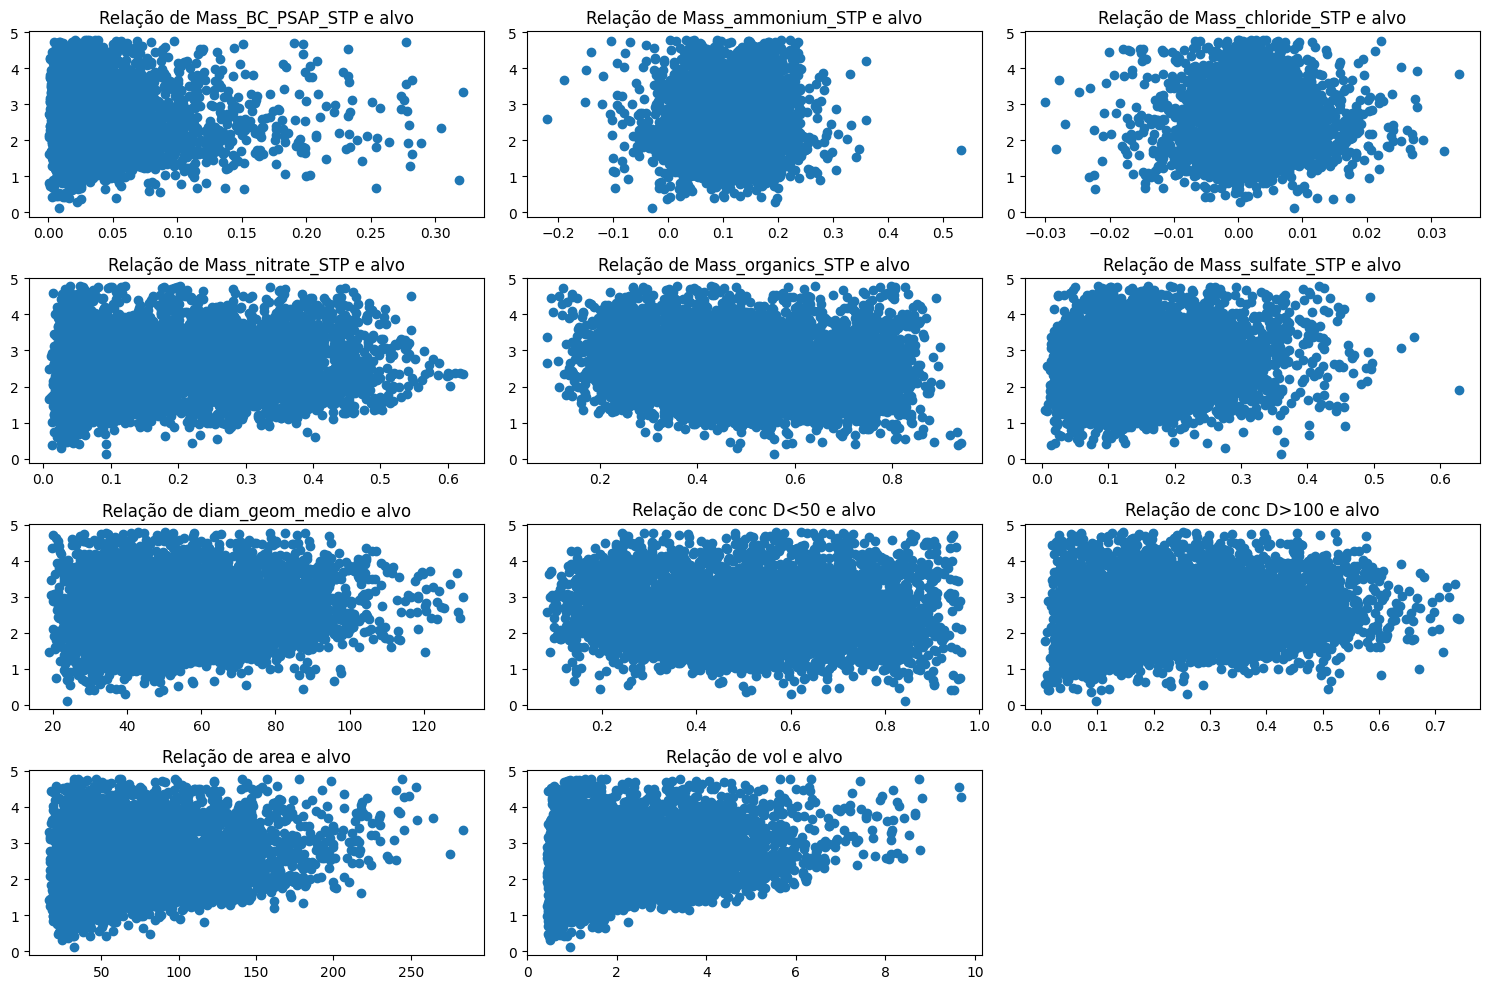

In [ ]:
# Vamos ver como o alvo se relaciona com os preditores - algorítmo análogo ao anterior
num_cols = len(dados_sem_outliers.columns)
num_rows = (num_cols + 2) // 3

fig, axs = plt.subplots(num_rows, 3, figsize=(15, num_rows * 2.5))

# Fazendo os gráficos em cada posição
clm = 0
for i in range(num_rows):
  for j in range(3):
    if clm < num_cols-1:
      colu_clm = dados_sem_outliers.drop(columns = ['Scattering_Eff']).columns[clm]
      axs[i, j].scatter(dados_sem_outliers[f'{colu_clm}'], dados_sem_outliers['Scattering_Eff']);
      axs[i, j].set_title(f'Relação de {colu_clm} e alvo')
      clm += 1
    else:
      axs[i, j].axis('off')


plt.tight_layout()
plt.show()

Não parece haver uma relação puramente linear entre os diferentes preditores e o alvo. Essa informação será importante para interpretar os resultados da regressão multilinear.

Podemos ver abaixo que a distribuição do alvo náo é muito simétrica. Isso nos convida a fazer uma divisão entre treino e teste que leve em conta esse fator, de modo que possa prever bem todas as regiões de valor do alvo. Vamos implementar essa ideia fazendo uma binagem, pois nosso alvo é uma variável contínua, e usamos a binagem para fazer uma divisão estratificada.

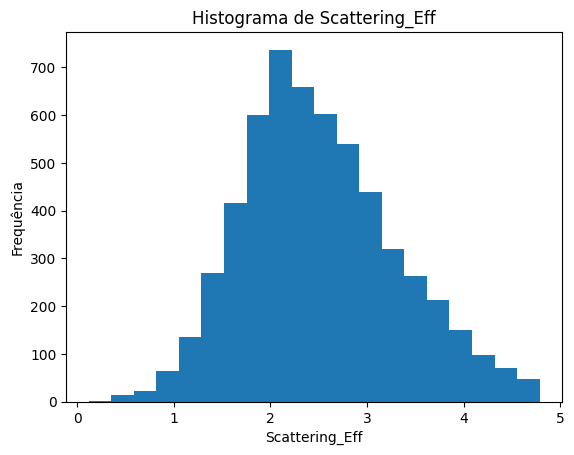

In [ ]:
# Histograma do alvo (para ver melhor)
plt.hist(dados_sem_outliers['Scattering_Eff'], bins=20);
plt.title('Histograma de Scattering_Eff') # Título
plt.xlabel('Scattering_Eff')
plt.ylabel('Frequência')
plt.show()

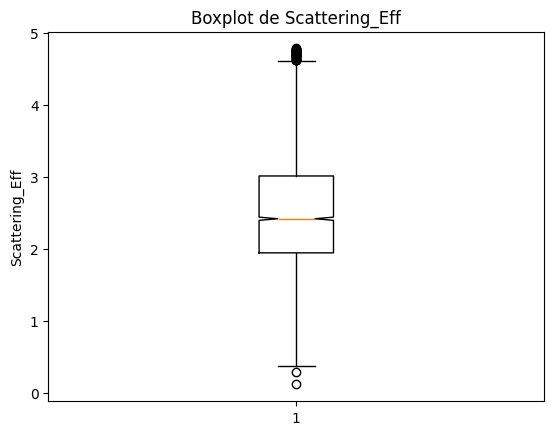

In [ ]:
# Boxplot do alvo
plt.boxplot(dados_sem_outliers['Scattering_Eff'], notch=True)
plt.title('Boxplot de Scattering_Eff') # Título
plt.ylabel('Scattering_Eff')
plt.show()

In [ ]:
# Vamos ver se a distribuição do alvo é mesmo assimétrica
print(dados_sem_outliers['Scattering_Eff'].skew())

0.3945142513728838


Para deixar mais simétrico e fazer a divisão estratificada, vamos primeiro mudar a escala para que os valores do alvo para divisão sejam todos positivos e tomamos log(alvo+1) (somar 1 é para buscar evitar problemas de divergência do log). Assim, podemos fazer os bins com base em ums distribuição com maior simetria.

In [ ]:
# Exemplo: alvo contínuo com valores negativos
y = dados_sem_outliers['Scattering_Eff']  # seu vetor alvo

# Calculamos o shift para deixar os valores do alvo positivos
min_y = y.min()
eps = 1e-6  # pequeno deslocamento de segurança
shift = -min_y + eps  # garante todos positivos

# Aplicando a transformação log(alvo+1) após fazer shift
y_log = np.log1p(y + shift)

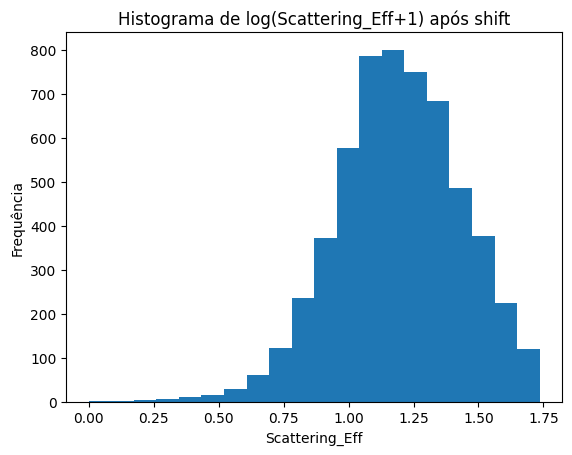

In [ ]:
# Histograma do log(alvo+1) após shift (para ver melhor)
plt.hist((y_log), bins=20);
plt.title('Histograma de log(Scattering_Eff+1) após shift') # Título
plt.xlabel('Scattering_Eff')
plt.ylabel('Frequência')
plt.show()

In [ ]:
print(y_log.skew())

-0.2828861224155483


Abaixo, implementamos a divisão e o escalonamento; a princípio, dividimos em 10 bins, mas planeja-se explorar mais diferentes divisões no futuro. Adotou-se o MinMaxScaler para escalonar tendo em vista que não há uma tendência gaussiana dos preditores para usar StandardScaler por exemplo. Acredita-se que o MinMaxScaler preservará bem as relações internas entre os dados, transformando-os proporcionalmente para cada coluna.

    q  bins_efetivos  min_bin  max_bin  max/min_ratio
0   3              3     1886     1887       1.000530
1   5              5     1131     1132       1.000884
2   7              7      808      809       1.001238
3   9              9      628      629       1.001592
4  11             11      514      515       1.001946
5  13             13      435      436       1.002299
6  15             15      377      378       1.002653
7  17             17      332      333       1.003012
8  19             19      297      298       1.003367

 Melhor valor de q sugerido: 19


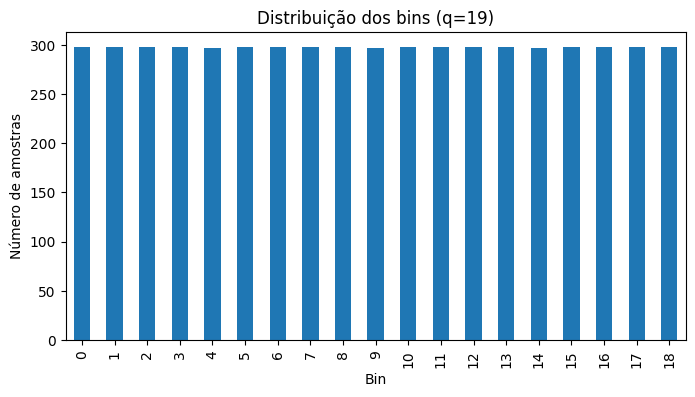


Limites (em escala log):
[9.99999500e-07 8.05807559e-01 8.99233152e-01 9.62335079e-01
 1.01254486e+00 1.04944650e+00 1.08272088e+00 1.11275034e+00
 1.14625723e+00 1.17959065e+00 1.21093757e+00 1.24448520e+00
 1.27914735e+00 1.31481094e+00 1.34923743e+00 1.39023915e+00
 1.43932568e+00 1.50112133e+00 1.57348358e+00 1.73531553e+00]


In [ ]:
# --- Testa até um máximo razoável ---
q_values = np.arange(3, 21, 2)  # de 3 até 20 bins

bin_info = []
for q in q_values:
    y_bins = pd.qcut(y_log, q=q, labels=False, duplicates='drop')
    counts = y_bins.value_counts().sort_index()
    min_bin = counts.min()
    max_bin = counts.max()
    ratio = max_bin / min_bin
    bin_info.append((q, len(counts), min_bin, max_bin, ratio))

bin_df = pd.DataFrame(bin_info, columns=['q', 'bins_efetivos', 'min_bin', 'max_bin', 'max/min_ratio'])
print(bin_df)

# --- Escolhe q mais alto ainda bem balanceado ---
ideal_bins = bin_df.loc[bin_df['max/min_ratio'] < 1.8, 'q']
if not ideal_bins.empty:
    melhor_q = int(ideal_bins.iloc[-1])
else:
    melhor_q = int(bin_df.iloc[0]['q'])

print(f"\n Melhor valor de q sugerido: {melhor_q}")

# --- Visualiza bins ---
y_bins = pd.qcut(y_log, q=melhor_q, labels=False, duplicates='drop')
plt.figure(figsize=(8, 4))
y_bins.value_counts().sort_index().plot(kind='bar')
plt.title(f"Distribuição dos bins (q={melhor_q})")
plt.xlabel("Bin")
plt.ylabel("Número de amostras")
plt.show()

# --- Inspeciona limites dos bins ---
bin_edges = pd.qcut(y_log, q=melhor_q, retbins=True, labels=False)[1]
print("\nLimites (em escala log):")
print(bin_edges)

### Atalho Matias


In [ ]:
from sklearn.model_selection import train_test_split

# Separação de variáveis preditoras e alvo
X = dados_sem_outliers.drop(['Scattering_Eff'], axis=1) # Características
y = dados_sem_outliers['Scattering_Eff'] # Alvo

y_bins = pd.qcut(y_log, q=25, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y_bins)

In [ ]:
# Verifica quantos bins foram usados e se estão equilibrados
print(f"Bins usados: {len(np.unique(y_bins))}")
print(pd.Series(y_bins).value_counts().sort_index())

Bins usados: 25
Scattering_Eff
0     227
1     226
2     226
3     227
4     226
5     226
6     227
7     226
8     226
9     227
10    226
11    226
12    227
13    226
14    226
15    227
16    226
17    226
18    227
19    226
20    226
21    227
22    226
23    226
24    227
Name: count, dtype: int64


In [ ]:
# Escalonando os preditores X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

Abaixo, selecionamos os preditores com base na correlação, conforme proposto anteriormente, para otimizar a regressão multilinear mais tarde.

In [ ]:
# Vamos aqui pegar o principal representante de cada conjunto de preditores correlacionados
# Elegemos o principal com base nas correlações com o alvo
# Utilizamos só o conjunto de treino do alvo para isso para evitar vazamento de dados
correlation_threshold = 0.9  # valor de corte para correlação entre preditores

# Voltando para DataFrame para calcular a matriz de correlação
X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_s  = pd.DataFrame(X_test_s,  columns=X_test.columns)

# Matriz de correlação entre preditores (treino)
corr_matrix = X_train_s.corr().abs()

# Correlação de cada preditor com o alvo
# Função para calcular a correlação de uma coluna com o alvo
def correlacao_com_y(coluna):
    """
    Retorna o coeficiente de correlação de Pearson entre uma coluna (preditora)
    e o vetor de saída y_train.
    """
    return np.corrcoef(coluna, y_train)[0, 1]

# Aplicar a função a cada coluna de X_train_s
corr_with_target = X_train_s.apply(correlacao_com_y).abs()

# Criar um conjunto para armazenar as colunas a remover
to_drop = set()

# Percorrer as colunas e remover uma de cada par correlacionado
for col in corr_matrix.columns:
    if col in to_drop:
        continue
    # Achar colunas altamente correlacionadas com a atual
    high_corr = corr_matrix.index[(corr_matrix[col] > correlation_threshold) & (corr_matrix.index != col)]
    for correlated_col in high_corr:
        # Comparar correlação com y e decidir qual manter
        if corr_with_target[col] >= corr_with_target[correlated_col]:
            to_drop.add(correlated_col)
        else:
            to_drop.add(col)

# Criar os novos DataFrames reduzidos (mantendo coerência entre treino e teste)
X_train_s_reduced = X_train_s.drop(columns=to_drop)
X_test_s_reduced = X_test_s.drop(columns=to_drop)

# Relatório final
print(f"Número de preditores iniciais: {X_train_s.shape[1]}")
print(f"Número de preditores removidos: {len(to_drop)}")
print(f"Número de preditores restantes: {X_train_s_reduced.shape[1]}")
print(f"Colunas removidas: {sorted(to_drop)}")

Número de preditores iniciais: 11
Número de preditores removidos: 3
Número de preditores restantes: 8
Colunas removidas: ['area', 'conc D<50', 'diam_geom_medio']


# Regressão Multilinear sem regularização

Agora que já exploramos um pouco do comportamento geral dos dados e os tratamos, retirando outliers com base no Quality Check, dividindo entre treino e teste e então os escalonando, vamos como primeira abordagem implementar uma Regressão Multilinear para tentar predizer o valor do alvo. Inicialmente, utilizamos todos os preditores selecionados em nosso tratamento anterior; em seguida, tendo observado que tais preditores estão correlacionados com a matriz de correlação apresentada e sabendo que tal correlação pode prejudicar o desempenho da regressão multilinear, utilizamos apenas os preditores que são "representantes de cada classe de correlação" isto é, preditores selecionados dentre cada conjunto de preditores correlacionados, a partir de sua correlação com o alvo, o que foi feito anteriormente. Fazemos isso numa tentativa de otimizar o desempenho dessa regressão e também de melhorar a interpretabilidade dos resultados (pois serão menos preditores).

In [ ]:
# Modelo com todos os preditores sem regularização e sem otimização

from sklearn import linear_model
regr = linear_model.LinearRegression() # Criando o regressor
regr.fit(X_train_s, y_train) # Teinando o regressor

y_pred_train = regr.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = regr.predict(X_test_s) # predição para o conjunto de teste

print('Intercepto:', regr.intercept_)
print('Coeficientes:', regr.coef_)
print('R^2 = ', regr.score(X_train_s, y_train)) # Determinando R^2

Intercepto: 1.4950098647059833
Coeficientes: [ 0.675473    0.12436566  0.34136821  1.174401   -0.09900149  1.28519591
  0.0081039   0.51175196 -0.2718546  -4.8769558   7.23827182]
R^2 =  0.22983681398634082


In [ ]:
# Vamos ver o desempenho
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão linear múltipla sem regularização e com todos os preditores')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão linear múltipla sem regularização e com todos os preditores
Desempenho no conjunto de treino
R^2 =  0.22983681398634082
MSE =  0.487192204546176
MAE =  0.560586061517198
Desempenho no conjunto de teste
R^2 =  0.19358376521351228
MSE =  0.5113008417536572
MAE =  0.57090258106672


Calulamos também o R^2 ajustado para levar em consideração a quantidade de parâmetros.

In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.2280
R² Ajustado Teste : 0.1857


In [ ]:
# Modelo com todos os preditores - statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_s) # adicionar uma coluna constante para o statsmodels ajustar um itercepto
mod = sm.OLS(y_train.reset_index(drop=True), X_train_sm) # ajustar o modelo
regsm = mod.fit()
print(regsm.summary())

                            OLS Regression Results                            
Dep. Variable:         Scattering_Eff   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     122.5
Date:                Sun, 23 Nov 2025   Prob (F-statistic):          2.92e-246
Time:                        04:05:45   Log-Likelihood:                -4795.9
No. Observations:                4527   AIC:                             9616.
Df Residuals:                    4515   BIC:                             9693.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.4950      0.23

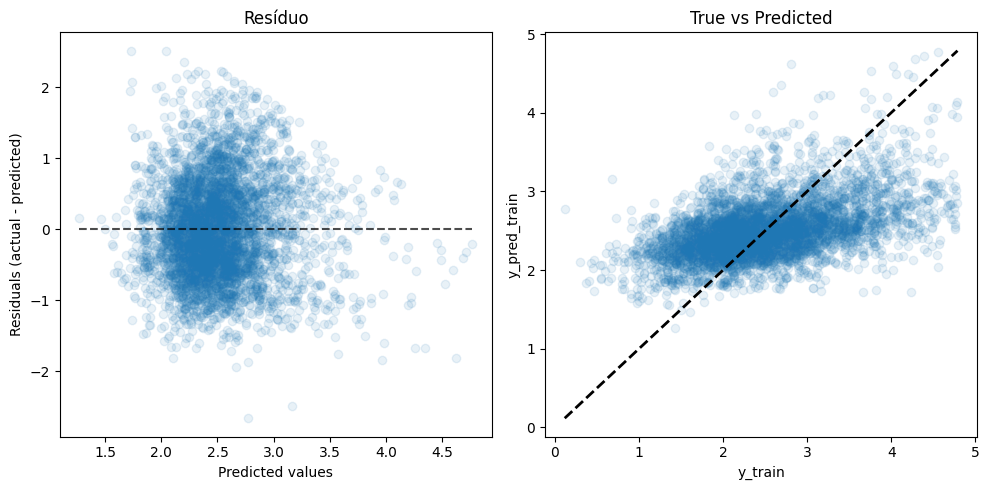

In [ ]:
# Gráfico dos resíduos para o conjunto de treinamento - todos os preditores
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plotresid = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred_train)
plotresid.plot(ax=ax[0], scatter_kwargs={'alpha': 0.1}) # Plot on the first axes
ax[0].set_title('Resíduo')

ax[1].scatter(y_train, y_pred_train, alpha=.1)
ax[1].set_xlabel('y_train')
ax[1].set_ylabel('y_pred_train')
ax[1].set_title('True vs Predicted')
# Add a 1:1 dashed line
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

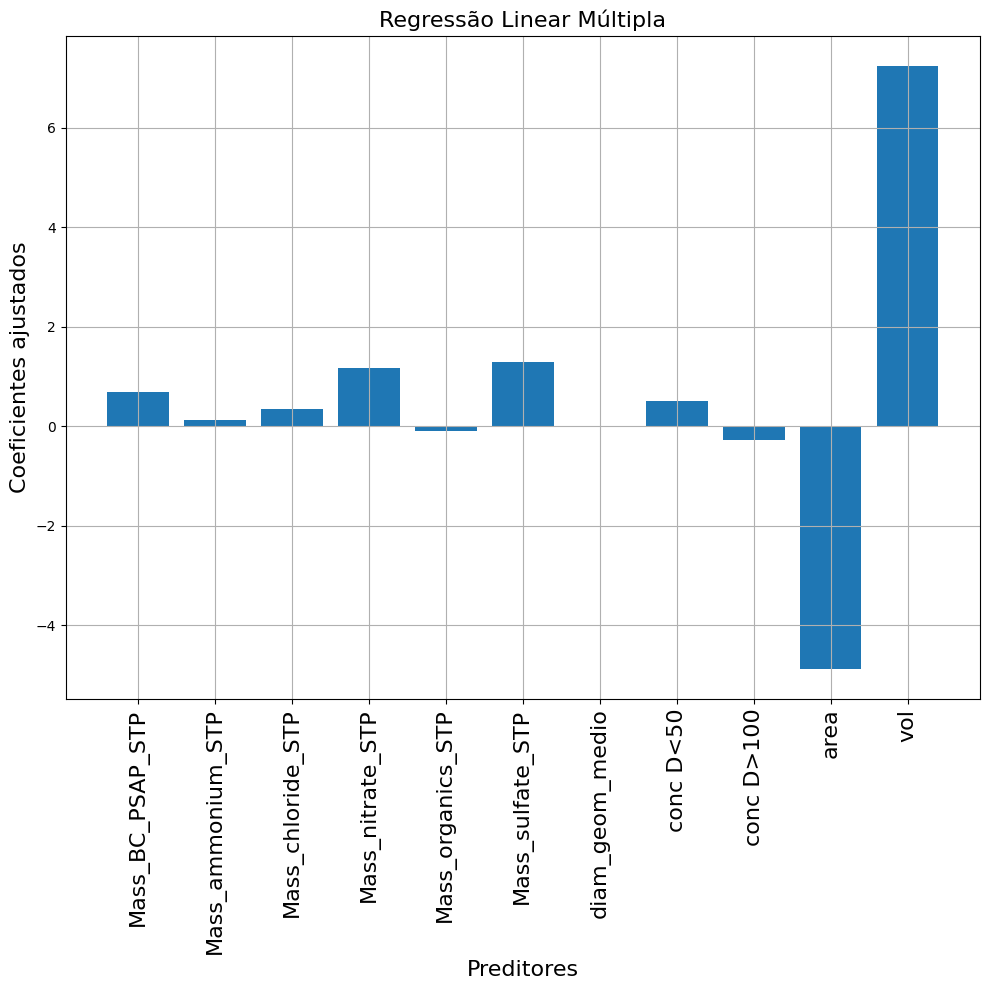

In [ ]:
# Gráfico dos coeficientes ajustados
nomes = X_train_s.columns
coef = regr.coef_
fig, ax = plt.subplots(figsize=(10, 10)) # Create figure and axes with desired size
ax.bar(np.arange(len(coef)), coef)
ax.set_xticks(np.arange(len(coef))) # Set the tick locations on the axes
ax.set_xticklabels(nomes, rotation=90, fontsize=16) # Set the tick labels and rotate on the axes
ax.set_xlabel("Preditores", fontsize=16)
ax.set_ylabel("Coeficientes ajustados", fontsize=16)
ax.set_title("Regressão Linear Múltipla", fontsize=16)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.grid()
plt.show()

As métricas indicam que o desempenho do modelo não foi muito satsfatório. O R^2 (e R^2 ajustado) não estão muito altos nem no treino, nem no teste; isso indica que o modelo não está descrevendo muito bem os dados. O MSE e MAE relativamente altos apontam que ainda pode haver outliers na previsão. Os gráficos de resíduos e de verdadeiro vs predito também revelam um problema do modelo, especialmente na predição para valores mais altos do alvo. A saída do statsmodels indica que há forte multicolinearidade, o que faz sentido considerando que vimos que há preditores que são correlacionados, e o próximo passo é buscar otimizar a regressão utilizando o conjunto de preditores selecionados a partir da correlação com o alvo. De fato, os preditores mais importantes foram área e volume, que têm uma correlação forte, como pode ser visto abaixo.

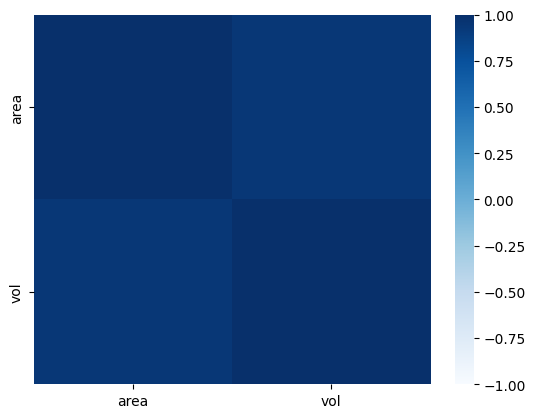

In [ ]:
# Matriz de correlação entre os dois maiores preditores acima

matriz_corr = dados_sem_outliers[["area","vol"]].corr().round(2) #Criando a matriz
sns.heatmap(matriz_corr, cmap = 'Blues', vmin=-1, vmax=1); #Fazendo o heatmap

# Regressão Multilinear sem reguarização - Preditores selecionados

Vamos proceder como acima, agora, contudo, com os preditores selecionados a partir da correlação, em uma tentativa de melhorar o desempenho da regressão.

In [ ]:
# Modelo preditores não muito correlacionados e sem regularização

from sklearn import linear_model
regr = linear_model.LinearRegression() # Criando o regressor
regr.fit(X_train_s_reduced, y_train) # Teinando o regressor

y_pred_train = regr.predict(X_train_s_reduced) # predição para o conjunto de treino
y_pred_test = regr.predict(X_test_s_reduced) # predição para o conjunto de teste

print('Intercepto:', regr.intercept_)
print('Coeficientes:', regr.coef_)
print('R^2 = ', regr.score(X_train_s_reduced, y_train)) # Determinando R^2

Intercepto: 1.1172852475316084
Coeficientes: [ 0.82797713  0.71680481  0.42295336  1.81067364 -0.55189986  2.06465968
 -0.02580046  2.34202796]
R^2 =  0.15018120767798782


In [ ]:
# Vamos ver o desempenho
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão linear múltipla sem regularização e com preditores selecionados')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão linear múltipla sem regularização e com preditores selecionados
Desempenho no conjunto de treino
R^2 =  0.15018120767798782
MSE =  0.5375809937619987
MAE =  0.5934301020562049
Desempenho no conjunto de teste
R^2 =  0.13891027468522832
MSE =  0.5459660686214219
MAE =  0.5965555052313025


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.1481
R² Ajustado Teste : 0.1305


In [ ]:
# Modelo preditores selecionados - statsmodels
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_s_reduced.reset_index(drop=True)) # adicionar uma coluna constante para o statsmodels ajustar um itercepto
mod = sm.OLS(y_train.reset_index(drop=True), X_train_sm) # ajustar o modelo
regsm = mod.fit()
print(regsm.summary())

                            OLS Regression Results                            
Dep. Variable:         Scattering_Eff   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     99.80
Date:                Sat, 22 Nov 2025   Prob (F-statistic):          1.47e-153
Time:                        22:55:55   Log-Likelihood:                -5018.6
No. Observations:                4527   AIC:                         1.006e+04
Df Residuals:                    4518   BIC:                         1.011e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.1173      0.20

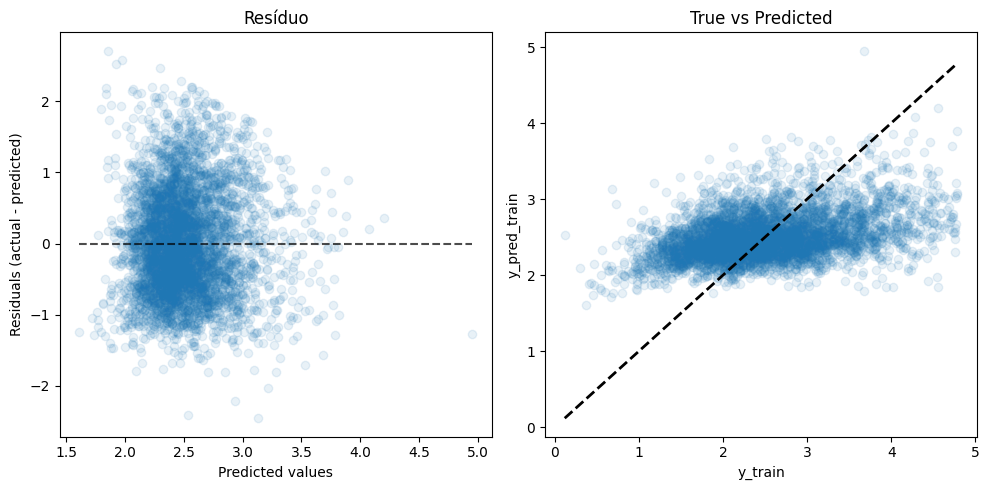

In [ ]:
# Gráfico dos resíduos para o conjunto de treinamento - preditores otimizados
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plotresid = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred_train)
plotresid.plot(ax=ax[0], scatter_kwargs={'alpha': 0.1}) # Plot on the first axes
ax[0].set_title('Resíduo')

ax[1].scatter(y_train, y_pred_train, alpha=.1)
ax[1].set_xlabel('y_train')
ax[1].set_ylabel('y_pred_train')
ax[1].set_title('True vs Predicted')
# Add a 1:1 dashed line
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

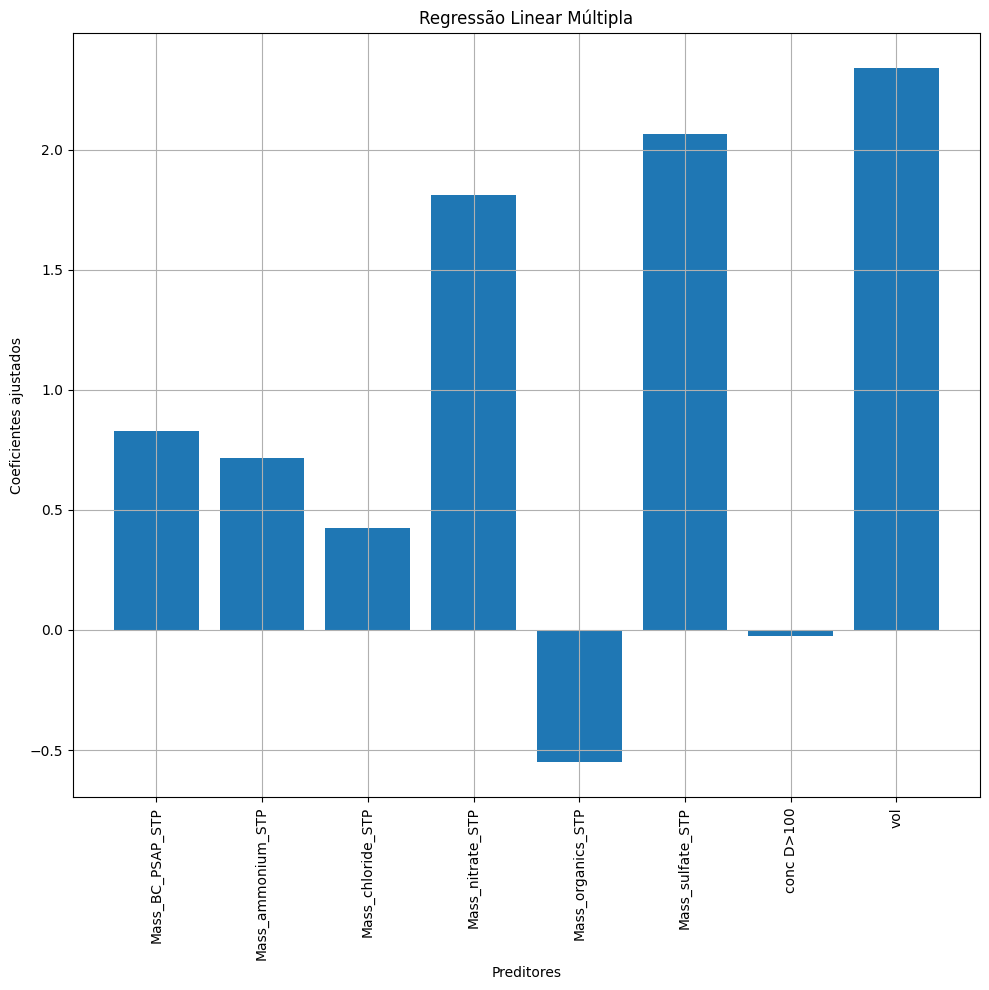

In [ ]:
# Gráfico dos coeficientes ajustados
nomes = X_train_s_reduced.columns # Use the columns from the reduced dataset
coef = regr.coef_
fig, ax = plt.subplots(figsize=(10, 10)) # Create figure and axes with desired size
ax.bar(np.arange(len(coef)), coef)
ax.set_xticks(np.arange(len(coef))) # Set the tick locations on the axes
ax.set_xticklabels(nomes, rotation=90) # Set the tick labels and rotate on the axes
ax.set_xlabel("Preditores")
ax.set_ylabel("Coeficientes ajustados")
ax.set_title("Regressão Linear Múltipla")
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.grid()
plt.show()

Apesar da tentativa de melhorar o desempenho, aparentemente ele não mudou muito em relação à regressão anterior, mas pode inclusive ter piorado levemente. O R^2 (e R^2 ajustado) ainda não estão muito altos nem no treino, nem no teste, e as outras métricas (e sua interpretação, presença de outliers) não mudaram muito também. Os gráficos ainda podem ser interpretados de modo semelhante ao anterior, e ressalta-se que o modelo não parece descrever bem valores altos do alvo. A saída do statsmodels já não indica mais multicolinearidade, como esperado. Concluímos que talvez a Regresão Multilinear não seja a melhor regressão para essa predição; essa crença é sustentada pelas relações não lineares que pudemos observar no ScatterPlot dos preditores com o alvo, furando um dos pressupostos dessa regressão.

Por completude, em seguida implementamos uma regressão Lasso e uma Ridge com os preditores selecionados. É só uma ilustração de que não há ganhos, então os corficientes *alfa* não serão otimizados a princípio. Adotar-se-á como principal referência da regressão multilinear a feita acima, com os preditores selecionados e sem regularização, pois acredita-se que os benefício que Lasso ou Ridge trariam seria num contexto de mais preditores e com multicolinearidade, mas já  tratamos isso selecionando os preditores a partir da correlação.

# Exemplo: Regressão com Regularização - Lasso

In [ ]:
# Aplicando Lasso
from sklearn.linear_model import Lasso
a = 0.005
lassoReg = Lasso(alpha=a)
lassoReg.fit(X_train_s_reduced, y_train)
y_pred_train = lassoReg.predict(X_train_s_reduced) # predição para o conjunto de treino
y_pred_test = lassoReg.predict(X_test_s_reduced) # predição para o conjunto de teste

print('Intercepto:', lassoReg.intercept_)
nomes = X.columns
print(nomes)
print('Coeficientes:', lassoReg.coef_)
print('R^2 = ', lassoReg.score(X_train_s_reduced,y_train))


Intercepto: 1.9823676791365625
Index(['Mass_BC_PSAP_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
       'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP',
       'diam_geom_medio', 'conc D<50', 'conc D>100', 'area', 'vol'],
      dtype='object')
Coeficientes: [ 0.          0.          0.          1.08801053 -0.          1.0763015
  0.          1.61814119]
R^2 =  0.12338509212207271


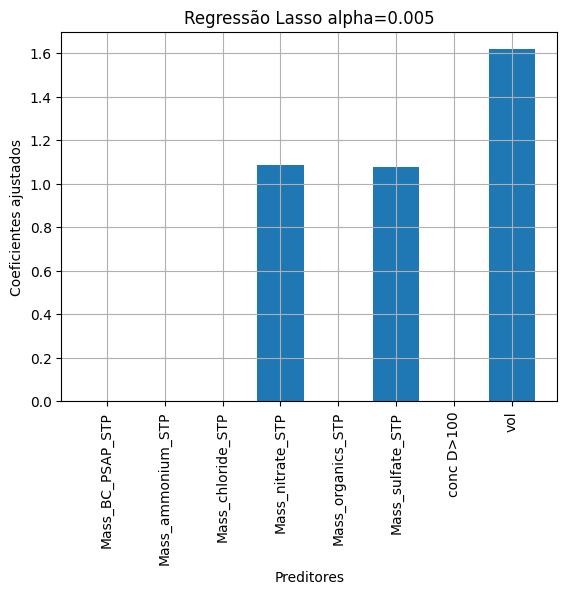

In [ ]:
# Gráfico dos coeficientes ajustados
nomes = X_train_s_reduced.columns
coef = lassoReg.coef_
ax = plt.bar(np.arange(len(coef)), coef)
plt.xticks(ticks=np.arange(len(coef)), labels=nomes, rotation=90)
plt.grid()
plt.xlabel("Preditores")
plt.ylabel("Coeficientes ajustados")
plt.title(f"Regressão Lasso alpha={a}")
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Lasso')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))


Regressão Lasso
Desempenho no conjunto de treino
R^2 =  0.12338509212207271
MSE =  0.5545317632197443
MAE =  0.6027874460679403
Desempenho no conjunto de teste
R^2 =  0.11200087501363298
MSE =  0.5630277274889609
MAE =  0.6067536684178514


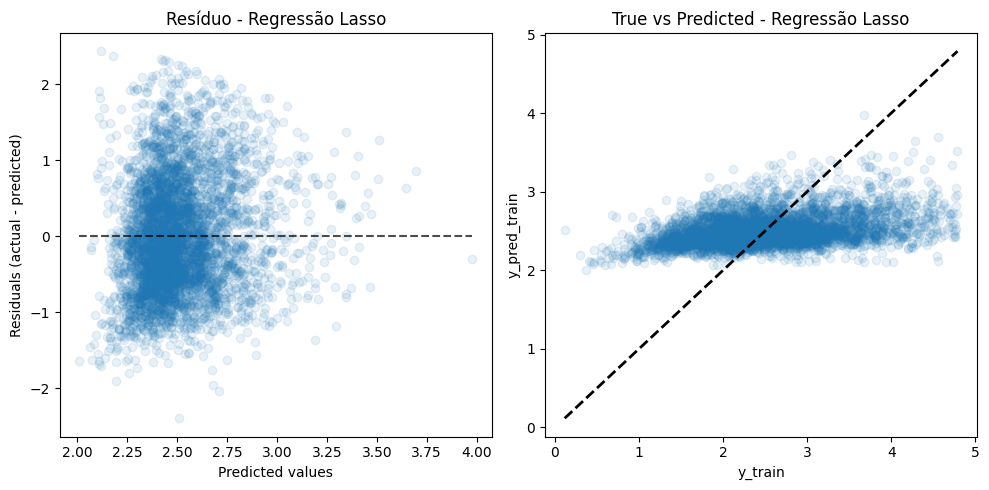

In [ ]:
# Gráfico dos resíduos para o conjunto de treinamento
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plotresid = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred_train)
plotresid.plot(ax=ax[0], scatter_kwargs={'alpha': 0.1})
ax[0].set_title('Resíduo - Regressão Lasso')

ax[1].scatter(y_train, y_pred_train, alpha=.1)
ax[1].set_xlabel('y_train')
ax[1].set_ylabel('y_pred_train')
ax[1].set_title('True vs Predicted - Regressão Lasso')
# Add a 1:1 dashed line
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()


Pode-se ver que, de fato, não houve muitos ganhos, mas inclusive os problemas observados anteriormente podem ter sido agravados (pelo menos para o valor de alfa utilizado).

# Exemplo: Regressão com Regularização - Ridge

In [ ]:
# Aplicando Ridge
from sklearn.linear_model import Ridge
a = 0.75
ridgeReg = Ridge(alpha=a)
ridgeReg.fit(X_train_s_reduced,y_train)

y_pred_train = ridgeReg.predict(X_train_s_reduced) # predição para o conjunto de treino
y_pred_test = ridgeReg.predict(X_test_s_reduced) # predição para o conjunto de teste

print('Intercepto:', ridgeReg.intercept_)
nomes = X.columns
print(nomes)
print('Coeficientes:', ridgeReg.coef_)
print('R^2 = ', ridgeReg.score(X_train_s_reduced,y_train))


Intercepto: 1.1709705245681905
Index(['Mass_BC_PSAP_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
       'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP',
       'diam_geom_medio', 'conc D<50', 'conc D>100', 'area', 'vol'],
      dtype='object')
Coeficientes: [ 0.7852316   0.69008785  0.38270367  1.76275558 -0.52212708  1.99313271
 -0.01325669  2.28476728]
R^2 =  0.15006571686677783


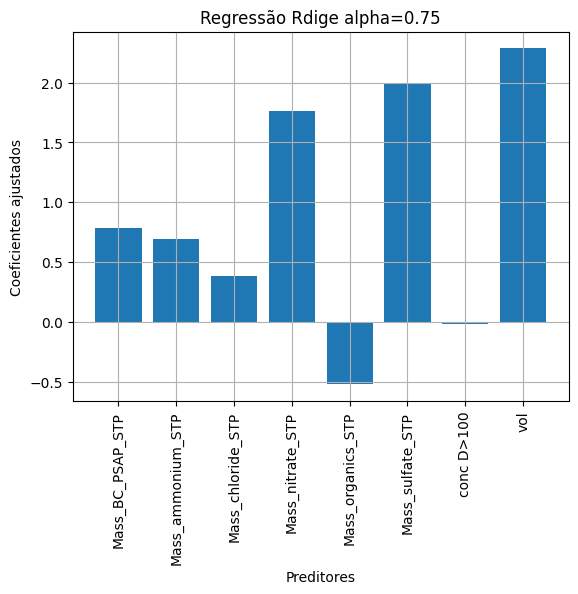

In [ ]:
# Gráfico dos coeficientes ajustados
nomes = X_train_s_reduced.columns
coef = ridgeReg.coef_
ax = plt.bar(np.arange(len(coef)), coef)
plt.xticks(ticks=np.arange(len(coef)), labels=nomes, rotation=90)
plt.grid()
plt.xlabel("Preditores")
plt.ylabel("Coeficientes ajustados")
plt.title(f"Regressão Rdige alpha={a}")
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Ridge')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))


Regressão Ridge
Desempenho no conjunto de treino
R^2 =  0.15006571686677783
MSE =  0.5376540512957008
MAE =  0.593534610571152
Desempenho no conjunto de teste
R^2 =  0.13910910572602397
MSE =  0.5458400016176339
MAE =  0.5966276796093506


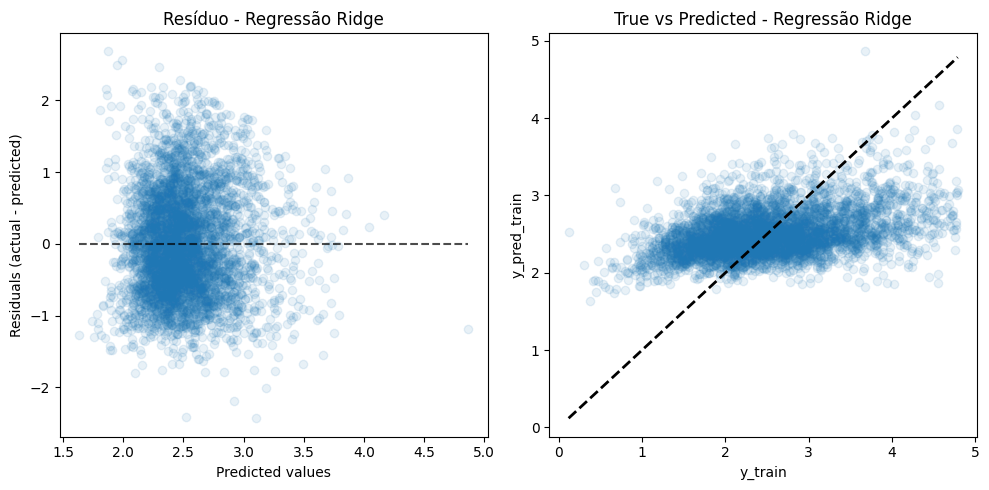

In [ ]:
# Gráfico dos resíduos para o conjunto de treinamento
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

plotresid = PredictionErrorDisplay(y_true=y_train, y_pred=y_pred_train)
plotresid.plot(ax=ax[0], scatter_kwargs={'alpha': 0.1})
ax[0].set_title('Resíduo - Regressão Ridge')

ax[1].scatter(y_train, y_pred_train, alpha=.1)
ax[1].set_xlabel('y_train')
ax[1].set_ylabel('y_pred_train')
ax[1].set_title('True vs Predicted - Regressão Ridge')
# Add a 1:1 dashed line
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.tight_layout()
plt.show()


Novamente, não houve muitos ganhos, e os problemas observados anteriormente podem ter sido agravados (com o valor de alfa utilizado no exemplo).

# RandomForest com todos os preditores e crescimento livre

O primeiro método mais robusto de regressão utilizado foi o Random Forest (RF). A seguir é apresentado o desempenho do RF utilizando todos os preditores e com crescimento livre. A quantidade de árvores utilizadas foram 200, o número mínimo de amostras para cada divisão de um nó escolhido foi 3 e foi utilizado o out-of-bag score.   

In [ ]:
from sklearn.model_selection import train_test_split

# Separação de variáveis preditoras e alvo
X = dados_sem_outliers.drop(['Scattering_Eff'], axis=1) # Características
y = dados_sem_outliers['Scattering_Eff'] # Alvo

y_bins = pd.qcut(y_log, q=25, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y_bins)

In [ ]:
# Escalonando os preditores X
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

In [ ]:
# Sem otimização de hiperparâmetros e com todos os preditores
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_estimators=500, min_samples_split=5,min_samples_leaf= 5,max_depth=25, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest sem otimização')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest sem otimização
Desempenho no conjunto de treino
R^2 =  0.7800502171163534
MSE =  0.1391365123113481
RMSE = 0.3730100699865194
MAE =  0.2837910306835162
Desempenho no conjunto de teste
R^2 =  0.40319074993380233
MSE =  0.378401449229267
RMSE = 0.6151434379307537
MAE =  0.47284109379516376
------------------------------------
OOB score: 0.43182766195907196


Calculo do $R^2$ ajustado para levar em consideração a quantidade de parâmetros.

In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.7795
R² Ajustado Teste : 0.3973


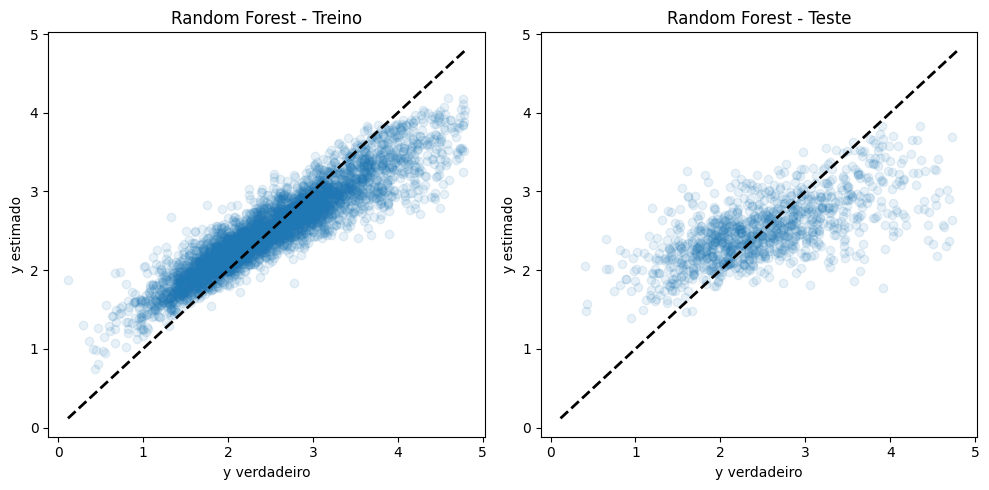

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha = 0.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha = 0.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

Nota-se, pelos gráficos, que o modelo subestima os valores reais da variável alvo que estão em faixas mais elevadas. Possivelmente, isso é devido ao baixo número de valores da variável alvo nessas faixas mais elevadas na amostra.

In [ ]:
nomes

Index(['Mass_BC_PSAP_STP', 'Mass_ammonium_STP', 'Mass_chloride_STP',
       'Mass_nitrate_STP', 'Mass_organics_STP', 'Mass_sulfate_STP',
       'conc D>100', 'vol'],
      dtype='object')

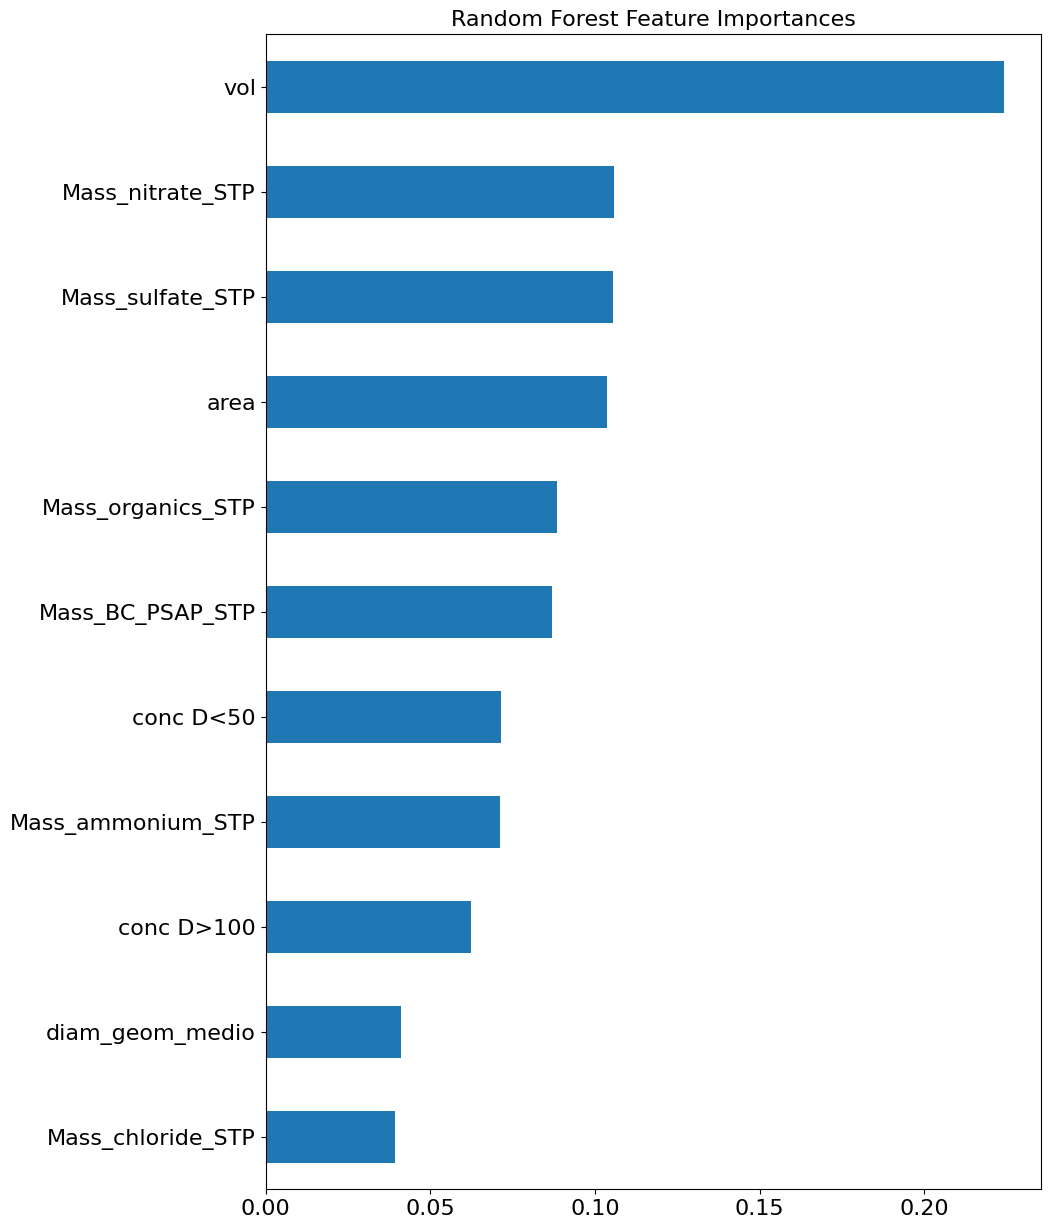

In [ ]:
importances = rf.feature_importances_
nomes = dados_finais.drop(columns=["Scattering_Eff", "soma_Qc"]).columns
pd.Series(importances, index=nomes).sort_values().plot.barh(figsize = (10,15), fontsize=16)
plt.title("Random Forest Feature Importances", fontsize=16)
plt.show()

In [ ]:
# SHAP (SHapley Additive exPlanations)
# Valor absoluto SHAP: indica a importância de cada preditor
# Sinal do SHAP: indica se o preditor contribui para aumento ou diminuição da variável alvo
# Cor: indica como cada preditor influencia no valor da variável alvo
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=nomes)

A seguir será realizada uma seleção de alguns preditores que serão utilizados no RF.

In [ ]:
# Vamos aqui pegar o principal representante de cada conjunto de preditores correlacionados
# Elegemos o principal com base nas correlações com o alvo
# Utilizamos só o conjunto de treino do alvo para isso para evitar vazamento de dados
correlation_threshold = 0.9  # valor de corte para correlação entre preditores

# Voltando para DataFrame para calcular a matriz de correlação
X_train_s = pd.DataFrame(X_train_s, columns=X_train.columns)
X_test_s  = pd.DataFrame(X_test_s,  columns=X_test.columns)

# Matriz de correlação entre preditores (treino)
corr_matrix = X_train_s.corr().abs()

# Correlação de cada preditor com o alvo
# Função para calcular a correlação de uma coluna com o alvo
def correlacao_com_y(coluna):
    """
    Retorna o coeficiente de correlação de Pearson entre uma coluna (preditora)
    e o vetor de saída y_train.
    """
    return np.corrcoef(coluna, y_train)[0, 1]

# Aplicar a função a cada coluna de X_train_s
corr_with_target = X_train_s.apply(correlacao_com_y).abs()

# Criar um conjunto para armazenar as colunas a remover
to_drop = set()

# Percorrer as colunas e remover uma de cada par correlacionado
for col in corr_matrix.columns:
    if col in to_drop:
        continue
    # Achar colunas altamente correlacionadas com a atual
    high_corr = corr_matrix.index[(corr_matrix[col] > correlation_threshold) & (corr_matrix.index != col)]
    for correlated_col in high_corr:
        # Comparar correlação com y e decidir qual manter
        if corr_with_target[col] >= corr_with_target[correlated_col]:
            to_drop.add(correlated_col)
        else:
            to_drop.add(col)

# Criar os novos DataFrames reduzidos (mantendo coerência entre treino e teste)
X_train_s_reduced = X_train_s.drop(columns=to_drop)
X_test_s_reduced = X_test_s.drop(columns=to_drop)

# Relatório final
print(f"Número de preditores iniciais: {X_train_s.shape[1]}")
print(f"Número de preditores removidos: {len(to_drop)}")
print(f"Número de preditores restantes: {X_train_s_reduced.shape[1]}")
print(f"Colunas removidas: {sorted(to_drop)}")

Número de preditores iniciais: 11
Número de preditores removidos: 3
Número de preditores restantes: 8
Colunas removidas: ['area', 'conc D<50', 'diam_geom_medio']


In [ ]:
dados_finais.corr()

Mass_BC_PSAP_STP  Mass_ammonium_STP  Mass_chloride_STP  \
Mass_BC_PSAP_STP           1.000000           0.097018           0.012444   
Mass_ammonium_STP          0.097018           1.000000          -0.011381   
Mass_chloride_STP          0.012444          -0.011381           1.000000   
Mass_nitrate_STP           0.166898           0.411528           0.078743   
Mass_organics_STP          0.620158           0.140019           0.007067   
Mass_sulfate_STP           0.413992           0.387148          -0.066097   
soma_Qc                    0.313858           0.191954           0.012775   
diam_geom_medio           -0.297319          -0.257179          -0.030685   
conc D<50                  0.314095           0.306777           0.030467   
conc D>100                -0.307685          -0.208745          -0.040833   
area                      -0.282440          -0.467980          -0.038660   
vol                       -0.321403          -0.425758          -0.040890   
Scattering_Eff             0.128341           0.048475           0.020336   

                   Mass_nitrate_STP  Mass_organics_STP  Mass_sulfate_STP  \
Mass_BC_PSAP_STP           0.166898           0.620158          0.413992   
Mass_ammonium_STP          0.411528           0.140019          0.387148   
Mass_chloride_STP          0.078743           0.007067         -0.066097   
Mass_nitrate_STP           1.000000           0.162176          0.259175   
Mass_organics_STP          0.162176           1.000000          0.550805   
Mass_sulfate_STP           0.259175           0.550805          1.000000   
soma_Qc                    0.139246           0.371689          0.383094   
diam_geom_medio           -0.225304          -0.423431         -0.343193   
conc D<50                  0.261619           0.433002          0.396925   
conc D>100                -0.211711          -0.431055         -0.254335   
area                      -0.473294          -0.478703         -0.493303   
vol                       -0.416073          -0.548315         -0.467062   
Scattering_Eff             0.072635          -0.026745          0.127902   

                    soma_Qc  diam_geom_medio  conc D<50  conc D>100      area  \
Mass_BC_PSAP_STP   0.313858        -0.297319   0.314095   -0.307685 -0.282440   
Mass_ammonium_STP  0.191954        -0.257179   0.306777   -0.208745 -0.467980   
Mass_chloride_STP  0.012775        -0.030685   0.030467   -0.040833 -0.038660   
Mass_nitrate_STP   0.139246        -0.225304   0.261619   -0.211711 -0.473294   
Mass_organics_STP  0.371689        -0.423431   0.433002   -0.431055 -0.478703   
Mass_sulfate_STP   0.383094        -0.343193   0.396925   -0.254335 -0.493303   
soma_Qc            1.000000        -0.136093   0.175382   -0.116136 -0.141988   
diam_geom_medio   -0.136093         1.000000  -0.947260    0.943141  0.460782   
conc D<50          0.175382        -0.947260   1.000000   -0.876523 -0.500623   
conc D>100        -0.116136         0.943141  -0.876523    1.000000  0.403493   
area              -0.141988         0.460782  -0.500623    0.403493  1.000000   
vol               -0.114767         0.589474  -0.577942    0.567494  0.941288   
Scattering_Eff     0.104945         0.078807  -0.018345    0.110848  0.107616   

                        vol  Scattering_Eff  
Mass_BC_PSAP_STP  -0.321403        0.128341  
Mass_ammonium_STP -0.425758        0.048475  
Mass_chloride_STP -0.040890        0.020336  
Mass_nitrate_STP  -0.416073        0.072635  
Mass_organics_STP -0.548315       -0.026745  
Mass_sulfate_STP  -0.467062        0.127902  
soma_Qc           -0.114767        0.104945  
diam_geom_medio    0.589474        0.078807  
conc D<50         -0.577942       -0.018345  
conc D>100         0.567494        0.110848  
area               0.941288        0.107616  
vol                1.000000        0.208833  
Scattering_Eff     0.208833        1.000000

# Random Forest com preditores selecionados e com crescimento livre

In [ ]:
# Com preditores selecionados
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, oob_score=True)
rf.fit(X_train_s_reduced, y_train)
y_pred_train  = rf.predict(X_train_s_reduced) # predição para o conjunto de treino
y_pred_test   = rf.predict(X_test_s_reduced) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest sem otimização')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

ValueError: Found input variables with inconsistent numbers of samples: [4527, 3678]

O desempenho do RF com os preditores selecionados foi muito próximo do desempenho obtido com todos os preditores.

In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.9113
R² Ajustado Teste : 0.3473


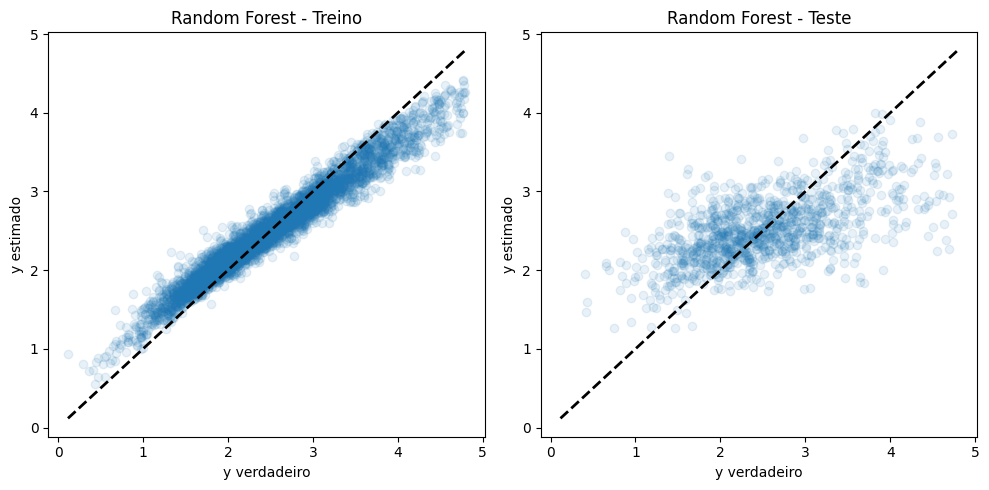

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

In [ ]:
# Funcionalidade imbutida no RF, baseada na redução média da impureza
importances = rf.feature_importances_
nomes = X_train_s_reduced.columns
pd.Series(importances, index=nomes).sort_values().plot.barh(figsize = (10,15))
plt.title("Random Forest Feature Importances")
plt.show()

ValueError: Length of values (11) does not match length of index (8)

In [ ]:
# Para vermos os parâmetros que deixamos livres (aplicamos a árvore sem especificá-los)
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': True, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [ ]:
# Vamos ver a profundidade alcançada pela árvore "livre" com preditores selecionados
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_s_reduced, y_train)

# Profundidade de cada árvore
depths = [estimator.tree_.max_depth for estimator in rf.estimators_]

print("Profundidade média:", np.mean(depths))
print("Profundidade máxima:", np.max(depths))
print("Profundidade mínima:", np.min(depths))

Profundidade média: 31.6
Profundidade máxima: 40
Profundidade mínima: 25


# Otimização Random Forest (com preditores todos parâmetros)

Para otimizar os hiperparâmetros foi utilizado o  RandomizedSearchCV e depois, utilizando como referência os hiperpâmetros achados pelo RandomizedSearchCV, foi utilizado o GridSearch. Essa estratégia foi adotada pois o primeiro faz uma busca mais ampla e o segundo foca na melhor região encontrada.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

param_dist = {
    'n_estimators': np.arange(50,500,50),        # número de árvores
    'max_depth': np.arange(5,40,5),              # profundidade máxima
    'min_samples_split': randint(2, 10),      # mínimo p/ dividir
    'min_samples_leaf': randint(1, 5),        # mínimo p/ folha
    'max_features': ['sqrt', 'log2', 0.8]     # fração de variáveis por split
}

random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,                # só 20 combinações aleatórias
    cv=3,                     # 3-fold CV
    scoring='r2',             # ou 'neg_mean_absolute_error', etc.
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train_s, y_train)
print("Melhores parâmetros:", random_search.best_params_)
print("Melhor score (CV):", random_search.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Melhores parâmetros: {'max_depth': np.int64(20), 'max_features': 0.8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': np.int64(100)}
Melhor score (CV): 0.39736569002920846


In [ ]:
# Random forest otimizado utilizado grid search
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Melhores parâmetros segundo RandomizedSearchCV;
# {'max_depth': 21, 'max_features': 0.8, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 363}
# vamos apenas ampliar o número de preditores para dar mais chances ao modelo

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5 , 8, 12, 15],
    'min_samples_split': [10, 30, 50],
    'min_samples_leaf': [5,10,20,30],
    'max_features': ['sqrt', 0.3, 0.5]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=3)
grid_search.fit(X_train_s_reduced, y_train)

print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

In [ ]:
# Aplica o modelo com hiperparâmetros otimizados ao conjunto otimizado de preditores (otimização para este conjunto de dados)
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split= 10, min_samples_leaf=10, random_state=42, oob_score=True)
rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split= 6, min_samples_leaf=2, random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.8698589215966673
MSE =  0.08232504492653314
RMSE = 0.2869234129981956
MAE =  0.2166929570031713
Desempenho no conjunto de teste
R^2 =  0.41265032825387793
MSE =  0.37240369007084695
RMSE = 0.6102488755178882
MAE =  0.46752444789837483
------------------------------------
OOB score: 0.43333476346618205


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.8695
R² Ajustado Teste : 0.4069


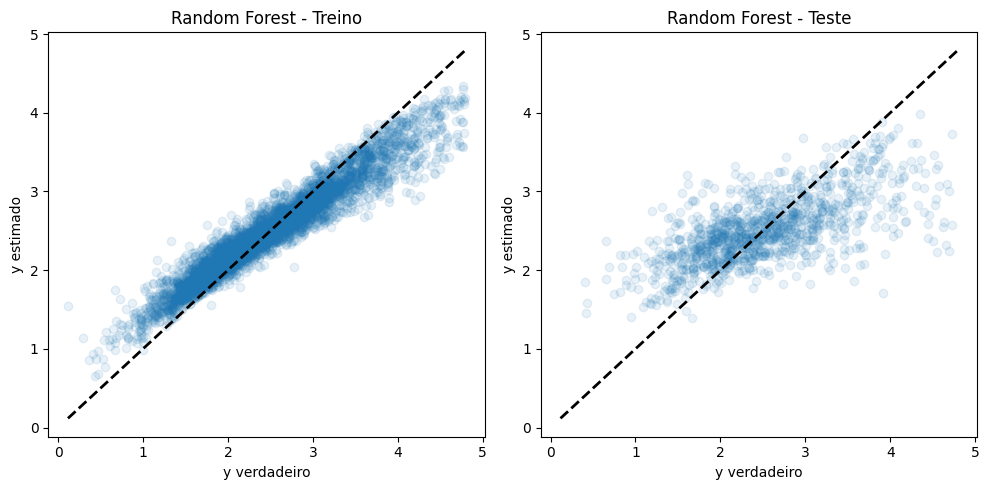

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

## Testes Random Forest

### Teste 1: aumento das folhas e redução da profundidade

In [ ]:
# Aplica o modelo com hiperparâmetros otimizados ao conjunto otimizado de preditores (otimização para este conjunto de dados)
from sklearn.ensemble import RandomForestRegressor
#rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split= 10, min_samples_leaf=10, random_state=42, oob_score=True)
rf = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split= 6, min_samples_leaf=5, random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.6560608955647493
MSE =  0.21833402084315032
RMSE = 0.4672622613085186
MAE =  0.3695433598420117
Desempenho no conjunto de teste
R^2 =  0.3919820853055521
MSE =  0.3882055788077616
RMSE = 0.6230614566860653
MAE =  0.4846292427095802
------------------------------------
OOB score: 0.37328275101913855


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.6550
R² Ajustado Teste : 0.3860


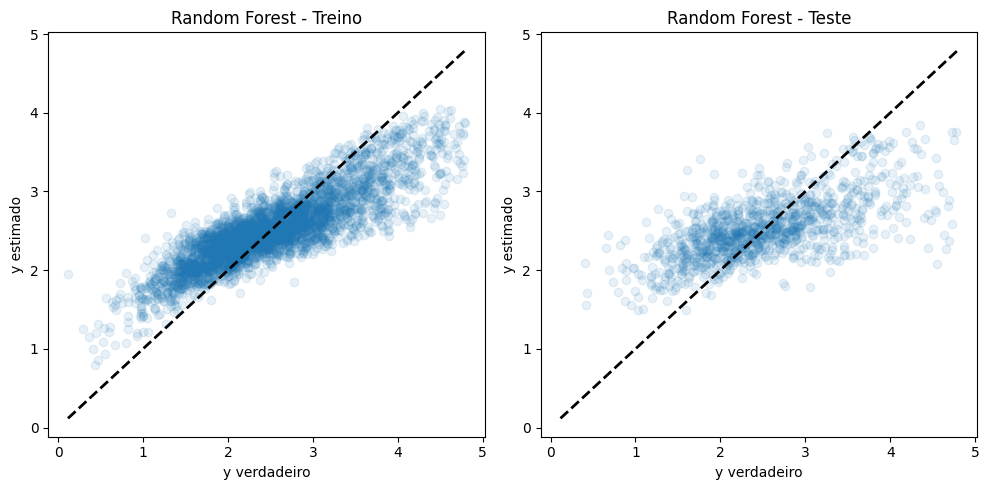

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

# Continuação do que estava sendo feito antes...


In [ ]:
# Aplica o modelo com hiperparâmetros otimizados ao conjunto otimizado de preditores (otimização do conjunto de dados mais completo)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=15, min_samples_split= 10, min_samples_leaf=10, random_state=42, oob_score=True)
#rf = RandomForestRegressor(n_estimators=100, max_depth=20, min_samples_split= 6, min_samples_leaf=2, random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.6414668300839761
MSE =  0.22680201887917617
RMSE = 0.47623735561080904
MAE =  0.37064558364948424
Desempenho no conjunto de teste
R^2 =  0.3668393801721187
MSE =  0.4014497029179695
RMSE = 0.6336005862670658
MAE =  0.4924517388244633
------------------------------------
OOB score: 0.39009985434431027


In [ ]:
# Aplica o modelo com hiperparâmetros otimizados ao conjunto otimizado de preditores
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, max_depth=10,max_features= 0.8, min_samples_split= 10, min_samples_leaf=4, random_state=42, oob_score=True)
rf.fit(X_train_s, y_train)
y_pred_train = rf.predict(X_train_s) # predição para o conjunto de treino
y_pred_test = rf.predict(X_test_s) # predição para o conjunto de teste

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print('Regressão Random Forest otimizado')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('RMSE =', np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('RMSE =', np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))
print("------------------------------------")
print('OOB score:', rf.oob_score_)

Regressão Random Forest otimizado
Desempenho no conjunto de treino
R^2 =  0.6244448455502207
MSE =  0.2375698383768535
RMSE = 0.48741136463653933
MAE =  0.3872230983950555
Desempenho no conjunto de teste
R^2 =  0.3565315833135997
MSE =  0.40798526728663814
RMSE = 0.6387372443240164
MAE =  0.4961384362957476
------------------------------------
OOB score: 0.3667378080559872


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.6235
R² Ajustado Teste : 0.3502


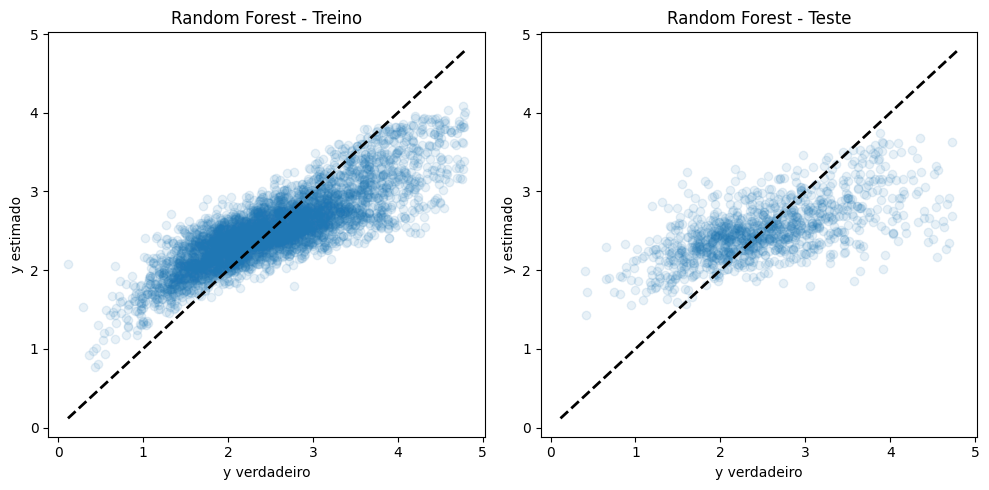

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Random Forest - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Random Forest - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()
plt.show()

In [ ]:
# Funcionalidade imbutida no RF, baseada na redução média da impureza
importances = rf.feature_importances_
nomes = X_train_s_reduced.columns # Use the columns from the reduced dataset
pd.Series(importances, index=nomes).sort_values().plot.barh(figsize = (10,15))
plt.title("Random Forest Feature Importances")
plt.show()

# Regressão: Gradient Boosting

Agora, de forma similar com o que fizemos para métodos de Random Forest, vamos tentar utilizar nossos dados já condicionados para treinar um modelo de Gradient Boosting.

Vamos começar criando uma regressão preliminar com parâmetros aleatórios do Gradient Boosting para ver quão bem nosso modelo está predizendo

In [ ]:
# Importar o modelo
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Criar o modelo de Gradient Boosting
gbr = GradientBoostingRegressor(random_state=42)

# Treinar o modelo
gbr.fit(X_train_s, y_train)

# Fazer previsões
y_pred_train = gbr.predict(X_train_s)
y_pred_test = gbr.predict(X_test_s)

# Avaliar desempenho
print('Regressão Gradient Boosting sem otimização')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão Gradient Boosting sem otimização
Desempenho no conjunto de treino
R^2 =  0.48012528630830975
MSE =  0.3288639504599414
MAE =  0.45946867775875627
Desempenho no conjunto de teste
R^2 =  0.3199521836010235
MSE =  0.43117810128115175
MAE =  0.5217651219079374


Temos um R^2 de treino de 0.33 o que mesmo sem nenhuma otimização de parâmetros já se mostra muito superior do que uma regressão linear múltipla

In [ ]:
# SHAP (SHapley Additive exPlanations)
# Valor absoluto SHAP: indica a importância de cada preditor
# Sinal do SHAP: indica se o preditor contribui para aumento ou diminuição da variável alvo
# Cor: indica como cada preditor influencia no valor da variável alvo
import shap
explainer = shap.TreeExplainer(gbr)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=nomes)

## Otimização dos parâmetros para o Gradient Boosting

Vamos otimizar os hiperparâmetros deste método de ensemble. Para isso, vamos começar fazendo uma randomized search em um grande espaço paramétrico

Essa nossa próxima célula é responsavel por descrever o espaço paramétrico, neste encontraremos uma combinação ótima inicial.

In [ ]:
# Definir o modelo base
gbr = GradientBoostingRegressor(random_state=42)

# Espaço de busca
param_dist = {
    'n_estimators': np.arange(100, 1000, 100),       # número de árvores
    'learning_rate': np.logspace(-2, 0, 10),         # de 0.01 a 1.0
    'max_depth': [2, 3, 4, 5, 6],                   # profundidade das árvores
    'min_samples_split': [2, 5, 10, 20],             # min de amostras p/ split
    'min_samples_leaf': [1, 2, 4, 8],                # min de amostras por folha
    'subsample': [0.6, 0.8, 1.0],                    # fração dos dados usada em cada árvore
    'max_features': ['auto', 'sqrt', None]            # nº de features por árvore
}

In [ ]:
# Randomized Search
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=30,                # número de combinações aleatórias testadas
    cv=4,                     # validação cruzada
    scoring='r2',
    n_jobs=-1,                # usa todos os núcleos do processador
    verbose=2,
    random_state=42
)

# Ajustar o modelo
random_search.fit(X_train_s, y_train)

# Melhor modelo
best_gbr = random_search.best_estimator_
print("Melhores hiperparâmetros:", random_search.best_params_)


Fitting 4 folds for each of 30 candidates, totalling 120 fits
Melhores hiperparâmetros: {'subsample': 0.8, 'n_estimators': np.int64(900), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': np.float64(0.016681005372000592)}


Vamos avaliar novamente como ficam nossas métricas para essa nova combinação de parâmetros

In [ ]:
y_pred_train  = best_gbr.predict(X_train_s)
y_pred_test   = best_gbr.predict(X_test_s)

print('Regressão Gradient Boosting otimizada')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))


Regressão Gradient Boosting otimizada
Desempenho no conjunto de treino
R^2 =  0.7755317227447056
MSE =  0.14199483542277444
MAE =  0.29814785898950397
Desempenho no conjunto de teste
R^2 =  0.40879545668081185
MSE =  0.37484783615216033
MAE =  0.4703429127740666


Temos agora um R^2 de 0.43 para o conjunto de teste o que é um pouco pior do que o do Random Forest, mas ainda melhor do que a regressão linear múltipla, além disso, temos que a mera otimização de parâmetros aumentou o R^2 em 0.1, o que é uma ótima melhoria

Essa é nossa combinação ótima inicial. Agora, a partir dela vamos fazer um grid search para procurar novos valores ótimos em uma malha de parâmetros próxima. Refinando ainda mais os parâmetros

In [ ]:
#{'subsample': 0.8, 'n_estimators': np.int64(900), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 5, 'learning_rate': np.float64(0.016681005372000592)}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [850,950],
    'learning_rate': [0.016681005372000592-0.01,0.016681005372000592+0.01],
    'max_depth': [4,6],
    'min_samples_split': [3,7],
    'min_samples_leaf': [1, 3],
    'subsample': [0.6, 0.8]
}

grid_search = GridSearchCV(
    estimator=random_search.best_estimator_,
    param_grid=param_grid,
    cv=4,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_s, y_train)

print("Melhores parâmetros após o refinamento:", grid_search.best_params_)


Fitting 4 folds for each of 64 candidates, totalling 256 fits
Melhores parâmetros após o refinamento: {'learning_rate': 0.02668100537200059, 'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 7, 'n_estimators': 950, 'subsample': 0.6}


Utilizando os melhores parâmetros encontrados no grid search vamos calcular mais uma vez as métricas para nosso modelo de Gradient Boosting.

In [ ]:
# Criar o modelo de Gradient Boosting
gbr_grid = GradientBoostingRegressor(learning_rate = 0.02668100537200059, max_depth= 6, min_samples_leaf= 3, min_samples_split= 7, n_estimators= 950, subsample = 0.6,random_state=42)

# Treinar o modelo
gbr_grid.fit(X_train_s, y_train)

y_pred_train = gbr_grid.predict(X_train_s)
y_pred_test = gbr_grid.predict(X_test_s)

print('Regressão Gradient Boosting otimizada')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão Gradient Boosting otimizada
Desempenho no conjunto de treino
R^2 =  0.9145639042986213
MSE =  0.054045429031756534
MAE =  0.18033895858086893
Desempenho no conjunto de teste
R^2 =  0.3866017906635769
MSE =  0.38891952720537465
MAE =  0.47664350738619965


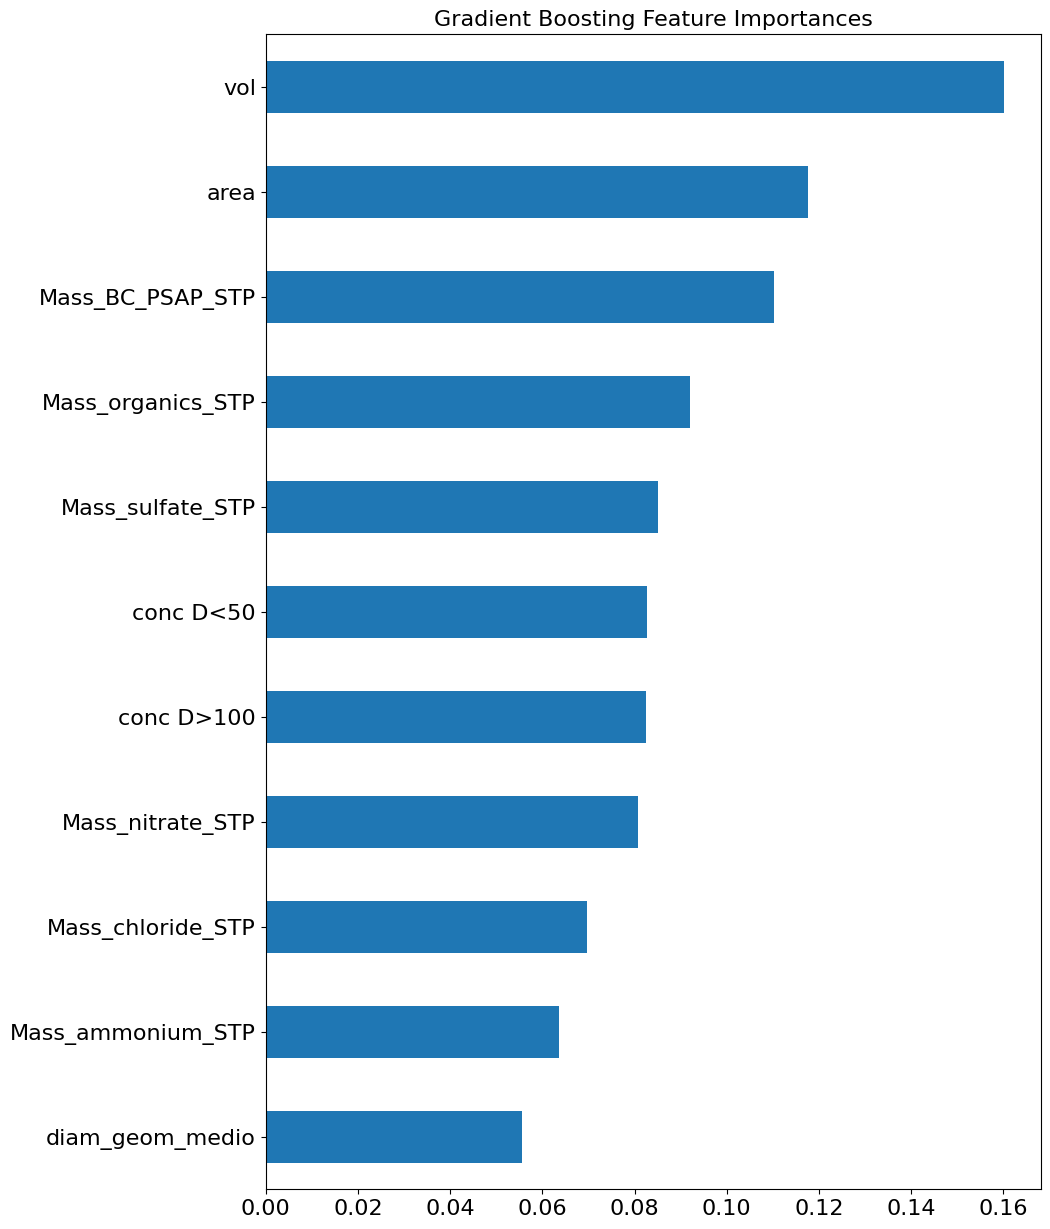

In [ ]:
importances = gbr_grid.feature_importances_
nomes = dados_finais.drop(columns=["Scattering_Eff", "soma_Qc"]).columns
pd.Series(importances, index=nomes).sort_values().plot.barh(figsize = (10,15), fontsize=16)
plt.title("Gradient Boosting Feature Importances", fontsize=16)
plt.show()

Conseguimos por fim um R^2 de 0.473 que é o maior encontrado dentro de todos nossos métodos de regressão.

In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.9448
R² Ajustado Teste : 0.4477


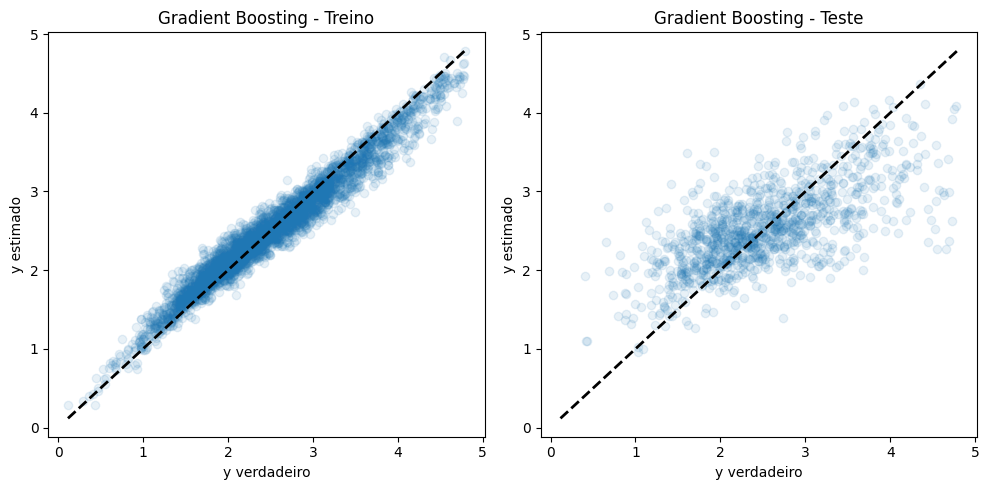

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Gradient Boosting - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Gradient Boosting - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()

#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/gradient_boosting_optimized.png', dpi=150)

plt.show()

## Teste Gradient Boosting para redução de overfitting

### Teste 1:
Número de estimadores: 500 (mais baixo)

learning_rate = 0.23 (mais baixo)

In [ ]:
# Criar o modelo de Gradient Boosting
gbr_grid = GradientBoostingRegressor(learning_rate = 0.02368100537200059, max_depth= 6, min_samples_leaf= 3, min_samples_split= 7, n_estimators= 500, subsample = 0.6)

# Treinar o modelo
gbr_grid.fit(X_train_s, y_train)

y_pred_train = gbr_grid.predict(X_train_s)
y_pred_test = gbr_grid.predict(X_test_s)

print('Regressão Gradient Boosting otimizada')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão Gradient Boosting otimizada
Desempenho no conjunto de treino
R^2 =  0.8388046712200385
MSE =  0.10232748710400917
MAE =  0.251210705385715
Desempenho no conjunto de teste
R^2 =  0.4382729072239666
MSE =  0.35864994420881086
MAE =  0.4584681956318117


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.8383
R² Ajustado Teste : 0.4328


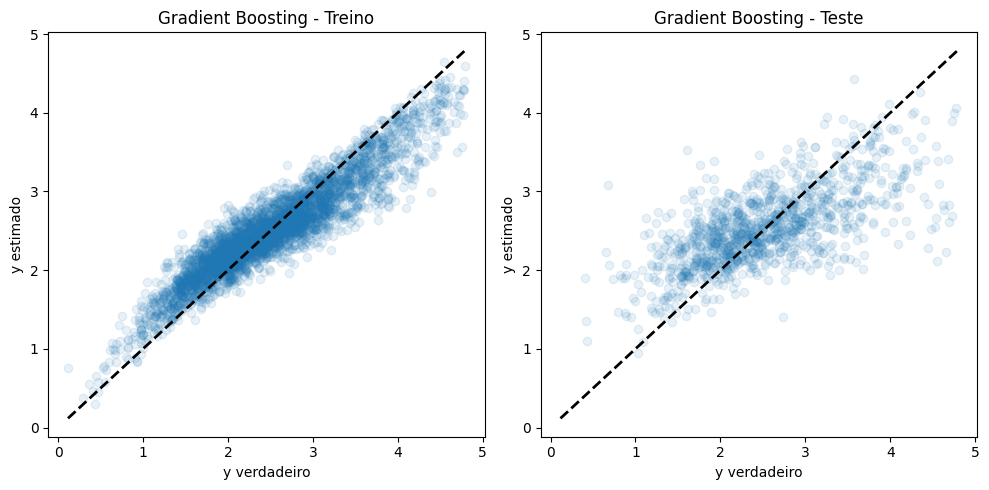

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Gradient Boosting - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Gradient Boosting - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()

#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/gradient_boosting_optimized.png', dpi=150)

plt.show()

### Teste 2:
Número de estimadores: 100 (mais baixo)

learning_rate = 0.23 (mais baixo)

In [ ]:
# Criar o modelo de Gradient Boosting
gbr_grid = GradientBoostingRegressor(learning_rate = 0.02368100537200059, max_depth= 6, min_samples_leaf= 3, min_samples_split= 7, n_estimators= 100, subsample = 0.6)

# Treinar o modelo
gbr_grid.fit(X_train_s, y_train)

y_pred_train = gbr_grid.predict(X_train_s)
y_pred_test = gbr_grid.predict(X_test_s)

print('Regressão Gradient Boosting otimizada')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão Gradient Boosting otimizada
Desempenho no conjunto de treino
R^2 =  0.5410697369292747
MSE =  0.291330902275172
MAE =  0.43637806338719926
Desempenho no conjunto de teste
R^2 =  0.3560810020741474
MSE =  0.4111276020884029
MAE =  0.5053081697945988


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.5397
R² Ajustado Teste : 0.3498


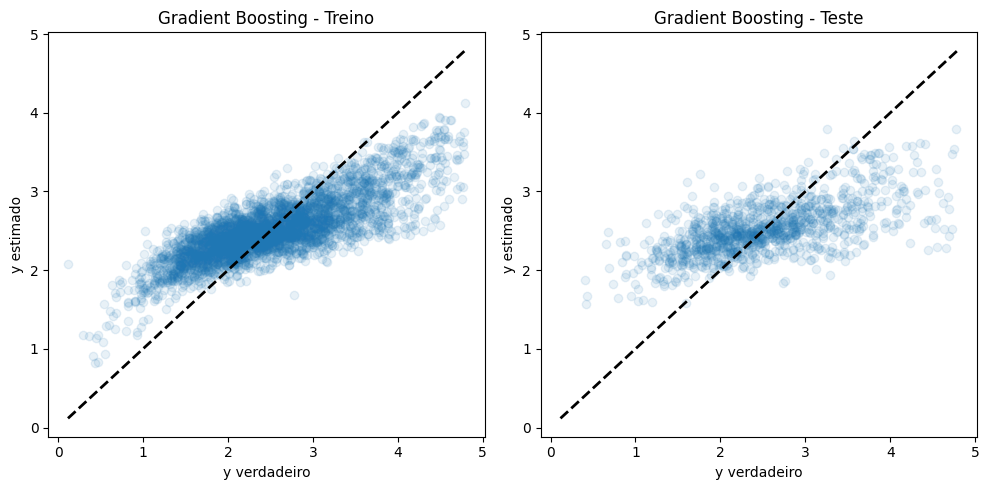

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Gradient Boosting - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Gradient Boosting - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()

#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/gradient_boosting_optimized.png', dpi=150)

plt.show()

### Teste 3:
Número de estimadores: 250 (mais baixo)

learning_rate = 0.23 (mais baixo)

In [ ]:
# Criar o modelo de Gradient Boosting
gbr_grid = GradientBoostingRegressor(learning_rate = 0.02368100537200059, max_depth= 6, min_samples_leaf= 3, min_samples_split= 7, n_estimators= 250, subsample = 0.6)

# Treinar o modelo
gbr_grid.fit(X_train_s, y_train)

y_pred_train = gbr_grid.predict(X_train_s)
y_pred_test = gbr_grid.predict(X_test_s)

print('Regressão Gradient Boosting otimizada')
print('Desempenho no conjunto de treino')
print('R^2 = ', r2_score(y_train, y_pred_train))
print('MSE = ', mean_squared_error(y_train, y_pred_train))
print('MAE = ', mean_absolute_error(y_train, y_pred_train))
print('Desempenho no conjunto de teste')
print('R^2 = ', r2_score(y_test, y_pred_test))
print('MSE = ', mean_squared_error(y_test, y_pred_test))
print('MAE = ', mean_absolute_error(y_test, y_pred_test))

Regressão Gradient Boosting otimizada
Desempenho no conjunto de treino
R^2 =  0.7148429516376723
MSE =  0.18101891915704668
MAE =  0.3392693788701887
Desempenho no conjunto de teste
R^2 =  0.4188101217139667
MSE =  0.37107648910414964
MAE =  0.47110171820747837


In [ ]:
# --- R² normal ---
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# --- R² ajustado ---
def r2_adjusted(r2, n, p):
    return 1 - (1 - r2) * (n - 1) / (n - p - 1)

# treino
n_train, p = X_train_s.shape
r2_adj_train = r2_adjusted(r2_train, n_train, p)

# teste
n_test, p = X_test_s.shape
r2_adj_test = r2_adjusted(r2_test, n_test, p)

# --- Resultados ---
print(f"R² Ajustado Treino: {r2_adj_train:.4f}")
print(f"R² Ajustado Teste : {r2_adj_test:.4f}")

R² Ajustado Treino: 0.7140
R² Ajustado Teste : 0.4131


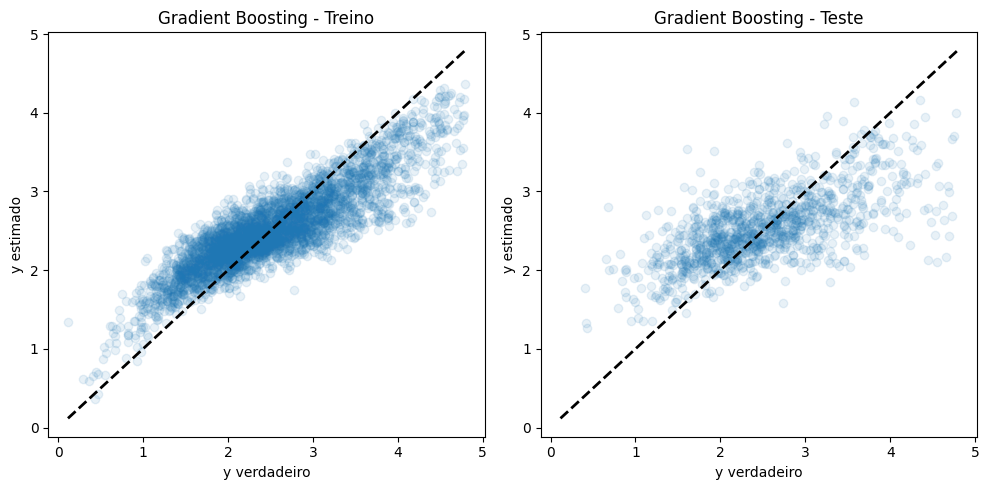

In [ ]:
# Desempenho nos conjuntos de treino e teste
from sklearn.metrics import PredictionErrorDisplay

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].scatter(y_train, y_pred_train, alpha=.1)
ax[0].set_xlabel('y verdadeiro')
ax[0].set_ylabel('y estimado')
ax[0].set_title('Gradient Boosting - Treino')
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

ax[1].scatter(y_test, y_pred_test, alpha=.1)
ax[1].set_xlabel('y verdadeiro')
ax[1].set_ylabel('y estimado')
ax[1].set_title('Gradient Boosting - Teste')
ax[1].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2) # 1:1 dashed line

plt.tight_layout()

#plt.savefig('/content/drive/MyDrive/Machine Learning/Projeto/gradient_boosting_optimized.png', dpi=150)

plt.show()

# Redes Neurais

In [ ]:
from sklearn.model_selection import train_test_split

# Separação de variáveis preditoras e alvo
X = dados_sem_outliers.drop(['Scattering_Eff'], axis=1) # Preditores
y = dados_sem_outliers['Scattering_Eff'] # Alvo


# Calculamos o shift para deixar os valores do alvo positivos
min_y = y.min()
eps = 1e-6  # pequeno deslocamento de segurança
shift = -min_y + eps  # garante todos positivos

# Aplicando a transformação log(alvo+1) após fazer shift
y_log = np.log1p(y + shift)

y_bins = pd.qcut(y_log, q=25, labels=False, duplicates='drop')

# divisão do dataset em treino, teste e validação.
# as variáveis abaixo determinam as frações
train_ratio = 0.65
validation_ratio = 0.15
test_ratio = 0.2
random_state = 42

# Primeiro split: separa treino do restante (validação + teste)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=1 - train_ratio, stratify = y_bins, random_state = random_state)

# Calculamos o shift para deixar os valores do alvo de `y_rem` positivos
min_y_rem = y_rem.min()
eps = 1e-6
shift_rem = -min_y_rem + eps
y_log_rem = np.log1p(y_rem + shift_rem)

# Cria os bins para `y_rem` para estratificação do segundo split
y_bins_rem = pd.qcut(y_log_rem, q=18, labels=False, duplicates='drop')

# Segundo split: divide o restante (`X_rem`, `y_rem`) em validação e teste
test_size_for_second_split = test_ratio / (test_ratio + validation_ratio)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=test_size_for_second_split, random_state = random_state, stratify = y_bins_rem)

In [ ]:
# Escalonando os preditores X
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

## teste 4 - segundo melhor

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B
from tensorflow.keras.optimizers import Adam

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(700, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(350, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(350, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(Adam(learning_rate=0.0005),
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 700)            │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 350)            │       245,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 350)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 350)            │       122,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 350)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           351 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 376,951 (1.44 MB)

 Trainable params: 376,951 (1.44 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 2.3619 - r_squared: -2.8620 - val_loss: 0.5613 - val_r_squared: 0.0737 - learning_rate: 5.0000e-04
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.6618 - r_squared: -0.0269 - val_loss: 0.5279 - val_r_squared: 0.1250 - learning_rate: 5.0000e-04
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5937 - r_squared: 0.0205 - val_loss: 0.5193 - val_r_squared: 0.1430 - learning_rate: 5.0000e-04
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5639 - r_squared: 0.0802 - val_loss: 0.4925 - val_r_squared: 0.1820 - learning_rate: 5.0000e-04
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5708 - r_squared: 0.1013 - val_loss: 0.4729 - val_r_squared: 0.2204 - learning_rate: 5.0000e-04
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.5581 - r_squared: 0.1356 - val_loss: 0.4637 - val_r_squared: 0.2424 - learning_rate: 5.0000e-04
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/ste

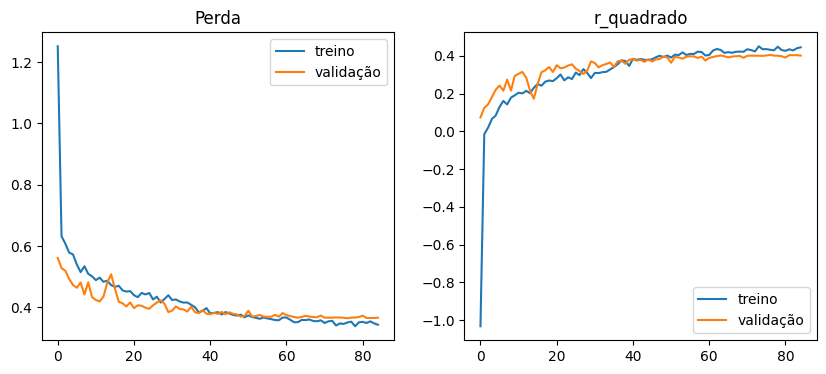

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


0.41900684580922953

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=200,
    verbose=1
)

Epoch 1/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3488 - r_squared: 0.4004 - val_loss: 0.3674 - val_r_squared: 0.3768
Epoch 2/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3368 - r_squared: 0.4361 - val_loss: 0.3667 - val_r_squared: 0.3783
Epoch 3/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3459 - r_squared: 0.4311 - val_loss: 0.3662 - val_r_squared: 0.3784
Epoch 4/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3578 - r_squared: 0.4086 - val_loss: 0.3667 - val_r_squared: 0.3777
Epoch 5/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.3547 - r_squared: 0.4211 - val_loss: 0.3667 - val_r_squared: 0.3778
Epoch 6/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3454 - r_squared: 0.4128 - val_loss: 0.3667 - val_r_squared: 0.3778
Epoch 7/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.3479 - r_squared: 0.4145 - val_loss: 0.3664 - val_r_squared: 0.3785
Epoch 8/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3376 - r_squ

KeyboardInterrupt: 

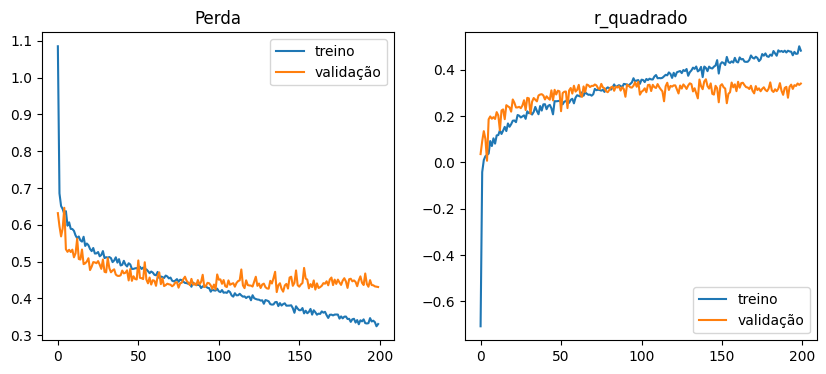

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


0.3837977774367064

## teste 3

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B
from tensorflow.keras.optimizers import Adam

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(250, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(250, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(Adam(learning_rate=0.0005),
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_82 (Dense)                │ (None, 500)            │         6,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_60 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 250)            │        62,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_61 (Dropout)            │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 194,251 (758.79 KB)

 Trainable params: 194,251 (758.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.7866 - r_squared: -3.1738 - val_loss: 0.6494 - val_r_squared: 0.0296 - learning_rate: 5.0000e-04
Epoch 2/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7105 - r_squared: -0.0716 - val_loss: 0.6170 - val_r_squared: 0.0758 - learning_rate: 5.0000e-04
Epoch 3/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.7241 - r_squared: -0.0557 - val_loss: 0.6569 - val_r_squared: 0.0200 - learning_rate: 5.0000e-04
Epoch 4/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6799 - r_squared: -0.0378 - val_loss: 0.5833 - val_r_squared: 0.1263 - learning_rate: 5.0000e-04
Epoch 5/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6636 - r_squared: 0.0039 - val_loss: 0.5844 - val_r_squared: 0.1272 - learning_rate: 5.0000e-04
Epoch 6/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.6518 - r_squared: 0.0397 - val_loss: 0.6366 - val_r_squared: 0.0512 - learning_rate: 5.0000e-04
Epoch 7/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - 

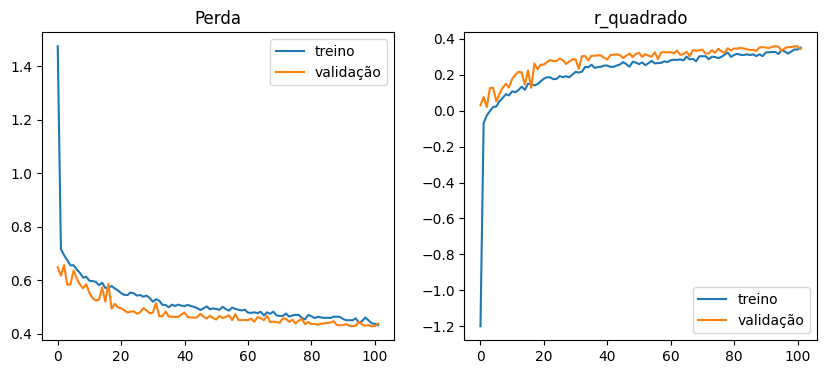

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.354814945869939

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs = 200,
    verbose=1
)

Epoch 1/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.0542 - r_squared: -2.1762 - val_loss: 0.6318 - val_r_squared: 0.0384
Epoch 2/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6901 - r_squared: -0.0859 - val_loss: 0.6280 - val_r_squared: 0.0429
Epoch 3/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6529 - r_squared: -0.0118 - val_loss: 0.5904 - val_r_squared: 0.0959
Epoch 4/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6706 - r_squared: -0.0365 - val_loss: 0.5698 - val_r_squared: 0.1319
Epoch 5/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6545 - r_squared: 0.0130 - val_loss: 0.5827 - val_r_squared: 0.1093
Epoch 6/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.6332 - r_squared: 0.0327 - val_loss: 0.5543 - val_r_squared: 0.1547
Epoch 7/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.6108 - r_squared: 0.0494 - val_loss: 0.5422 - val_r_squared: 0.1741
Epoch 8/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6082 - r_squar

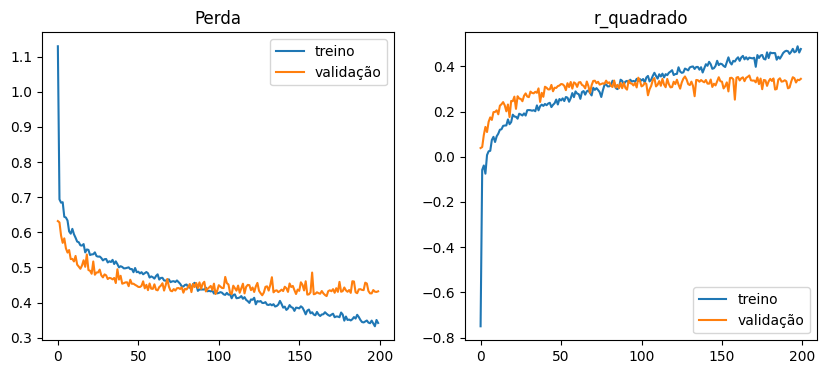

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.3818012857080022

## teste 2

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(200, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(150, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(100, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_78 (Dense)                │ (None, 200)            │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,751 (186.53 KB)

 Trainable params: 47,751 (186.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.1193 - r_squared: -3.8758 - val_loss: 0.6484 - val_r_squared: 0.0321 - learning_rate: 0.0010
Epoch 2/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8917 - r_squared: -0.3244 - val_loss: 0.6065 - val_r_squared: 0.0903 - learning_rate: 0.0010
Epoch 3/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7611 - r_squared: -0.1361 - val_loss: 0.6079 - val_r_squared: 0.0902 - learning_rate: 0.0010
Epoch 4/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7373 - r_squared: -0.0841 - val_loss: 0.5791 - val_r_squared: 0.1318 - learning_rate: 0.0010
Epoch 5/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7374 - r_squared: -0.1068 - val_loss: 0.5846 - val_r_squared: 0.1269 - learning_rate: 0.0010
Epoch 6/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7393 - r_squared: -0.0809 - val_loss: 0.5978 - val_r_squared: 0.1085 - learning_rate: 0.0010
Epoch 7/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6676 - r_square

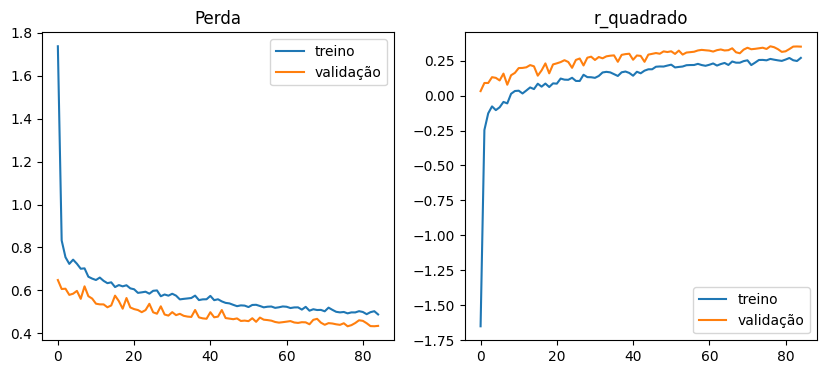

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.33602621040951164

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=200,
    verbose=1
)

Epoch 1/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 2.0973 - r_squared: -2.0074 - val_loss: 0.6196 - val_r_squared: 0.0579
Epoch 2/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7943 - r_squared: -0.1783 - val_loss: 0.7386 - val_r_squared: -0.1341
Epoch 3/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7522 - r_squared: -0.1487 - val_loss: 0.5914 - val_r_squared: 0.0977
Epoch 4/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7147 - r_squared: -0.1007 - val_loss: 0.5909 - val_r_squared: 0.0999
Epoch 5/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6826 - r_squared: -0.0586 - val_loss: 0.5675 - val_r_squared: 0.1343
Epoch 6/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6997 - r_squared: -0.0832 - val_loss: 0.5757 - val_r_squared: 0.1253
Epoch 7/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6665 - r_squared: -0.0306 - val_loss: 0.6187 - val_r_squared: 0.0536
Epoch 8/200
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6378 - r_squ

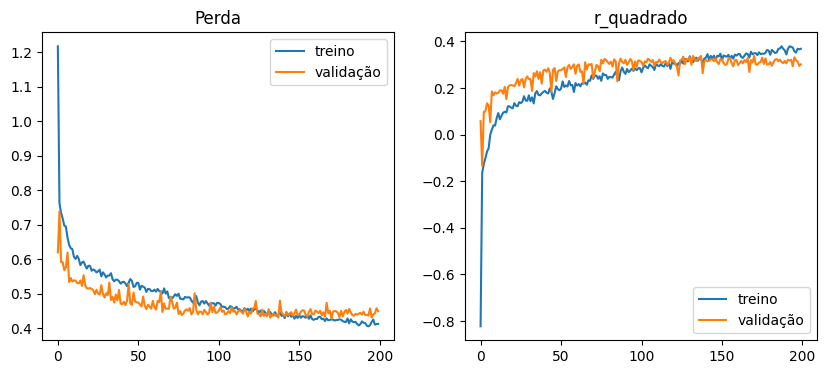

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.36220999055374314

## USAR ESSE!!! verificando melhor resultado até agora

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(150, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(75, activation='relu'),
    layers.Dropout(0.3),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 150)            │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,201 (51.57 KB)

 Trainable params: 13,201 (51.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=300,
    verbose=1
)

Epoch 1/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.3581 - r_squared: -2.8127 - val_loss: 0.5834 - val_r_squared: 0.0290
Epoch 2/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6867 - r_squared: -0.1787 - val_loss: 0.5366 - val_r_squared: 0.1004
Epoch 3/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6680 - r_squared: -0.1366 - val_loss: 0.5258 - val_r_squared: 0.1202
Epoch 4/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6226 - r_squared: -0.0747 - val_loss: 0.5113 - val_r_squared: 0.1427
Epoch 5/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6220 - r_squared: -0.0629 - val_loss: 0.4982 - val_r_squared: 0.1620
Epoch 6/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6162 - r_squared: -0.0260 - val_loss: 0.4935 - val_r_squared: 0.1722
Epoch 7/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6069 - r_squared: -0.0657 - val_loss: 0.5033 - val_r_squared: 0.1598
Epoch 8/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6494 - r_squa

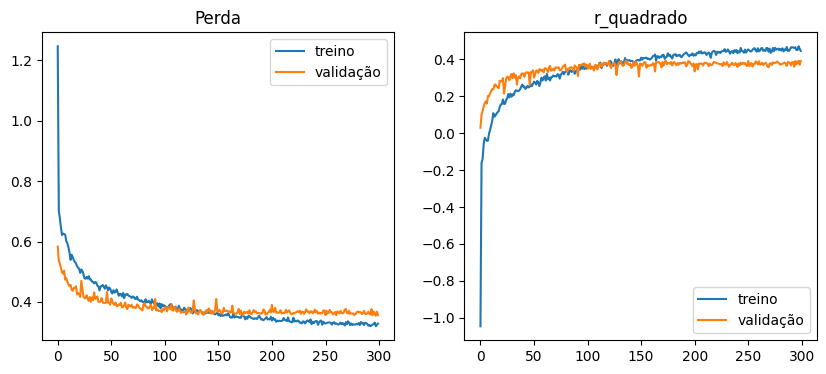

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


0.3724583664126334

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 3.8962 - r_squared: -5.0648 - val_loss: 0.6855 - val_r_squared: -0.0234 - learning_rate: 0.0010
Epoch 2/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8923 - r_squared: -0.3263 - val_loss: 0.6456 - val_r_squared: 0.0353 - learning_rate: 0.0010
Epoch 3/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7846 - r_squared: -0.2227 - val_loss: 0.6327 - val_r_squared: 0.0547 - learning_rate: 0.0010
Epoch 4/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7647 - r_squared: -0.1150 - val_loss: 0.6184 - val_r_squared: 0.0751 - learning_rate: 0.0010
Epoch 5/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7375 - r_squared: -0.1049 - val_loss: 0.6109 - val_r_squared: 0.0848 - learning_rate: 0.0010
Epoch 6/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6956 - r_squared: -0.0693 - val_loss: 0.6029 - val_r_squared: 0.0986 - learning_rate: 0.0010
Epoch 7/500
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7656 - r_squar

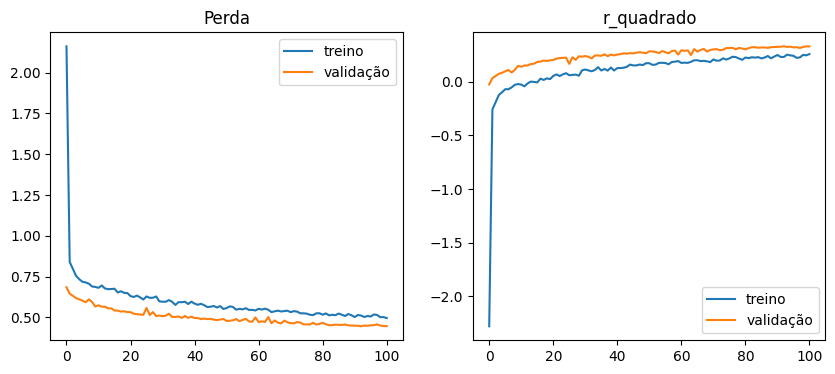

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.3212602002550017

## melhor resultado até agora

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(150, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(75, activation='relu'),
    layers.Dropout(0.3),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 150)            │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,201 (51.57 KB)

 Trainable params: 13,201 (51.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=200,
    verbose=1
)

Epoch 1/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 2.4528 - r_squared: -3.0661 - val_loss: 0.5531 - val_r_squared: 0.0761
Epoch 2/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7223 - r_squared: -0.1694 - val_loss: 0.5297 - val_r_squared: 0.1115
Epoch 3/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6615 - r_squared: -0.1106 - val_loss: 0.5266 - val_r_squared: 0.1191
Epoch 4/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6440 - r_squared: -0.0771 - val_loss: 0.5155 - val_r_squared: 0.1368
Epoch 5/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6556 - r_squared: -0.0858 - val_loss: 0.5036 - val_r_squared: 0.1491
Epoch 6/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6305 - r_squared: -0.0386 - val_loss: 0.4936 - val_r_squared: 0.1677
Epoch 7/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6448 - r_squared: -0.0797 - val_loss: 0.4968 - val_r_squared: 0.1645
Epoch 8/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6062 - r_squa

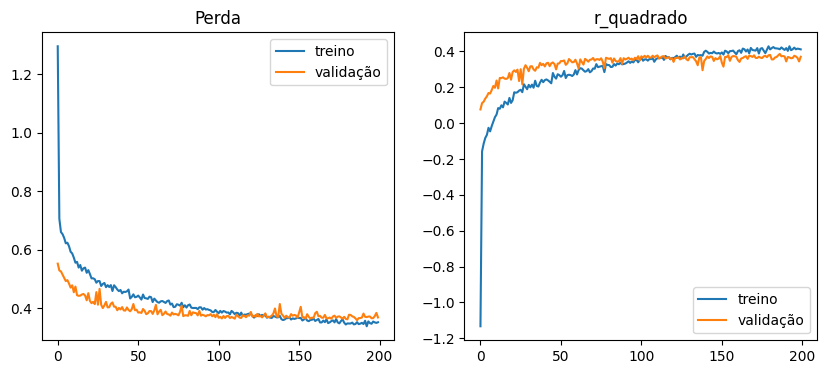

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.42403509919369053

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3305 - r_squared: 0.4662 - val_loss: 0.3629 - val_r_squared: 0.4027 - learning_rate: 0.0010
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3475 - r_squared: 0.4494 - val_loss: 0.3686 - val_r_squared: 0.3950 - learning_rate: 0.0010
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3353 - r_squared: 0.4694 - val_loss: 0.3682 - val_r_squared: 0.3956 - learning_rate: 0.0010
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3493 - r_squared: 0.4429 - val_loss: 0.3656 - val_r_squared: 0.3965 - learning_rate: 0.0010
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3512 - r_squared: 0.4162 - val_loss: 0.3653 - val_r_squared: 0.4003 - learning_rate: 0.0010
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3353 - r_squared: 0.4483 - val_loss: 0.3622 - val_r_squared: 0.4016 - learning_rate: 0.0010
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3379 - r_squared: 0.4

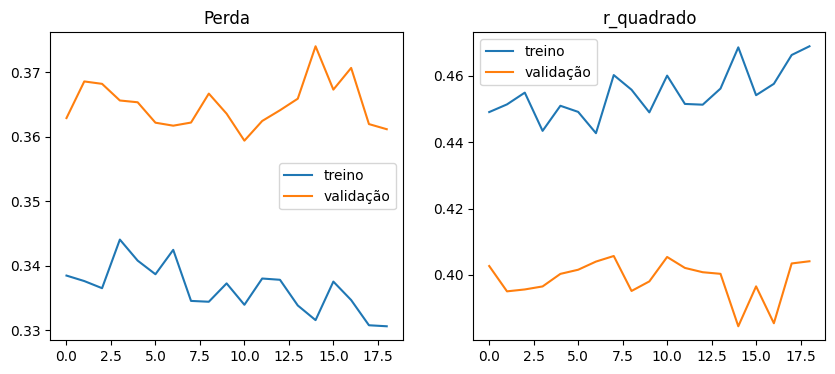

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.443283119715721

## melhor resultado até agora  - usando MAE

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(150, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(75, activation='relu'),
    layers.Dropout(0.3),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mae',
              metrics=[r_squared])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 150)            │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 150)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 75)             │        11,325 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 75)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            76 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,201 (51.57 KB)

 Trainable params: 13,201 (51.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=300,
    verbose=1
)

Epoch 1/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.2459 - r_squared: -3.2806 - val_loss: 0.5998 - val_r_squared: 0.0401
Epoch 2/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6667 - r_squared: -0.1492 - val_loss: 0.5940 - val_r_squared: 0.0491
Epoch 3/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6570 - r_squared: -0.1018 - val_loss: 0.5924 - val_r_squared: 0.0459
Epoch 4/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6488 - r_squared: -0.0668 - val_loss: 0.5747 - val_r_squared: 0.1190
Epoch 5/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6403 - r_squared: -0.0309 - val_loss: 0.5744 - val_r_squared: 0.1568
Epoch 6/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6494 - r_squared: -0.0556 - val_loss: 0.5634 - val_r_squared: 0.1580
Epoch 7/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6271 - r_squared: -0.0216 - val_loss: 0.5596 - val_r_squared: 0.1577
Epoch 8/300
115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6272 - r_squa

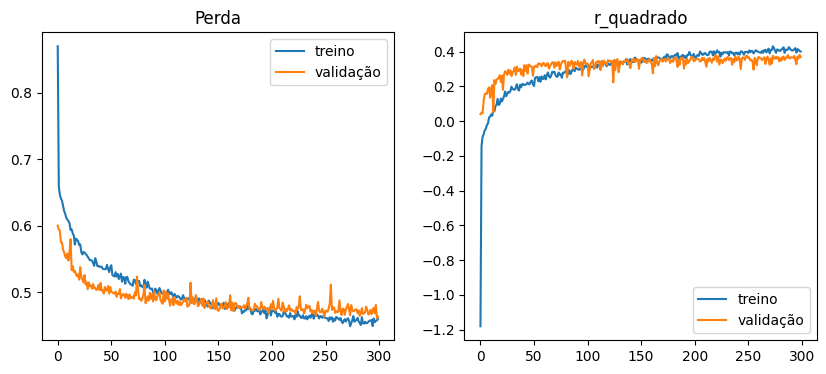

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.4285008739001174

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4500 - r_squared: 0.4491 - val_loss: 0.4670 - val_r_squared: 0.3885 - learning_rate: 0.0010
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4414 - r_squared: 0.4503 - val_loss: 0.4663 - val_r_squared: 0.3827 - learning_rate: 0.0010
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4412 - r_squared: 0.4431 - val_loss: 0.4644 - val_r_squared: 0.3895 - learning_rate: 0.0010
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4405 - r_squared: 0.4487 - val_loss: 0.4653 - val_r_squared: 0.3994 - learning_rate: 0.0010
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4411 - r_squared: 0.4455 - val_loss: 0.4644 - val_r_squared: 0.3874 - learning_rate: 0.0010
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4562 - r_squared: 0.4269 - val_loss: 0.4651 - val_r_squared: 0.3912 - learning_rate: 0.0010
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4432 - r_squared: 0.4

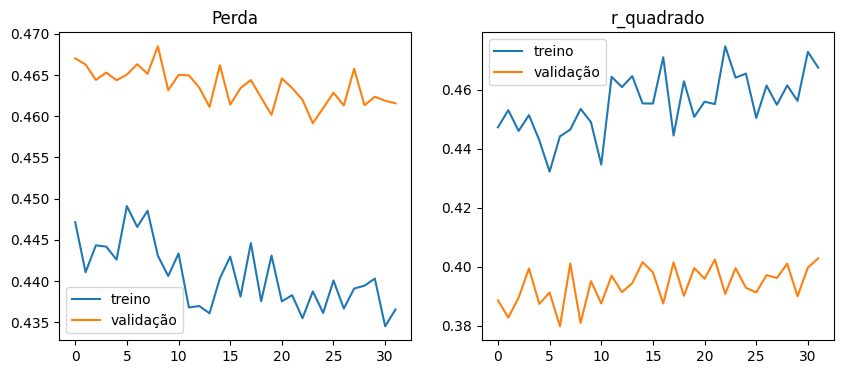

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.44450147041615506

## Novos testes


### Teste 1 (rede mais burrinha)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(100, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(70, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(50, activation='relu'),
    layers.Dropout(0.3),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 100)            │         1,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 70)             │         7,070 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 70)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,871 (46.37 KB)

 Trainable params: 11,871 (46.37 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=200,
    verbose=1
)

Epoch 1/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 2.4967 - r_squared: -3.1577 - val_loss: 0.5696 - val_r_squared: 0.0500
Epoch 2/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8023 - r_squared: -0.3762 - val_loss: 0.5777 - val_r_squared: 0.0378
Epoch 3/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7743 - r_squared: -0.3174 - val_loss: 0.5239 - val_r_squared: 0.1198
Epoch 4/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.7545 - r_squared: -0.2503 - val_loss: 0.5428 - val_r_squared: 0.0954
Epoch 5/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7033 - r_squared: -0.1611 - val_loss: 0.5293 - val_r_squared: 0.1182
Epoch 6/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.7209 - r_squared: -0.1605 - val_loss: 0.4858 - val_r_squared: 0.1820
Epoch 7/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6755 - r_squared: -0.1165 - val_loss: 0.4906 - val_r_squared: 0.1801
Epoch 8/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.6671 - r_s

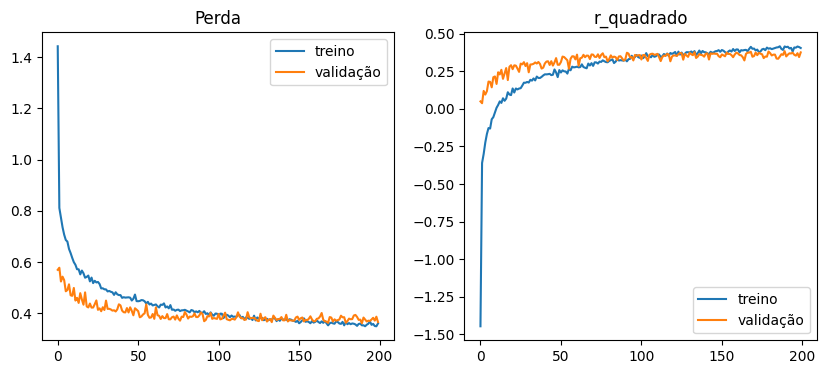

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.42639955820254294

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3438 - r_squared: 0.4221 - val_loss: 0.3640 - val_r_squared: 0.4065 - learning_rate: 0.0010
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3436 - r_squared: 0.4312 - val_loss: 0.3731 - val_r_squared: 0.3864 - learning_rate: 0.0010
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3312 - r_squared: 0.4506 - val_loss: 0.3690 - val_r_squared: 0.3943 - learning_rate: 0.0010
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3492 - r_squared: 0.4274 - val_loss: 0.3704 - val_r_squared: 0.3904 - learning_rate: 0.0010
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3411 - r_squared: 0.4429 - val_loss: 0.3705 - val_r_squared: 0.3906 - learning_rate: 0.0010
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3372 - r_squared: 0.4319 - val_loss: 0.3738 - val_r_squared: 0.3899 - learning_rate: 0.0010
Epoch 7/500
44/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3480 - r_squared: 0.4

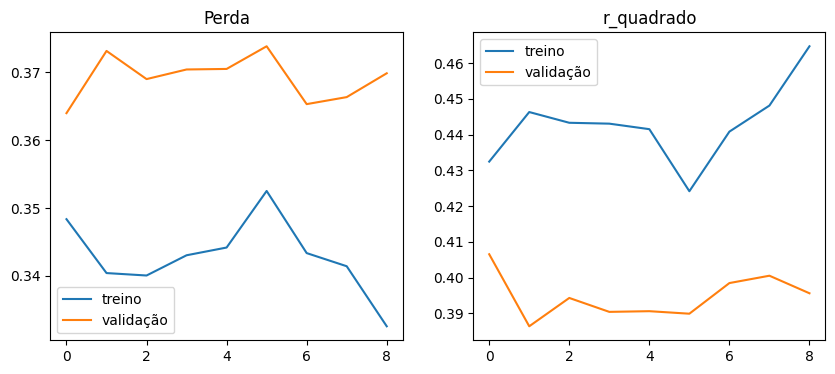

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


0.44351860483912753

### Teste 2 (n_neuronios ~ dimensão do treino)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(3000, activation='relu'),
    layers.Dropout(0.3),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 3000)           │        36,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 3000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │         3,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 39,001 (152.35 KB)

 Trainable params: 39,001 (152.35 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=200,
    verbose=1
)

Epoch 1/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 1.6865 - r_squared: -1.5652 - val_loss: 0.5410 - val_r_squared: 0.0924
Epoch 2/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.5490 - r_squared: 0.0520 - val_loss: 0.5366 - val_r_squared: 0.1024
Epoch 3/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.5524 - r_squared: 0.0791 - val_loss: 0.5182 - val_r_squared: 0.1316
Epoch 4/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5354 - r_squared: 0.1116 - val_loss: 0.5202 - val_r_squared: 0.1300
Epoch 5/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.5350 - r_squared: 0.1144 - val_loss: 0.5097 - val_r_squared: 0.1344
Epoch 6/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.5129 - r_squared: 0.1568 - val_loss: 0.4925 - val_r_squared: 0.1733
Epoch 7/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.4953 - r_squared: 0.1782 - val_loss: 0.4925 - val_r_squared: 0.1762
Epoch 8/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5048 - r_squa

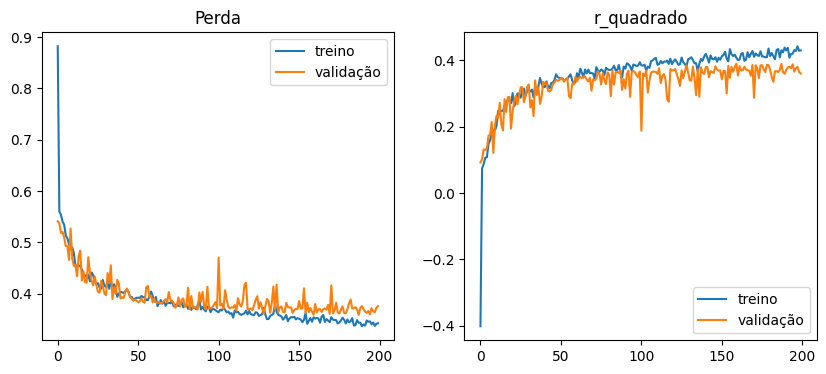

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.40054452040612354

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3096 - r_squared: 0.4909 - val_loss: 0.3621 - val_r_squared: 0.4122 - learning_rate: 0.0010
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3415 - r_squared: 0.4509 - val_loss: 0.3622 - val_r_squared: 0.4140 - learning_rate: 0.0010
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3457 - r_squared: 0.4628 - val_loss: 0.3797 - val_r_squared: 0.3819 - learning_rate: 0.0010
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.3299 - r_squared: 0.4654 - val_loss: 0.3610 - val_r_squared: 0.4120 - learning_rate: 0.0010
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3293 - r_squared: 0.4707 - val_loss: 0.3669 - val_r_squared: 0.4003 - learning_rate: 0.0010
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3290 - r_squared: 0.4382 - val_loss: 0.3616 - val_r_squared: 0.4099 - learning_rate: 0.0010
Epoch 7/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3151 - r_squared: 0.4

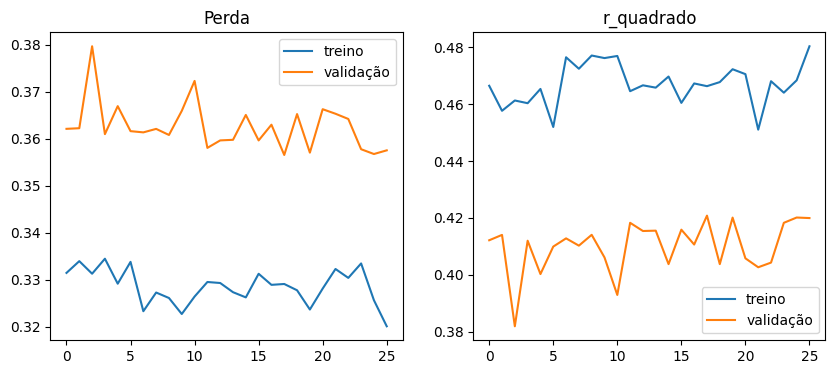

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.4141539487047625

### Teste 3 (maior r2 para pred mas com overfitting)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(700, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.3),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 700)            │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,301 (1.75 MB)

 Trainable params: 459,301 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=200,
    verbose=1
)

Epoch 1/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 1.5074 - r_squared: -1.4862 - val_loss: 0.5218 - val_r_squared: 0.1215
Epoch 2/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.6439 - r_squared: -0.0653 - val_loss: 0.4934 - val_r_squared: 0.1695
Epoch 3/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.5802 - r_squared: -0.0098 - val_loss: 0.4927 - val_r_squared: 0.1758
Epoch 4/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.5910 - r_squared: 0.0371 - val_loss: 0.4714 - val_r_squared: 0.2019
Epoch 5/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5415 - r_squared: 0.0546 - val_loss: 0.5239 - val_r_squared: 0.1033
Epoch 6/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5426 - r_squared: 0.1013 - val_loss: 0.4842 - val_r_squared: 0.1891
Epoch 7/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.5386 - r_squared: 0.0942 - val_loss: 0.7880 - val_r_squared: -0.3236
Epoch 8/200
115/115 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.5572 - r

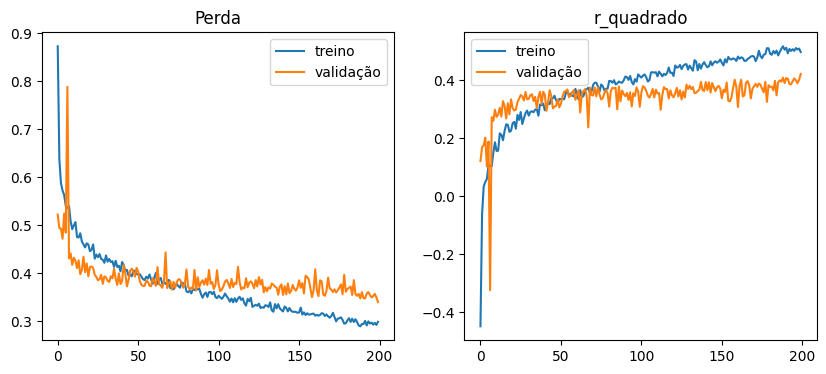

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


0.4529679594328294

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
# aqui são usadas duas estratégias de saída

early_stop = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True, monitor="val_loss")
reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=6, verbose=1, monitor="val_loss")

history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=500,
    batch_size=64,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.2682 - r_squared: 0.5506 - val_loss: 0.3430 - val_r_squared: 0.4412 - learning_rate: 0.0010
Epoch 2/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.2856 - r_squared: 0.5486 - val_loss: 0.3522 - val_r_squared: 0.4214 - learning_rate: 0.0010
Epoch 3/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.2642 - r_squared: 0.5536 - val_loss: 0.3474 - val_r_squared: 0.4266 - learning_rate: 0.0010
Epoch 4/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.2665 - r_squared: 0.5751 - val_loss: 0.3506 - val_r_squared: 0.4278 - learning_rate: 0.0010
Epoch 5/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2849 - r_squared: 0.5384 - val_loss: 0.3531 - val_r_squared: 0.4232 - learning_rate: 0.0010
Epoch 6/500
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.2561 - r_squared: 0.5614 - val_loss: 0.3503 - val_r_squared: 0.4276 - learning_rate: 0.0010
Epoch 7/500
55/58 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2644 - r_squar

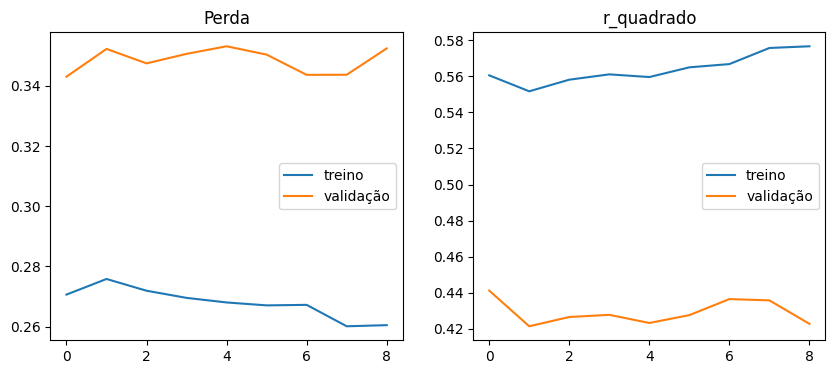

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


0.46704496670934936

### Teste 4 (Teste 3 com mais épocas)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(700, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.3),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 700)            │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,301 (1.75 MB)

 Trainable params: 459,301 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=220,
    verbose=1
)

Epoch 1/220
115/115 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 1.6530 - r_squared: -1.8062 - val_loss: 0.5255 - val_r_squared: 0.1149
Epoch 2/220
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.6350 - r_squared: -0.0372 - val_loss: 0.5186 - val_r_squared: 0.1349
Epoch 3/220
115/115 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.6232 - r_squared: -0.0327 - val_loss: 0.4817 - val_r_squared: 0.1857
Epoch 4/220
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.5581 - r_squared: 0.0670 - val_loss: 0.5074 - val_r_squared: 0.1547
Epoch 5/220
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5988 - r_squared: 0.0364 - val_loss: 0.4496 - val_r_squared: 0.2465
Epoch 6/220
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.5735 - r_squared: 0.0588 - val_loss: 0.4391 - val_r_squared: 0.2606
Epoch 7/220
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.5426 - r_squared: 0.1104 - val_loss: 0.4838 - val_r_squared: 0.1762
Epoch 8/220
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - loss: 0.5497 - r_

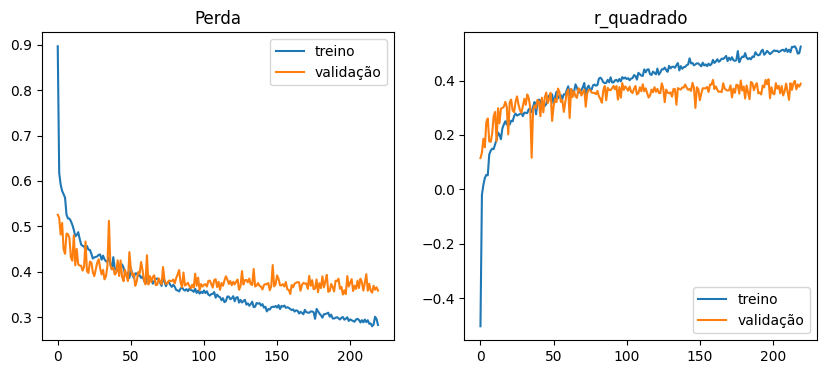

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


0.45819487874845743

### Teste 5 (Teste 3 com menos épocas)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(700, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.3),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 700)            │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,301 (1.75 MB)

 Trainable params: 459,301 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=100,
    verbose=1
)

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - loss: 1.5638 - r_squared: -1.5233 - val_loss: 0.5380 - val_r_squared: 0.0897
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.6220 - r_squared: 9.6682e-04 - val_loss: 0.5281 - val_r_squared: 0.1195
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.5882 - r_squared: -0.0106 - val_loss: 0.5285 - val_r_squared: 0.1175
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.5830 - r_squared: 0.0413 - val_loss: 0.5106 - val_r_squared: 0.1485
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.5493 - r_squared: 0.1190 - val_loss: 0.5211 - val_r_squared: 0.1298
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5554 - r_squared: 0.1112 - val_loss: 0.4355 - val_r_squared: 0.2659
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.5505 - r_squared: 0.1023 - val_loss: 0.5150 - val_r_squared: 0.1397
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.4973 -

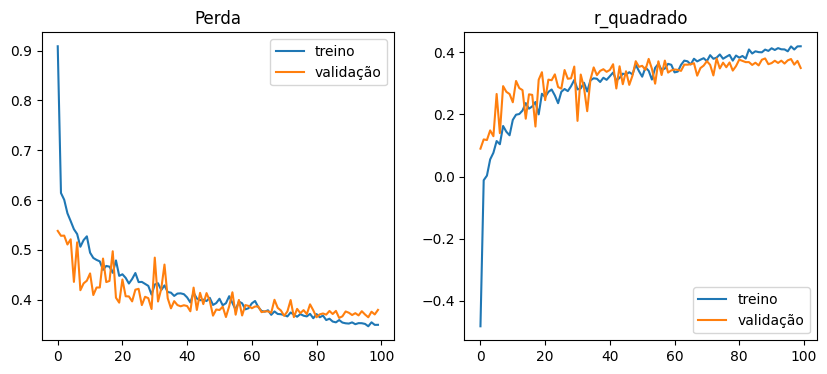

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


0.4328406530163267

### Teste 6 (Teste 5 com menos drop)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(700, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.25),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_34 (Dense)                │ (None, 700)            │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,301 (1.75 MB)

 Trainable params: 459,301 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=100,
    verbose=1
)

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 1.4326 - r_squared: -1.4508 - val_loss: 0.5996 - val_r_squared: 0.0018
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.6521 - r_squared: -0.0617 - val_loss: 0.5370 - val_r_squared: 0.1016
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.6243 - r_squared: -0.0430 - val_loss: 0.4744 - val_r_squared: 0.1980
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5607 - r_squared: 0.0662 - val_loss: 0.4558 - val_r_squared: 0.2301
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.5189 - r_squared: 0.1634 - val_loss: 0.4634 - val_r_squared: 0.2218
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.5329 - r_squared: 0.0915 - val_loss: 0.4637 - val_r_squared: 0.2213
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.5079 - r_squared: 0.1429 - val_loss: 0.4195 - val_r_squared: 0.2924
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.4872 - r_

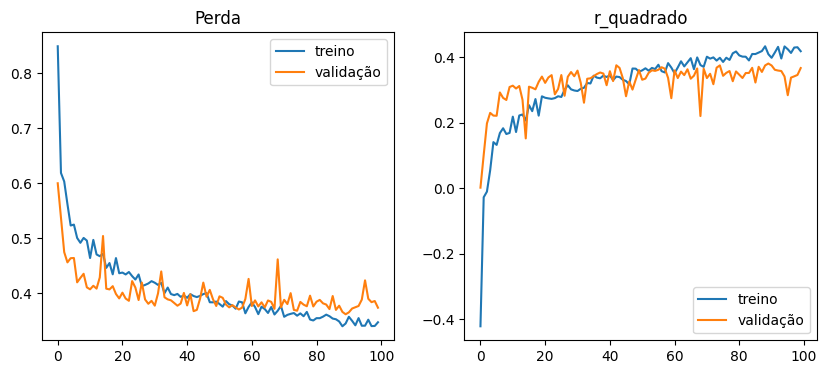

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.42898994799384405

### Teste 7 (Teste 5 com mais drop)


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as B

def r_squared(y_t, y_p):
    SS_res = B.sum(B.square(y_t - y_p))
    SS_tot = B.sum(B.square(y_t - B.mean(y_t)))
    # Adiciona B.epsilon() para evitar divisão por zero
    return (1 - SS_res/(SS_tot + B.epsilon()))

# Construção do modelo no Keras
model = keras.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(700, activation='relu'),
    layers.Dropout(0.35),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.35),
    layers.Dense(200, activation='relu'),
    layers.Dropout(0.35),
    #layers.Dense(700, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=[r_squared])

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 700)            │         8,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 700)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 500)            │       350,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_28 (Dropout)            │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 200)            │       100,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_29 (Dropout)            │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 459,301 (1.75 MB)

 Trainable params: 459,301 (1.75 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# treinamento da rede
# verbose = 0, 1 ou 2 indica a quantidade de print
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=100,
    verbose=1
)

Epoch 1/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 1.4595 - r_squared: -1.3677 - val_loss: 0.6134 - val_r_squared: -0.0224
Epoch 2/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.6846 - r_squared: -0.1202 - val_loss: 0.5299 - val_r_squared: 0.0977
Epoch 3/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.6392 - r_squared: -0.0359 - val_loss: 0.4867 - val_r_squared: 0.1806
Epoch 4/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.6123 - r_squared: 0.0235 - val_loss: 0.4637 - val_r_squared: 0.2228
Epoch 5/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.5759 - r_squared: 0.0362 - val_loss: 0.4559 - val_r_squared: 0.2344
Epoch 6/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.5498 - r_squared: 0.0748 - val_loss: 0.4400 - val_r_squared: 0.2616
Epoch 7/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.5547 - r_squared: 0.0783 - val_loss: 0.4467 - val_r_squared: 0.2441
Epoch 8/100
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.5258 - 

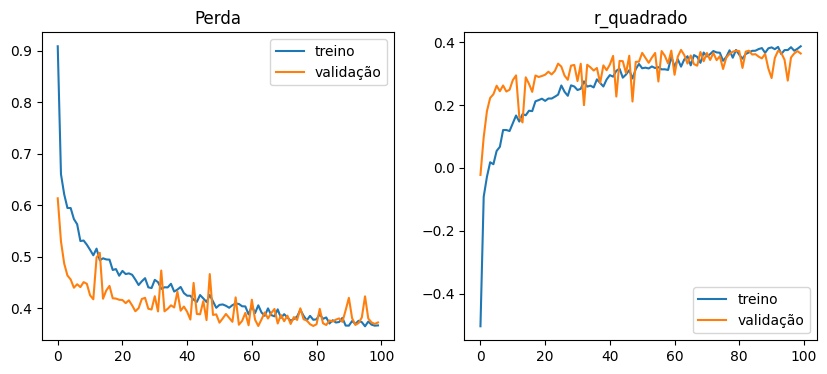

In [ ]:
# faz figura da perda e do r^2 para cada época

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='treino')
plt.plot(history.history['val_loss'], label='validação')
plt.title('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['r_squared'], label='treino')
plt.plot(history.history['val_r_squared'], label='validação')
plt.title('r_quadrado')
plt.legend()
plt.show()

In [ ]:
y_pred_test = model.predict(X_test_s) # predição para o conjunto de teste
y_pred_test = y_pred_test.reshape(1,len(y_pred_test))
r2_score(y_test, y_pred_test[0,:])

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


0.42801645755297624